In [3]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("E:/AI_NutriCare/Data/Raw/admissions.csv")
df

subject_id   hadm_id            admittime            dischtime  \
0      10004235  24181354  2196-02-24 14:38:00  2196-03-04 14:02:00   
1      10009628  25926192  2153-09-17 17:08:00  2153-09-25 13:20:00   
2      10018081  23983182  2134-08-18 02:02:00  2134-08-23 19:35:00   
3      10006053  22942076  2111-11-13 23:39:00  2111-11-15 17:20:00   
4      10031404  21606243  2113-08-04 18:46:00  2113-08-06 20:57:00   
..          ...       ...                  ...                  ...   
270    10038992  24745425  2187-07-29 01:05:00  2187-08-03 17:02:00   
271    10008287  22168393  2145-09-28 01:17:00  2145-10-02 13:35:00   
272    10022880  27708593  2177-03-12 07:15:00  2177-03-19 14:25:00   
273    10004457  23251352  2141-12-17 11:00:00  2141-12-21 15:56:00   
274    10004457  28108313  2147-12-19 00:00:00  2147-12-21 16:10:00   

               deathtime               admission_type admit_provider_id  \
0                    NaN                       URGENT            P03YMR   
1                    NaN                       URGENT            P41R5N   
2                    NaN                       URGENT            P233F6   
3    2111-11-15 17:20:00                       URGENT            P38TI6   
4                    NaN                       URGENT            P07HDB   
..                   ...                          ...               ...   
270                  NaN  SURGICAL SAME DAY ADMISSION            P41R5N   
271                  NaN  SURGICAL SAME DAY ADMISSION            P898NM   
272                  NaN  SURGICAL SAME DAY ADMISSION            P99698   
273                  NaN  SURGICAL SAME DAY ADMISSION            P41R5N   
274                  NaN  SURGICAL SAME DAY ADMISSION            P10WWR   

         admission_location        discharge_location insurance language  \
0    TRANSFER FROM HOSPITAL  SKILLED NURSING FACILITY  Medicaid  ENGLISH   
1    TRANSFER FROM HOSPITAL          HOME HEALTH CARE  Medicaid        ?   
2    TRANSFER FROM HOSPITAL  SKILLED NURSING FACILITY  Medicare  ENGLISH   
3    TRANSFER FROM HOSPITAL                      DIED  Medicaid  ENGLISH   
4    TRANSFER FROM HOSPITAL                      HOME     Other  ENGLISH   
..                      ...                       ...       ...      ...   
270      PHYSICIAN REFERRAL  SKILLED NURSING FACILITY  Medicare  ENGLISH   
271      PHYSICIAN REFERRAL          HOME HEALTH CARE     Other  ENGLISH   
272      PHYSICIAN REFERRAL                      HOME  Medicare  ENGLISH   
273      PHYSICIAN REFERRAL                     REHAB  Medicare  ENGLISH   
274      PHYSICIAN REFERRAL  SKILLED NURSING FACILITY  Medicare  ENGLISH   

    marital_status                            race            edregtime  \
0           SINGLE              BLACK/CAPE VERDEAN  2196-02-24 12:15:00   
1          MARRIED  HISPANIC/LATINO - PUERTO RICAN                  NaN   
2          MARRIED                           WHITE  2134-08-17 16:24:00   
3              NaN                         UNKNOWN                  NaN   
4          WIDOWED                           WHITE                  NaN   
..             ...                             ...                  ...   
270        MARRIED                           WHITE                  NaN   
271         SINGLE                           WHITE                  NaN   
272        MARRIED                           WHITE                  NaN   
273         SINGLE                           OTHER                  NaN   
274       DIVORCED                           WHITE                  NaN   

               edouttime  hospital_expire_flag  
0    2196-02-24 17:07:00                     0  
1                    NaN                     0  
2    2134-08-18 03:15:00                     0  
3                    NaN                     1  
4                    NaN                     0  
..                   ...                   ...  
270                  NaN                     0  
271                  NaN                     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject_id            275 non-null    int64 
 1   hadm_id               275 non-null    int64 
 2   admittime             275 non-null    object
 3   dischtime             275 non-null    object
 4   deathtime             15 non-null     object
 5   admission_type        275 non-null    object
 6   admit_provider_id     275 non-null    object
 7   admission_location    275 non-null    object
 8   discharge_location    233 non-null    object
 9   insurance             275 non-null    object
 10  language              275 non-null    object
 11  marital_status        263 non-null    object
 12  race                  275 non-null    object
 13  edregtime             182 non-null    object
 14  edouttime             182 non-null    object
 15  hospital_expire_flag  275 non-null    in

In [6]:
df.isnull().sum()

subject_id                0
hadm_id                   0
admittime                 0
dischtime                 0
deathtime               260
admission_type            0
admit_provider_id         0
admission_location        0
discharge_location       42
insurance                 0
language                  0
marital_status           12
race                      0
edregtime                93
edouttime                93
hospital_expire_flag      0
dtype: int64

In [7]:
df["deathtime"].dtypes

dtype('O')

In [8]:
df["admittime"]=pd.to_datetime(df["admittime"])
df["dischtime"]=pd.to_datetime(df["dischtime"])

In [9]:
df["admittime"].dtypes

dtype('<M8[ns]')

In [10]:
df['admission_type'].unique()

array(['URGENT', 'ELECTIVE', 'EW EMER.', 'DIRECT EMER.', 'EU OBSERVATION',
       'OBSERVATION ADMIT', 'DIRECT OBSERVATION',
       'AMBULATORY OBSERVATION', 'SURGICAL SAME DAY ADMISSION'],
      dtype=object)

C:\Users\admin\AppData\Local\Temp\ipykernel_10040\4204937959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='admission_type', palette='Blues')


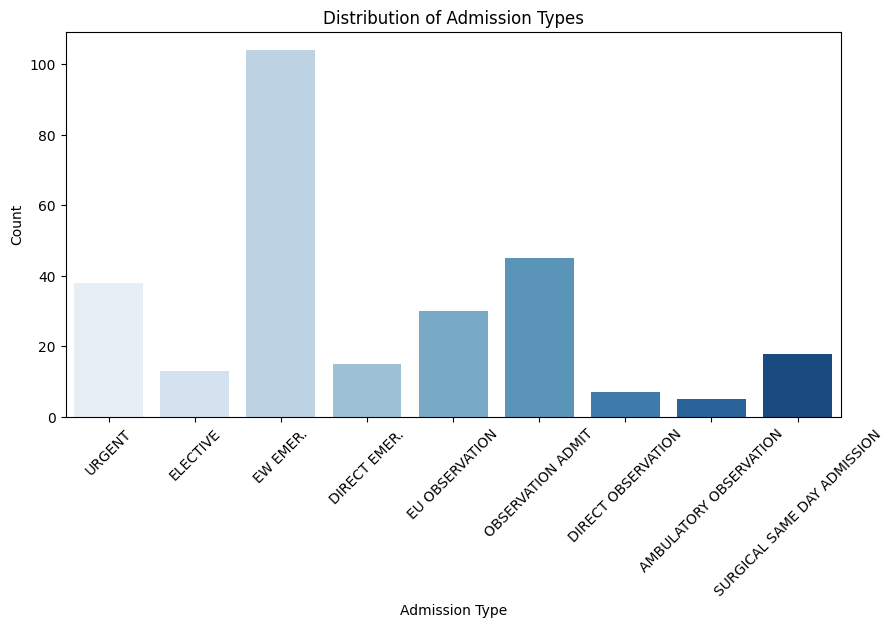

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='admission_type', palette='Blues')

plt.title("Distribution of Admission Types")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<!-- # # How many patients were admitted under each type of admission.
# # most common admission types 
# # for example if Most patients in the dataset came through emergency situations.
# # These patients are likely to have acute medical issues.
# # Very few planned surgeries or routine admissions.
# # we can fine the type of student how much are there 
# URGENT:-Semi-emergency, needs fast treatment
# elective:-Planned Admission, Scheduled procedure or surgery
# example :-Planned knee surgery -->
<!-- #EW EMER: Emergency Ward  EMER: Emergency :-this means the patient was admitted through Emergency Department, usually serious. -->
<!-- DIRECT EMER.:-Direct Emergency Admission":-
Patient came straight to emergency room, without referral or transfer.
Examples:
Someone coming directly by ambulance
Walk-in emergency cases -->
<!-- 
EU OBSERVATION:-EU = Emergency Unit
Meaning:
Patient admitted for short-term observation in Emergency Unit.
6. OBSERVATION ADMIT
Meaning:
Patient admitted for hospital observation only.
Not yet confirmed if they need full admission.
DIRECT OBSERVATION
Meaning:
Patient directly admitted to observation unit without emergency evaluation.
AMBULATORY OBSERVATION
Meaning:
Patient admitted for observation but still able to walk (not bedridden).
9. SURGICAL SAME DAY ADMISSION
Meaning:
Patient was admitted for a scheduled surgery on the same day. -->

C:\Users\admin\AppData\Local\Temp\ipykernel_10040\664981713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="hospital_expire_flag",palette='Set2')


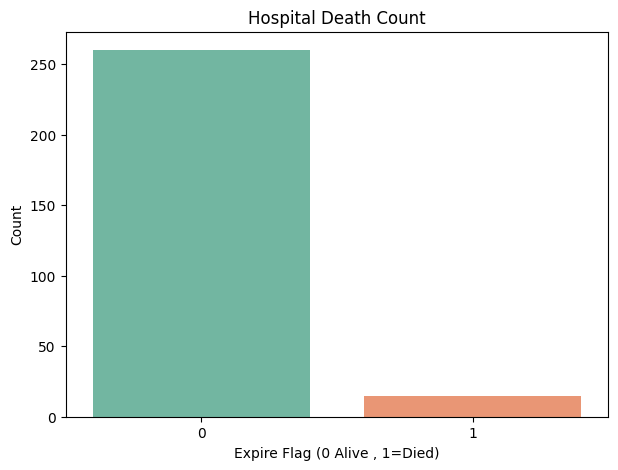

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x="hospital_expire_flag",palette='Set2')
plt.title("Hospital Death Count")
plt.xlabel("Expire Flag (0 Alive , 1=Died)")
plt.ylabel("Count")
plt.show()

In [13]:
# Chacking for the how much is alive and how much has been died

C:\Users\admin\AppData\Local\Temp\ipykernel_10040\152681724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="year",palette="viridis")


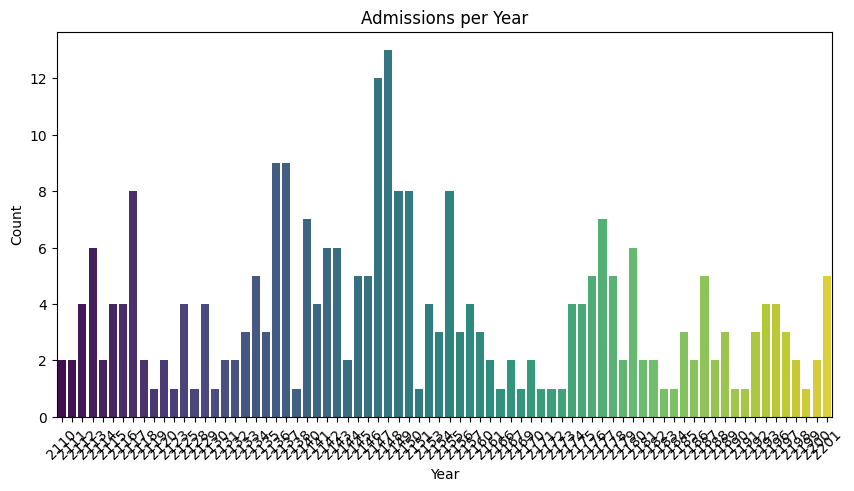

In [14]:
df["year"]=df["admittime"].dt.year
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="year",palette="viridis")
plt.title("Admissions per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [15]:
# They are artificial years created to protect privacy.

In [16]:
df['year'] = df['admittime'].dt.year
df['year'].min(), df['year'].max()


(np.int32(2110), np.int32(2201))

C:\Users\admin\AppData\Local\Temp\ipykernel_10040\46568518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='race', palette='coolwarm')


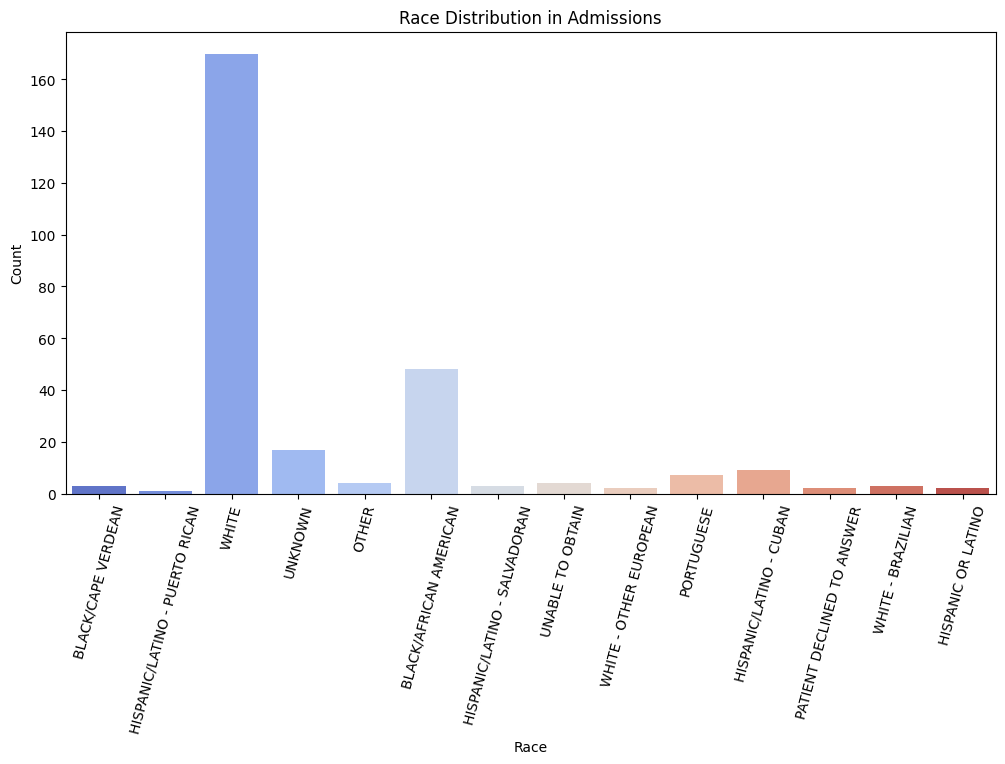

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='race', palette='coolwarm')

plt.title("Race Distribution in Admissions")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()


In [18]:
df["race"].unique()

array(['BLACK/CAPE VERDEAN', 'HISPANIC/LATINO - PUERTO RICAN', 'WHITE',
       'UNKNOWN', 'OTHER', 'BLACK/AFRICAN AMERICAN',
       'HISPANIC/LATINO - SALVADORAN', 'UNABLE TO OBTAIN',
       'WHITE - OTHER EUROPEAN', 'PORTUGUESE', 'HISPANIC/LATINO - CUBAN',
       'PATIENT DECLINED TO ANSWER', 'WHITE - BRAZILIAN',
       'HISPANIC OR LATINO'], dtype=object)

In [19]:
# How many patients belong to each race category in your admissions dataset.

C:\Users\admin\AppData\Local\Temp\ipykernel_10040\1465763822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='marital_status', palette='magma')


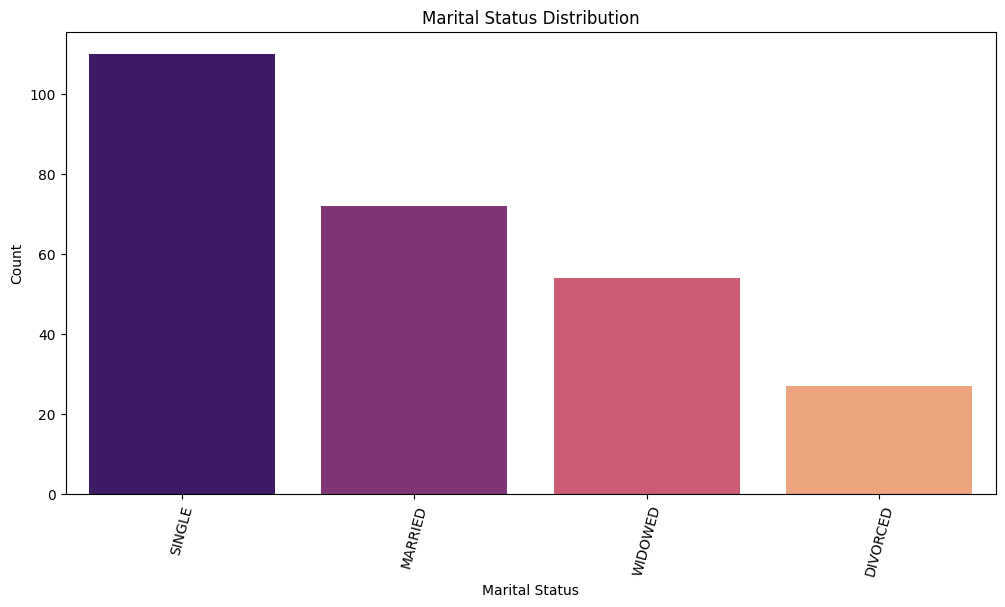

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='marital_status', palette='magma')

plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()


In [21]:
#widowed:-the person whose husband or wife has died and who has not married again 

C:\Users\admin\AppData\Local\Temp\ipykernel_10040\727671923.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='admission_location', palette='Set3')


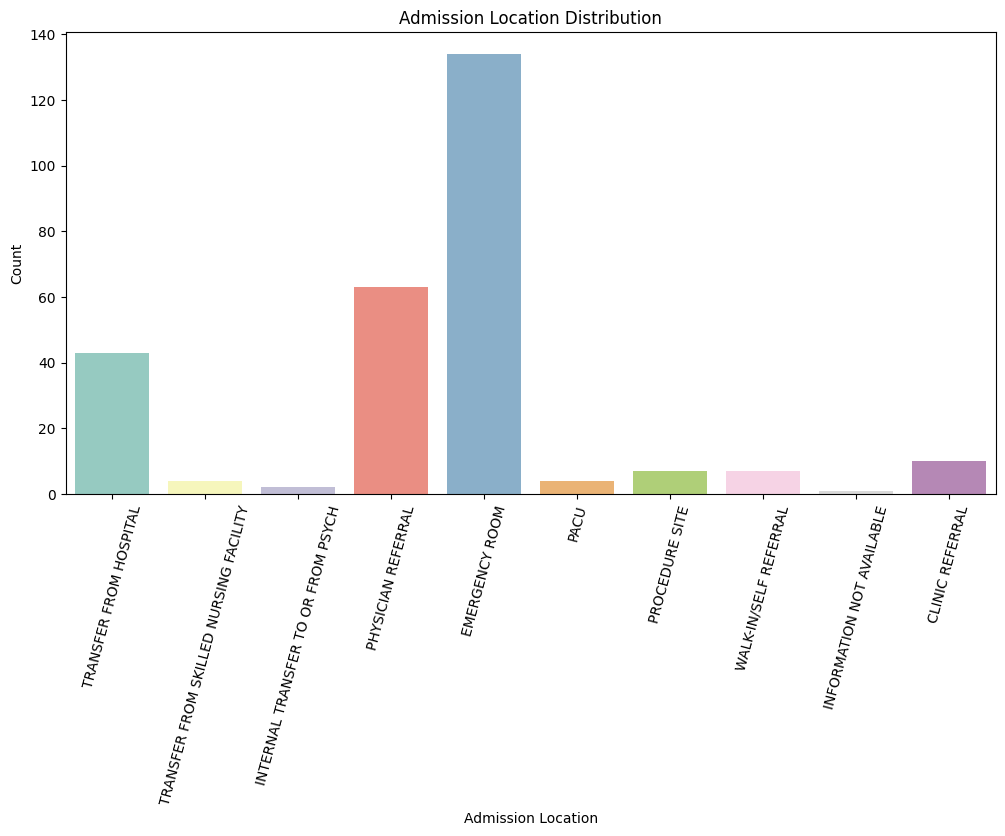

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='admission_location', palette='Set3')

plt.title("Admission Location Distribution")
plt.xlabel("Admission Location")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_10040\1650742544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='discharge_location', palette='cividis')


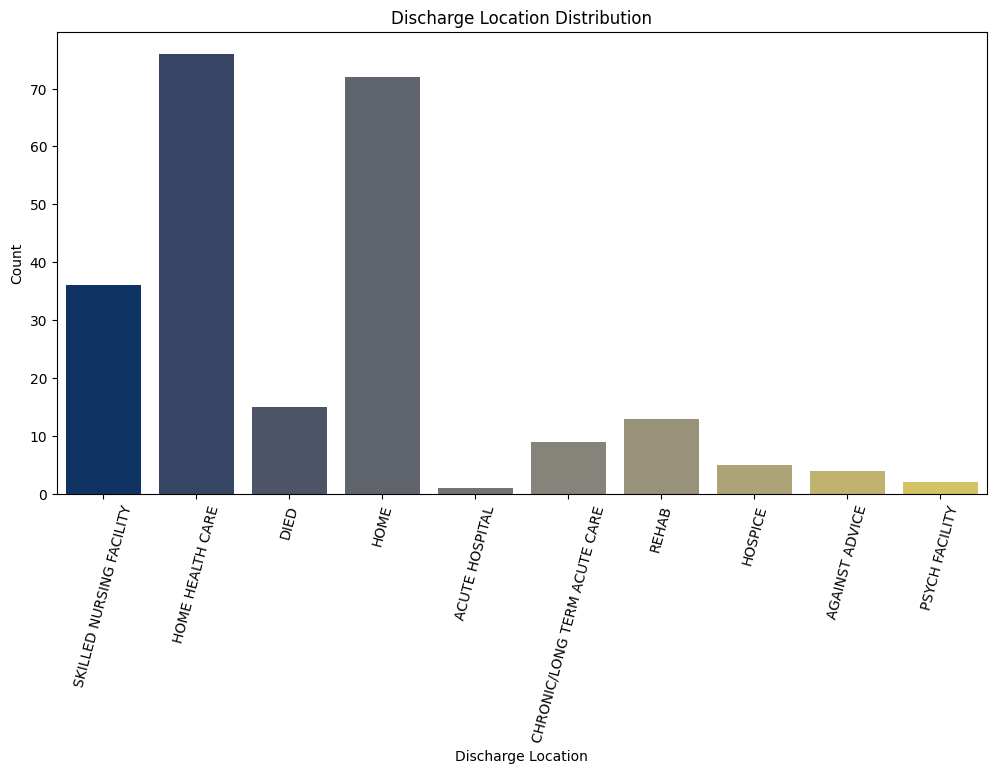

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='discharge_location', palette='cividis')

plt.title("Discharge Location Distribution")
plt.xlabel("Discharge Location")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()


In [24]:
# Psych: metal helth
# Acute hospital : urgent medical care 
# rehab:-regabilitation A place where people go to cover heal or improve after physical and mental like drug addiction 
# Hospic: give comfirt care 

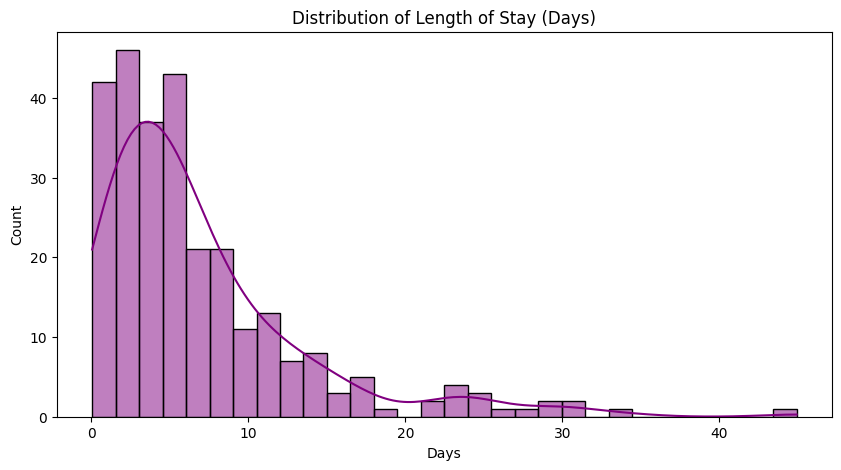

In [25]:
df['los_days'] = (df['dischtime'] - df['admittime']).dt.total_seconds() / (3600*24)

plt.figure(figsize=(10,5))
sns.histplot(df['los_days'], bins=30, kde=True, color='purple')

plt.title("Distribution of Length of Stay (Days)")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()


##  Notebook: chartevents.ipynb

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
df=pd.read_csv("E:/AI_NutriCare/Data/Raw/chartevents.csv")
df

subject_id   hadm_id   stay_id  caregiver_id            charttime  \
0         10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
1         10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
2         10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
3         10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
4         10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
...            ...       ...       ...           ...                  ...   
668857    10019003  29279905  34107647       60023.0  2153-03-28 10:49:28   
668858    10019003  29279905  34107647       60023.0  2153-03-28 10:49:28   
668859    10019003  29279905  34107647       60023.0  2153-03-28 10:49:28   
668860    10019003  29279905  34107647       60023.0  2153-03-28 10:49:28   
668861    10019003  29279905  34107647       60023.0  2153-03-28 10:49:28   

                  storetime  itemid  \
0       2132-12-15 23:45:00  225054   
1       2132-12-15 23:43:00  223769   
2       2132-12-15 23:47:00  223956   
3       2132-12-15 23:47:00  224866   
4       2132-12-15 23:45:00  227341   
...                     ...     ...   
668857                  NaN  220001   
668858                  NaN  220001   
668859                  NaN  220001   
668860                  NaN  220001   
668861                  NaN  220001   

                                                    value  valuenum valueuom  \
0                                                     On        NaN      NaN   
1                                                     100     100.0        %   
2                                           Atrial demand       NaN      NaN   
3                                                     Yes       NaN      NaN   
4                                                      No       0.0      NaN   
...                                                   ...       ...      ...   
668857                             .Care Plan - Infection       NaN      NaN   
668858                    Diabetes Mellitus (DM), Type II       NaN      NaN   
668859                                .Care Plan - Coping       NaN      NaN   
668860  Chronic obstructive pulmonary disease (COPD, B...       NaN      NaN   
668861  .Care Plan - Alteration in Bowel Elimination: ...       NaN      NaN   

        warning  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
668857      NaN  
668858      NaN  
668859      NaN  
668860      NaN  
668861      NaN  

[668862 rows x 11 columns]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668862 entries, 0 to 668861
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   subject_id    668862 non-null  int64  
 1   hadm_id       668862 non-null  int64  
 2   stay_id       668862 non-null  int64  
 3   caregiver_id  644622 non-null  float64
 4   charttime     668862 non-null  object 
 5   storetime     667703 non-null  object 
 6   itemid        668862 non-null  int64  
 7   value         648132 non-null  object 
 8   valuenum      257474 non-null  float64
 9   valueuom      162571 non-null  object 
 10  warning       667703 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 56.1+ MB


In [29]:
d_items = pd.read_csv("E:/AI_NutriCare/Data/Raw/d_items.csv")
d_items

itemid                                    label  \
0     226228                                   Gender   
1     226545                                     Race   
2     229877                      Suction events (CH)   
3     229875                  Oxygenator visible (CH)   
4     229266  Cannula sites visually inspected (ECMO)   
...      ...                                      ...   
4009  227452                      Tobramycin (Trough)   
4010  227451                      Tobramycin (Random)   
4011  227457                           Platelet Count   
4012  227468                               Fibrinogen   
4013  227463                                 Cortisol   

                                 abbreviation      linksto category unitname  \
0                                      Gender  chartevents      ADT      NaN   
1                                        Race  chartevents      ADT      NaN   
2                         Suction events (CH)  chartevents     ECMO      NaN   
3                     Oxygenator visible (CH)  chartevents     ECMO      NaN   
4     Cannula sites visually inspected (ECMO)  chartevents     ECMO      NaN   
...                                       ...          ...      ...      ...   
4009                      Tobramycin (Trough)  chartevents     Labs      NaN   
4010                      Tobramycin (Random)  chartevents     Labs      NaN   
4011                           Platelet Count  chartevents     Labs      NaN   
4012                               Fibrinogen  chartevents     Labs      NaN   
4013                                 Cortisol  chartevents     Labs      NaN   

            param_type  lownormalvalue  highnormalvalue  
0                 Text             NaN              NaN  
1                 Text             NaN              NaN  
2                 Text             NaN              NaN  
3                 Text             NaN              NaN  
4                 Text             NaN              NaN  
...                ...             ...              ...  
4009  Numeric with tag             NaN              NaN  
4010  Numeric with tag             NaN              NaN  
4011  Numeric with tag             NaN              NaN  
4012  Numeric with tag             NaN              NaN  
4013  Numeric with tag             NaN              NaN  

[4014 rows x 9 columns]

In [30]:
d_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   itemid           4014 non-null   int64  
 1   label            4014 non-null   object 
 2   abbreviation     4014 non-null   object 
 3   linksto          4014 non-null   object 
 4   category         4014 non-null   object 
 5   unitname         1108 non-null   object 
 6   param_type       4014 non-null   object 
 7   lownormalvalue   19 non-null     float64
 8   highnormalvalue  22 non-null     float64
dtypes: float64(2), int64(1), object(6)
memory usage: 282.4+ KB


In [31]:
useful_items = d_items[d_items['label'].str.contains(
    "heart rate|blood pressure|systolic|diastolic|glucose|weight|height",
    case=False, na=False
)]
useful_ids = useful_items['itemid'].unique()
useful_ids
# We're searching for labels that contain ANY of these words:
# heart rate blood pressure systolic diastolic glucose weight height
# na=False :- Avoids errors if label is missing (NaN).
# This new DataFrame contains only the useful measurements you asked for.
# Example output:
# itemid	label
# 220045	Heart Rate
# 220179	Systolic BP
# 220181	Diastolic BP
# 220621	Glucose
# 226707	Weight
# 226512	Height
# useful_ids = useful_items['itemid'].unique()
# This takes only the itemid column and removes duplicates.


array([227539, 227854, 228692, 226742, 226740, 226741, 226537, 225664,
       220621, 220047, 220058, 220056, 223752, 220046, 227538, 227537,
       223751, 226707, 226846, 226730, 226531, 226512, 224639, 229669,
       229899, 229668, 228151, 229900, 228152, 220059, 220060, 226851,
       226852, 226853, 226850, 225309, 220052, 227242, 220180, 227243,
       220051, 220181, 220045, 225310, 224643, 220179, 220050, 224167,
       227016, 227015, 225124, 227978, 227976, 227979, 227977, 220395,
       228388])

In [ ]:
chartevents_useful = df[df['itemid'].isin(useful_ids)]
# useful_ids contains itemid numbers for:
# heart rate
# systolic BP
# diastolic BP
# glucose
# weight
# height
# ✔ isin(useful_ids) means:
#  Keep ONLY the rows where itemid is one of those useful IDs.
chartevents_useful = chartevents_useful[chartevents_useful['valuenum'].notna()]
# valuenum is the numeric version of the value
# Example:
# value	valuenum
# "85"	85
# "120"	120
# "Normal"	NaN
# "High"	NaN

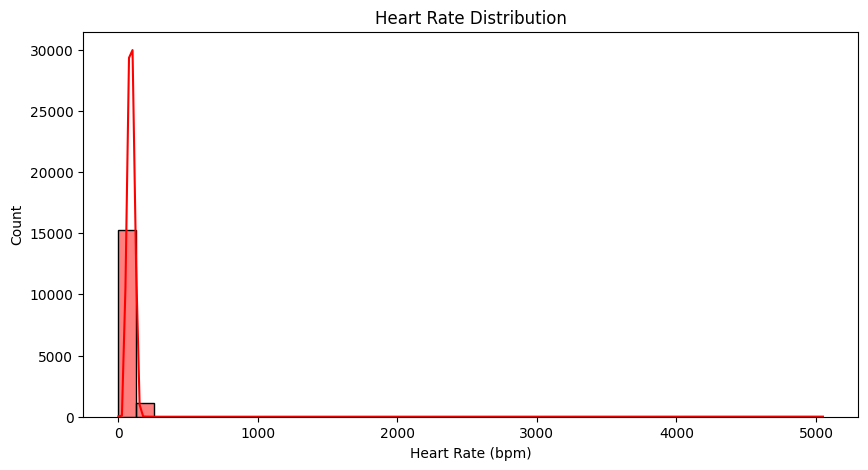

In [ ]:
heart_ids = useful_items[useful_items['label'].str.contains("heart rate", case=False)]['itemid']
# Meaning:
# Look inside d_items
# Find rows where the label includes the text “heart rate”
# Extract their itemid
# itemid = 220045  → Heart Rate
# So heart_ids becomes something like:
# [220045]
# This tells us which itemid in chartevents means Heart Rate.
heart = chartevents_useful[chartevents_useful['itemid'].isin(heart_ids)]
# From chartevents_useful, keep only rows where itemid = heart_ids.
# Now heart contains ONLY heart rate measurements.
# Example rows:
# subject_id	itemid	valuenum	time
# 10006	220045	85	2105-03-04
# 10006	220045	92	2105-03-04
# 10008	220045	66	2106-02-07
plt.figure(figsize=(10,5))
sns.histplot(heart['valuenum'], bins=40, kde=True, color='red')
plt.title("Heart Rate Distribution")
plt.xlabel("Heart Rate (bpm)")
plt.show()
# Peak of the graph = most common heart rate
# If the peak is around 70–90 bpm, it means most patients had normal heart rate.
#  Left tail (low values)
# If values below 60 appear → bradycardia (low heart rate).
# Right tail (high values)
# If values above 100 → tachycardia (high heart rate).
# How many patients had normal HR
# How many had tachycardia
# How many had bradycardia

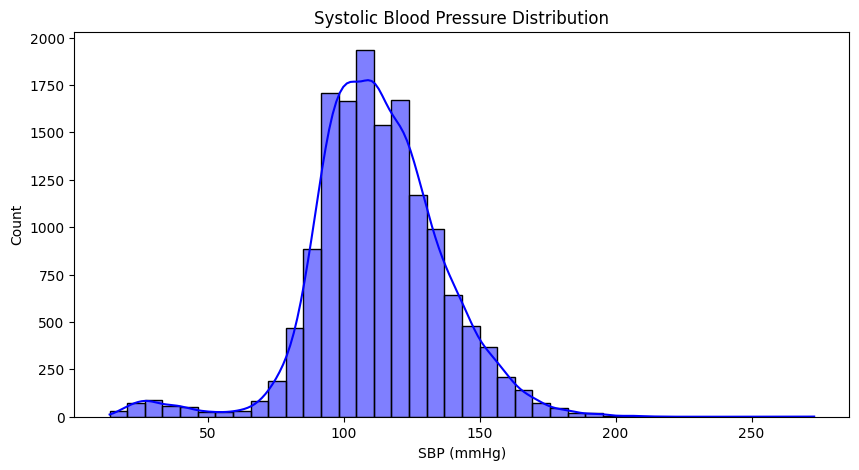

2167    229669
2177    229899
2186    228152
2370    220059
2454    226852
2462    226850
2563    225309
2571    227243
2584    220179
2586    220050
2591    224167
Name: itemid, dtype: int64

In [34]:
sbp_ids = useful_items[useful_items['label'].str.contains("systolic", case=False)]['itemid']
sbp = chartevents_useful[chartevents_useful['itemid'].isin(sbp_ids)]
plt.figure(figsize=(10,5))
sns.histplot(sbp['valuenum'], bins=40, kde=True, color='blue')
plt.title("Systolic Blood Pressure Distribution")
plt.xlabel("SBP (mmHg)")
plt.show()
# X-axis → Systolic Blood Pressure (mmHg)
# ✔ Y-axis → Number of readings
# The graph helps you understand:
# What BP values are most common
# How wide the range is
# Whether many patients had high or low blood pressure

# NORMAL AND ABNORMAL RANGES
# Normal SBP: 90 – 120 mmHg
# Elevated: 120 – 130 mmHg
# Hypertension Stage 1: 130 – 140
# Hypertension Stage 2: 140+
# Very high (danger): > 180
sbp_ids

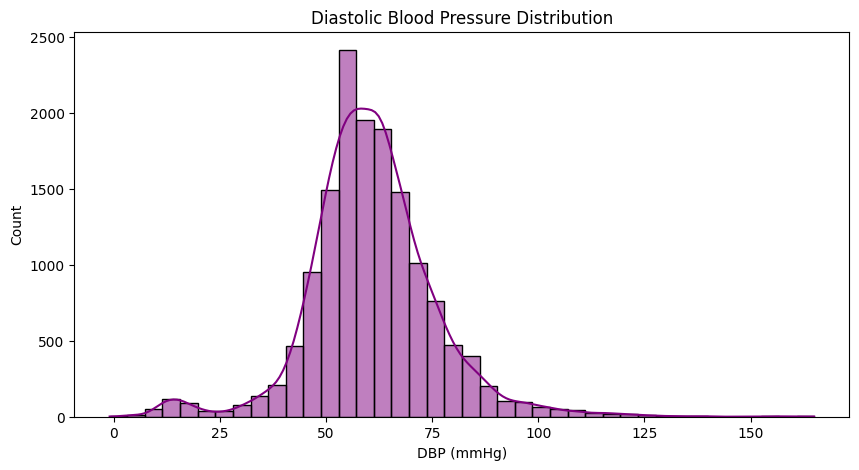

In [35]:
dbp_ids = useful_items[useful_items['label'].str.contains("diastolic", case=False)]['itemid']
dbp = chartevents_useful[chartevents_useful['itemid'].isin(dbp_ids)]

plt.figure(figsize=(10,5))
sns.histplot(dbp['valuenum'], bins=40, kde=True, color='purple')
plt.title("Diastolic Blood Pressure Distribution")
plt.xlabel("DBP (mmHg)")
plt.show()


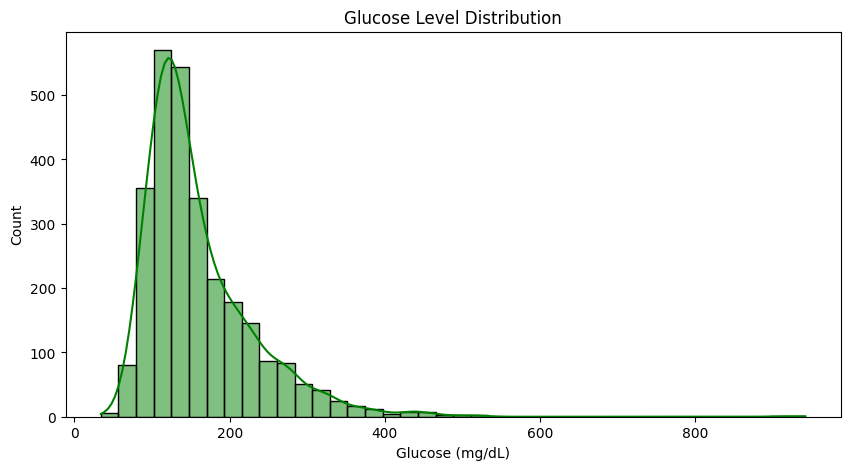

In [36]:
glucose_ids = useful_items[useful_items['label'].str.contains("glucose", case=False)]['itemid']
glucose = chartevents_useful[chartevents_useful['itemid'].isin(glucose_ids)]

plt.figure(figsize=(10,5))
sns.histplot(glucose['valuenum'], bins=40, kde=True, color='green')
plt.title("Glucose Level Distribution")
plt.xlabel("Glucose (mg/dL)")
plt.show()


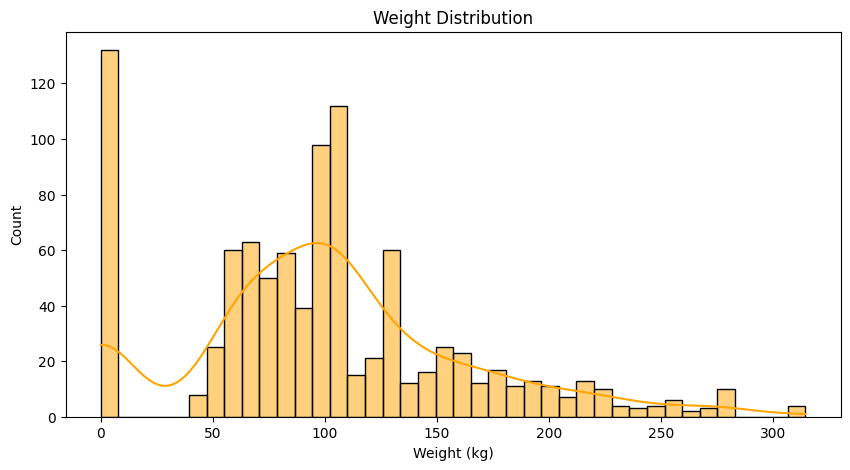

In [37]:
weight_ids = useful_items[useful_items['label'].str.contains("weight", case=False)]['itemid']
weight = chartevents_useful[chartevents_useful['itemid'].isin(weight_ids)]

plt.figure(figsize=(10,5))
sns.histplot(weight['valuenum'], bins=40, kde=True, color='orange')
plt.title("Weight Distribution")
plt.xlabel("Weight (kg)")
plt.show()


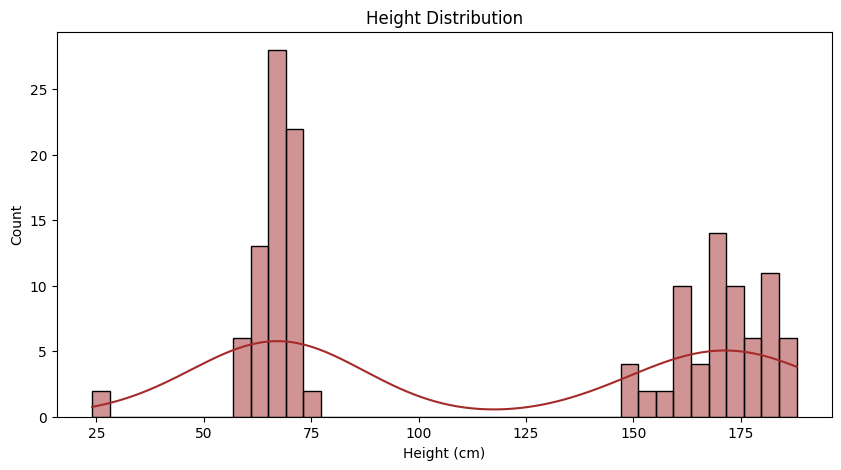

In [38]:
height_ids = useful_items[useful_items['label'].str.contains("height", case=False)]['itemid']
height = chartevents_useful[chartevents_useful['itemid'].isin(height_ids)]

plt.figure(figsize=(10,5))
sns.histplot(height['valuenum'], bins=40, kde=True, color='brown')
plt.title("Height Distribution")
plt.xlabel("Height (cm)")
plt.show()


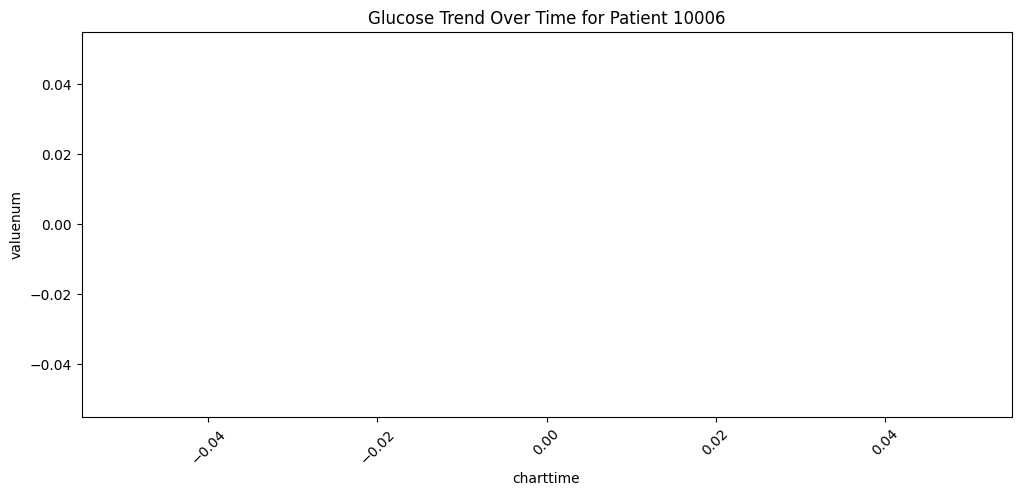

In [39]:
patient_id = 10006
one_patient = glucose[glucose['subject_id'] == patient_id]

plt.figure(figsize=(12,5))
sns.lineplot(data=one_patient, x='charttime', y='valuenum')
plt.title(f"Glucose Trend Over Time for Patient {patient_id}")
plt.xticks(rotation=45)
plt.show()
# There is no glucose data available for this patient.

In [103]:
icu=pd.read_csv("E:/AI_NutriCare/Data/Raw/icustays.csv")



In [88]:
icu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject_id      140 non-null    int64  
 1   hadm_id         140 non-null    int64  
 2   stay_id         140 non-null    int64  
 3   first_careunit  140 non-null    object 
 4   last_careunit   140 non-null    object 
 5   intime          140 non-null    object 
 6   outtime         140 non-null    object 
 7   los             140 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 8.9+ KB


In [104]:
vital_keywords = [
    "heart rate",
    "systolic",
    "diastolic",
    "mean arterial",
    "respiratory rate",
    "temperature",
    "spo2",
    "oxygen saturation",
    "gcs"
]


In [105]:
vital_items = d_items[
    d_items['label'].str.contains("|".join(vital_keywords), case=False, na=False)
][['itemid', 'label']]


In [106]:
vitals = chartevents.merge(
    vital_items,
    on='itemid',
    how='inner'
)


In [107]:
vitals = vitals[vitals['valuenum'].notna()].copy()


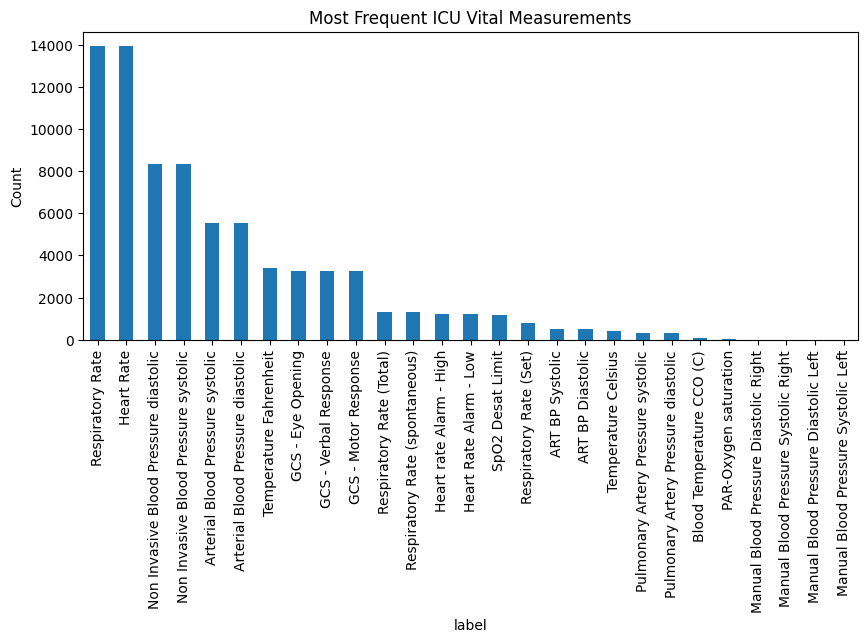

In [109]:
plt.figure(figsize=(10,4))
vitals['label'].value_counts().plot(kind='bar')
plt.title("Most Frequent ICU Vital Measurements")
plt.ylabel("Count")
plt.show()


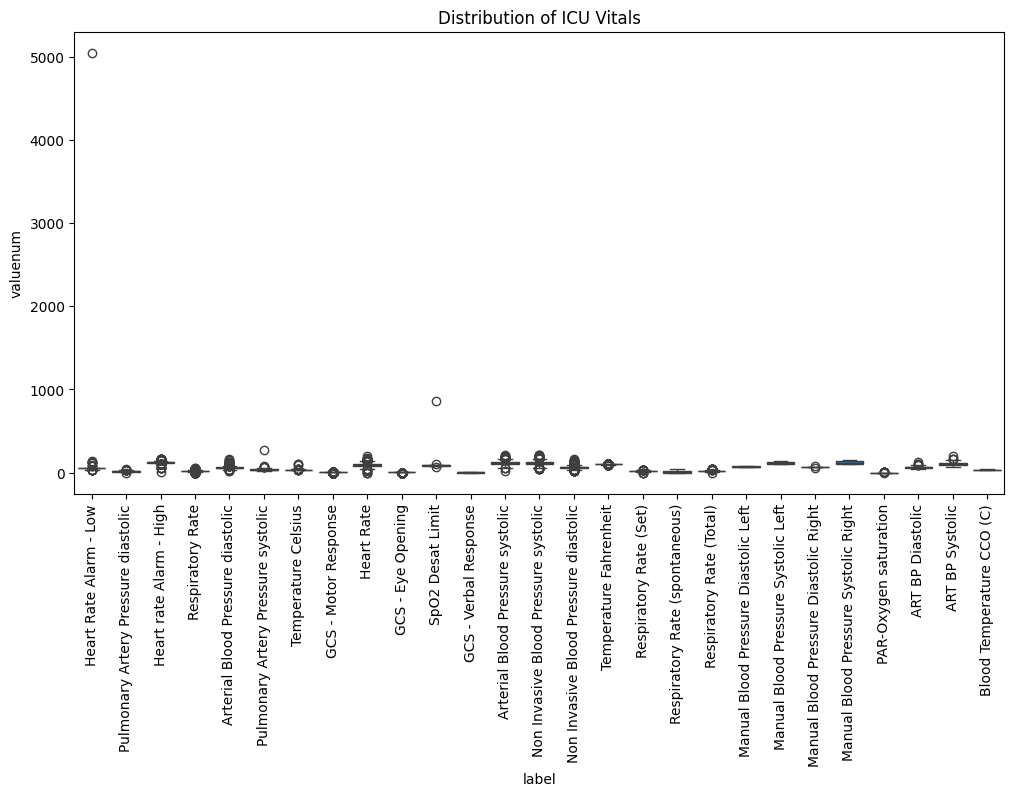

In [111]:
plt.figure(figsize=(12,6))
sns.boxplot(data=vitals, x='label', y='valuenum')
plt.xticks(rotation=90)
plt.title("Distribution of ICU Vitals")
plt.show()


In [ ]:
icu['stay_id'].nunique()
icu['stay_id']

0      31269608
1      37509585
2      32554129
3      31338022
4      32145159
         ...   
135    33683112
136    35026312
137    30101877
138    39804682
139    37093652
Name: stay_id, Length: 140, dtype: int64

In [90]:
icu['subject_id'].nunique()


100

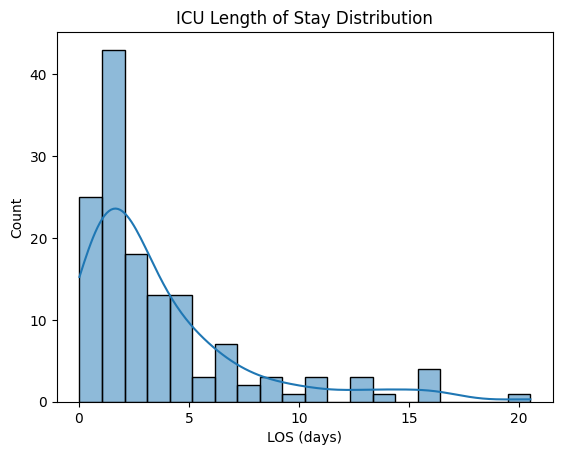

In [91]:
sns.histplot(icu['los'], bins=20, kde=True)
plt.title("ICU Length of Stay Distribution")
plt.xlabel("LOS (days)")
plt.show()


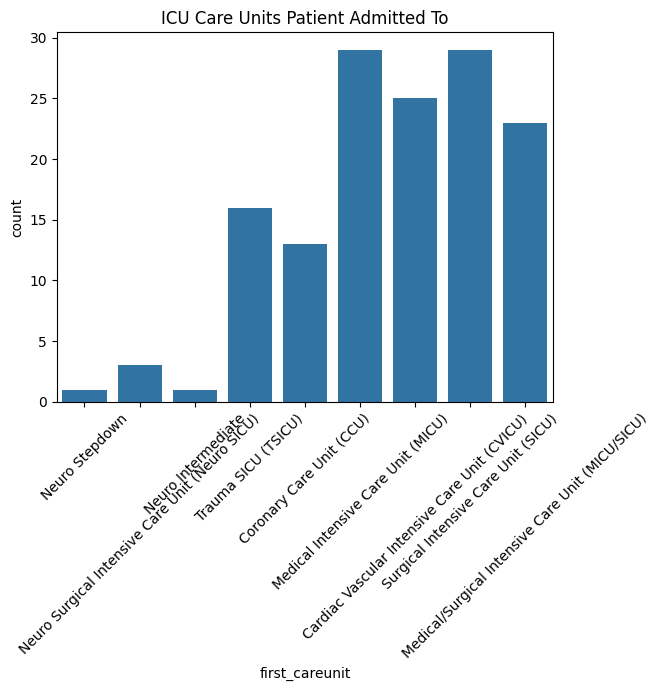

In [92]:
sns.countplot(data=icu, x='first_careunit')
plt.xticks(rotation=45)
plt.title("ICU Care Units Patient Admitted To")
plt.show()


In [93]:
pat_icu = icu[icu['subject_id'] == patient_id]
pat_icu


subject_id   hadm_id   stay_id  \
5      10039708  23819016  38559363   
80     10039708  24928679  37323533   
119    10039708  28258130  33281088   

                                       first_careunit  \
5                                 Trauma SICU (TSICU)   
80                Surgical Intensive Care Unit (SICU)   
119  Medical/Surgical Intensive Care Unit (MICU/SICU)   

                                        last_careunit               intime  \
5                                 Trauma SICU (TSICU)  2140-06-18 01:41:00   
80                Surgical Intensive Care Unit (SICU)  2143-09-19 19:40:55   
119  Medical/Surgical Intensive Care Unit (MICU/SICU)  2140-01-23 18:08:00   

                 outtime        los  
5    2140-06-19 21:47:16   1.837685  
80   2143-09-20 16:29:51   0.867315  
119  2140-02-08 22:28:20  16.180787

In [94]:
icu['subject_id'].nunique()
icu['subject_id'].unique()[:20]


array([10018328, 10020187, 10012853, 10020740, 10039708, 10020306,
       10019568, 10018081, 10010867, 10021487, 10003046, 10017492,
       10018501, 10008454, 10026354, 10029291, 10027445, 10010471,
       10023117, 10002495])

In [95]:
patient_id = icu['subject_id'].iloc[0]
patient_id


np.int64(10018328)

In [96]:
import numpy as np
patient_id = np.random.choice(icu['subject_id'].unique())
patient_id


np.int64(10002495)

In [97]:
pat_icu = icu[icu['subject_id'] == patient_id]
pat_icu


subject_id   hadm_id   stay_id            first_careunit  \
22    10002495  24982426  36753294  Coronary Care Unit (CCU)   

               last_careunit               intime              outtime  \
22  Coronary Care Unit (CCU)  2141-05-22 20:18:01  2141-05-27 22:24:02   

         los  
22  5.087512

In [98]:
stay_id = pat_icu['stay_id'].values[0]
stay_id


np.int64(36753294)

In [102]:
chartevents = pd.read_csv("E:/AI_NutriCare/Data/Raw/chartevents.csv")
d_items = pd.read_csv("E:/AI_NutriCare/Data/Raw/d_items.csv")


In [53]:
vital_keywords = [
    "heart rate",
    "blood pressure",
    "systolic",
    "diastolic",
    "map",
    "respiratory rate",
    "temperature",
    "o2 saturation",
    "spo2",
    "gcs"
]

vital_items = d_items[
    d_items['label'].str.contains("|".join(vital_keywords), case=False, na=False)
][['itemid', 'label']]
# "Find any label that contains ANY of these vital keywords."
# na=False
# Avoids errors if a label is missing (NaN).
# Keep only rows where the label contains a vital keyword
# like
# itemid	label
# 220045	Heart Rate
# 220050	Blood Pressure systolic
# 220051	Blood Pressure diastolic
# 220052	MAP
# 220210	Respiratory Rate
# 220277	Temperature Fahrenheit
# 220277	O2 Saturation Pulseoxymetry
# 220179	GCS Total
vital_items
# This converts the list into a regex OR expression:

itemid                            label
96    227539  ART Blood Pressure Alarm Source
415   224674           Changes in Temperature
621   223901             GCS - Motor Response
627   223900            GCS - Verbal Response
639   220739                GCS - Eye Opening
...      ...                              ...
2606  227024                MapScore_ApacheIV
2609  227013                GcsScore_ApacheIV
2633  227054            TemperatureF_ApacheIV
2636  227023                     MAP_ApacheIV
2890  229862    Forehead SpO2 Sensor in Place

[78 rows x 2 columns]

In [54]:
vitals = chartevents[chartevents['itemid'].isin(vital_items['itemid'])]
vitals


subject_id   hadm_id   stay_id  caregiver_id            charttime  \
1         10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
11        10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
20        10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
36        10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
37        10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
...            ...       ...       ...           ...                  ...   
668742    10019003  29279905  34107647       68979.0  2153-03-28 02:57:00   
668743    10019003  29279905  34107647       68979.0  2153-03-28 02:57:00   
668744    10019003  29279905  34107647       68979.0  2153-03-28 02:57:00   
668745    10019003  29279905  34107647       68979.0  2153-03-28 02:57:00   
668747    10019003  29279905  34107647       34392.0  2153-03-30 17:57:00   

                  storetime  itemid value  valuenum  valueuom  warning  
1       2132-12-15 23:43:00  223769   100     100.0         %      0.0  
11      2132-12-15 23:41:00  220047    55      55.0       bpm      0.0  
20      2132-12-16 00:02:00  220060    12      12.0      mmHg      0.0  
36      2132-12-15 23:41:00  220046   120     120.0       bpm      0.0  
37      2132-12-16 00:02:00  220210    19      19.0  insp/min      0.0  
...                     ...     ...   ...       ...       ...      ...  
668742  2153-03-28 02:57:00  223761  97.8      97.8        °F      0.0  
668743  2153-03-28 02:57:00  220277    92      92.0         %      0.0  
668744  2153-03-28 02:57:00  220180    62      62.0      mmHg      0.0  
668745  2153-03-28 02:57:00  220179   118     118.0      mmHg      0.0  
668747  2153-03-30 17:58:00  224027  Warm       NaN       NaN      0.0  

[116424 rows x 11 columns]

In [55]:
vitals = vitals.merge(vital_items, on="itemid", how="left")
# Join vitals with vital_items, matching rows where itemid is the same.

In [56]:
vital_items.head()
vital_items.shape


(78, 2)

In [57]:
vitals = vitals[vitals['valuenum'].notna()].copy()


In [58]:
best_patient = vitals['subject_id'].value_counts().idxmax()
patient_id = best_patient


In [59]:
pat_icu = icu[icu['subject_id'] == patient_id]
stay_id = pat_icu['stay_id'].values[0]


In [60]:
pat_vitals = vitals[vitals['stay_id'] == stay_id].copy()
pat_vitals['charttime'] = pd.to_datetime(pat_vitals['charttime'])


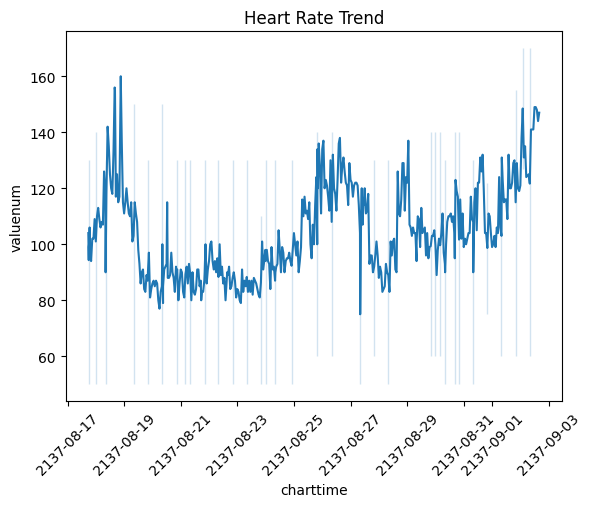

In [61]:
hr = pat_vitals[pat_vitals['label'].str.contains("Heart Rate", case=False)]
sns.lineplot(data=hr, x='charttime', y='valuenum')
plt.title("Heart Rate Trend")
plt.xticks(rotation=45)
plt.show()


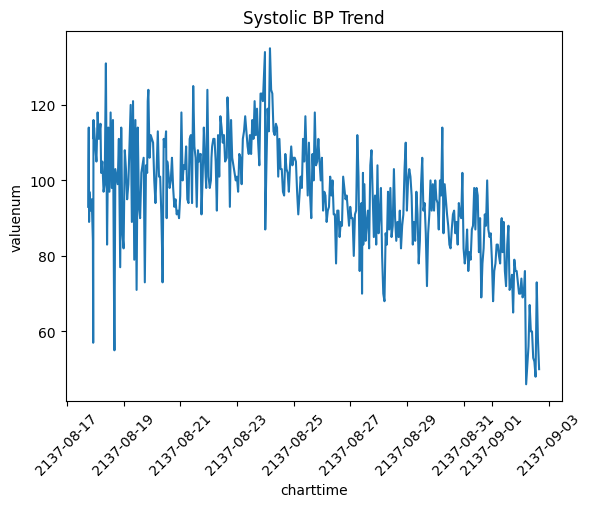

In [62]:
sbp = pat_vitals[pat_vitals['label'].str.contains("systolic", case=False)]
sns.lineplot(data=sbp, x='charttime', y='valuenum')
plt.title("Systolic BP Trend")
plt.xticks(rotation=45)
plt.show()
# Normal: 110–120 mmHg
# Low (hypotension): < 90
# High (hypertension): > 140
# PHASE 1 — (Left side, Aug 17–19): High variability
# You see:
# Lots of spikes and dips
# Readings swinging between 60 and 130 mmHg

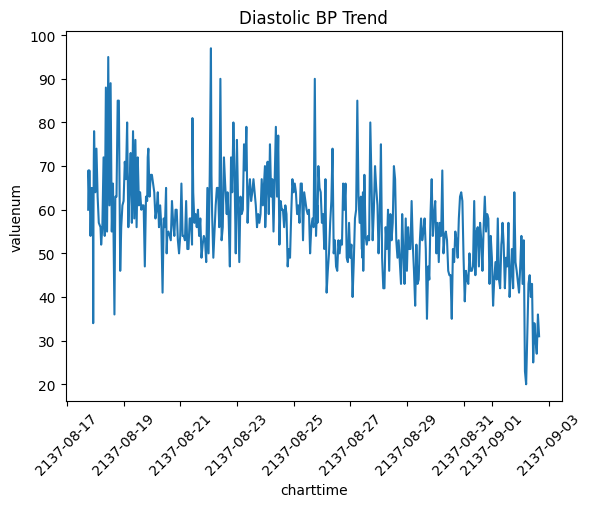

In [63]:
dbp = pat_vitals[pat_vitals['label'].str.contains("diastolic", case=False)]
sns.lineplot(data=dbp, x='charttime', y='valuenum')
plt.title("Diastolic BP Trend")
plt.xticks(rotation=45)
plt.show()


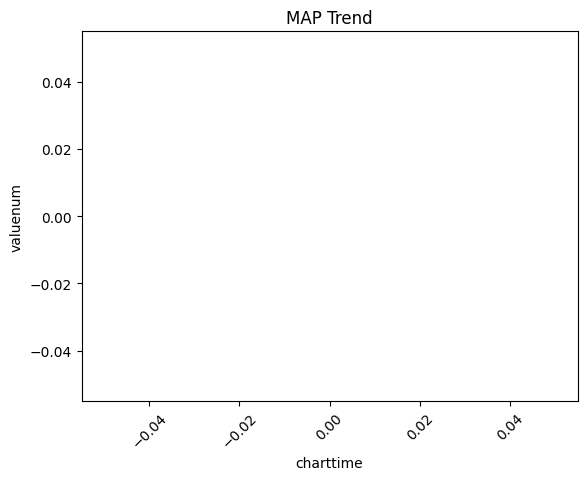

In [64]:
map_bp = pat_vitals[pat_vitals['label'].str.contains("map", case=False)]
sns.lineplot(data=map_bp, x='charttime', y='valuenum')
plt.title("MAP Trend")
plt.xticks(rotation=45)
plt.show()


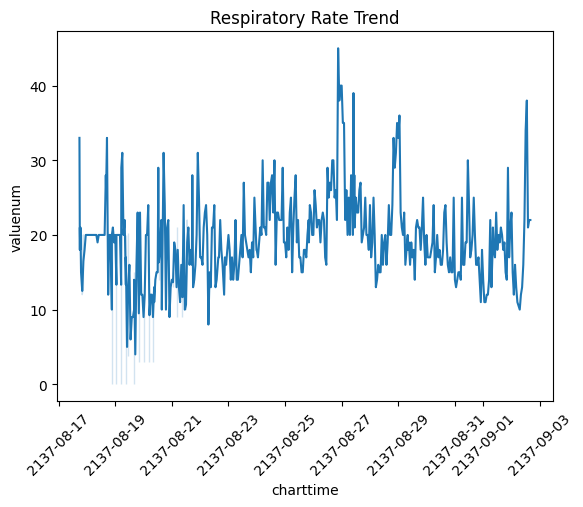

In [65]:
rr = pat_vitals[pat_vitals['label'].str.contains("respiratory rate", case=False)]
sns.lineplot(data=rr, x='charttime', y='valuenum')
plt.title("Respiratory Rate Trend")
plt.xticks(rotation=45)
plt.show()


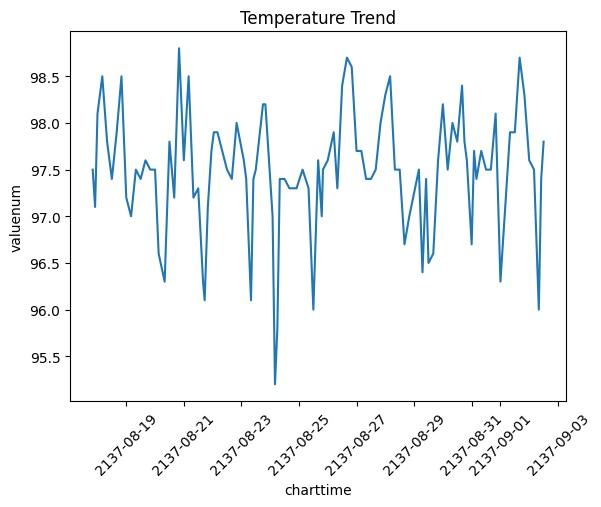

In [66]:
temp = pat_vitals[pat_vitals['label'].str.contains("temperature", case=False)]
sns.lineplot(data=temp, x='charttime', y='valuenum')
plt.title("Temperature Trend")
plt.xticks(rotation=45)
plt.show()


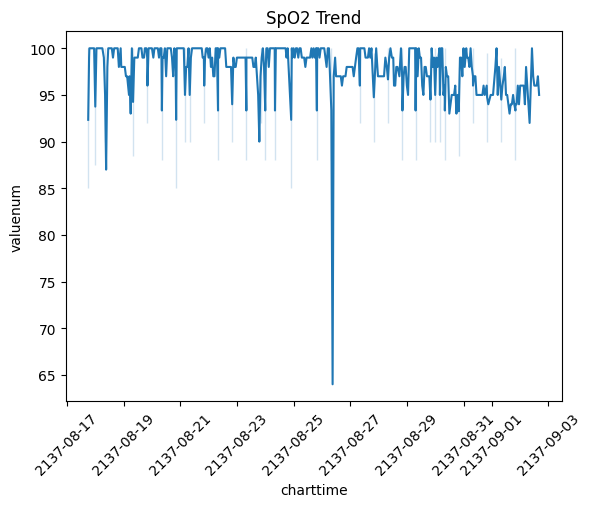

In [67]:
spo2 = pat_vitals[pat_vitals['label'].str.contains("o2|spo2", case=False)]
sns.lineplot(data=spo2, x='charttime', y='valuenum')
plt.title("SpO2 Trend")
plt.xticks(rotation=45)
plt.show()
# SpO₂ = Oxygen Saturation
# It measures how much oxygen the blood is carrying.
# 95–100% → Normal
# 90–94% → Mild hypoxia
# < 90% → Hypoxia (dangerous)

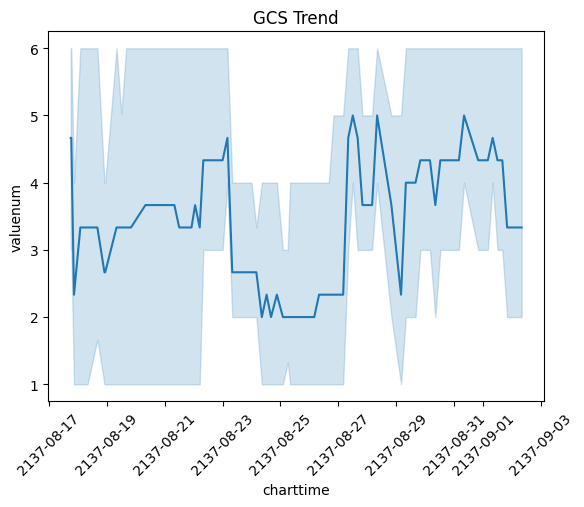

In [68]:
gcs = pat_vitals[pat_vitals['label'].str.contains("gcs", case=False)]
sns.lineplot(data=gcs, x='charttime', y='valuenum')
plt.title("GCS Trend")
plt.xticks(rotation=45)
plt.show()
# Glasgow Coma Scale
# how conscious and neurologically responsive a patient is.
# GCS fluctuating between 2 and 5
# This indicates:
# Severe neurological impairment at times (score 2–3)
# Moderate improvement later (score 4–5)

# The shaded area represents the uncertainty or variability around the GCS trend line.


In [100]:
vitals['charttime'] = pd.to_datetime(vitals['charttime'])

hourly = (
    vitals
    .set_index('charttime')
    .groupby(['stay_id', 'label'])
    .resample('1H')['valuenum']
    .mean()
    .reset_index()
)


C:\Users\admin\AppData\Local\Temp\ipykernel_10040\486869960.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('1H')['valuenum']


In [2]:
# hourly['valuenum'] = hourly.groupby(
#     ['stay_id', 'label']
# )['valuenum'].apply(lambda x: x.ffill().bfill())


## Notebook: inputevents.ipynb

In [69]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [70]:
inputevents=pd.read_csv("E:/AI_NutriCare/Data/Raw/inputevents.csv")
inputevents

subject_id   hadm_id   stay_id  caregiver_id            starttime  \
0        10005817  20626031  32604416          4793  2132-12-16 19:50:00   
1        10005817  20626031  32604416         92805  2132-12-15 20:15:00   
2        10005817  20626031  32604416         20310  2132-12-17 09:15:00   
3        10005817  20626031  32604416         79166  2132-12-16 09:36:00   
4        10005817  20626031  32604416         92805  2132-12-15 20:10:00   
...           ...       ...       ...           ...                  ...   
20399    10019003  29279905  34107647         88156  2153-03-29 20:58:00   
20400    10019003  29279905  34107647         83144  2153-03-30 00:00:00   
20401    10019003  29279905  34107647         68979  2153-03-28 02:57:00   
20402    10019003  29279905  34107647         68979  2153-03-28 06:05:00   
20403    10019003  29279905  34107647         68979  2153-03-28 04:48:00   

                   endtime            storetime  itemid    amount amountuom  \
0      2132-12-16 19:51:00  2132-12-16 19:50:00  225798  1.000000      dose   
1      2132-12-15 20:16:00  2132-12-15 20:11:00  225798  1.000000      dose   
2      2132-12-17 09:16:00  2132-12-17 09:28:00  225798  1.000000      dose   
3      2132-12-16 09:37:00  2132-12-16 09:37:00  225798  1.000000      dose   
4      2132-12-15 21:10:00  2132-12-15 20:10:00  221456  2.000000     grams   
...                    ...                  ...     ...       ...       ...   
20399  2153-03-29 20:59:00  2153-03-29 20:58:00  221385  0.500000        mg   
20400  2153-03-30 00:01:00  2153-03-30 01:24:00  221385  0.500000        mg   
20401  2153-03-28 04:48:00  2153-03-28 02:58:00  221906  0.319770        mg   
20402  2153-03-28 08:00:00  2153-03-28 06:11:00  221906  0.110377        mg   
20403  2153-03-28 06:05:00  2153-03-28 06:11:00  221906  0.147810        mg   

       ...                      ordercomponenttypedescription  \
0      ...                               Main order parameter   
1      ...                               Main order parameter   
2      ...                               Main order parameter   
3      ...                               Main order parameter   
4      ...  Additives                                     ...   
...    ...                                                ...   
20399  ...                               Main order parameter   
20400  ...                               Main order parameter   
20401  ...                               Main order parameter   
20402  ...                               Main order parameter   
20403  ...                               Main order parameter   

      ordercategorydescription  patientweight  totalamount totalamountuom  \
0                    Drug Push           91.0        500.0             ml   
1                    Drug Push           91.0        500.0             ml   
2                    Drug Push           91.0        500.0             ml   
3                    Drug Push           91.0        500.0             ml   
4                Continuous IV           91.0        100.0             ml   
...                        ...            ...          ...            ...   
20399                Drug Push           96.0          NaN            NaN   
20400                Drug Push           96.0          NaN            NaN   
20401           Continuous Med           96.0        250.0             ml   
20402           Continuous Med           96.0        250.0             ml   
20403           Continuous Med           96.0        250.0             ml   

      isopenbag continueinnextdept statusdescription  originalamount  \
0             0                  0   FinishedRunning        1.000000   
1             0                  0   FinishedRunning        1.000000   
2             0                  0   FinishedRunning        1.000000   
3             0                  0   FinishedRunning        1.000000   
4             0                  0   FinishedRunning        2.000000   
...    

In [71]:
inputevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20404 entries, 0 to 20403
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   subject_id                     20404 non-null  int64  
 1   hadm_id                        20404 non-null  int64  
 2   stay_id                        20404 non-null  int64  
 3   caregiver_id                   20404 non-null  int64  
 4   starttime                      20404 non-null  object 
 5   endtime                        20404 non-null  object 
 6   storetime                      20404 non-null  object 
 7   itemid                         20404 non-null  int64  
 8   amount                         20404 non-null  float64
 9   amountuom                      20404 non-null  object 
 10  rate                           11038 non-null  float64
 11  rateuom                        11038 non-null  object 
 12  orderid                        20404 non-null 

In [72]:
inputevents.isnull().sum()

subject_id                          0
hadm_id                             0
stay_id                             0
caregiver_id                        0
starttime                           0
endtime                             0
storetime                           0
itemid                              0
amount                              0
amountuom                           0
rate                             9366
rateuom                          9366
orderid                             0
linkorderid                         0
ordercategoryname                   0
secondaryordercategoryname       6260
ordercomponenttypedescription       0
ordercategorydescription            0
patientweight                       0
totalamount                      3314
totalamountuom                   3312
isopenbag                           0
continueinnextdept                  0
statusdescription                   0
originalamount                      0
originalrate                        0
dtype: int64

In [73]:
# data
# itemid
# Code that maps to what was given:
# Insulin
# Potassium chloride
# Saline
# Dextrose (sugar fluid)
# Antibiotics
# Blood products
# amountuom
# Unit of measure
# (mL, mg, Units, mEq, etc.)

# rdercategoryname
# Type of order:
# IV fluids
# Medications
# Electrolytes
# Nutrition



In [74]:
inputevents['ordercategoryname'].value_counts()


ordercategoryname
01-Drips                    8582
02-Fluids (Crystalloids)    2538
14-Oral/Gastric Intake      2180
05-Med Bolus                2171
08-Antibiotics (IV)         2108
06-Insulin (Non IV)          532
11-Prophylaxis (Non IV)      524
10-Prophylaxis (IV)          476
13-Enteral Nutrition         397
03-IV Fluid Bolus            314
07-Blood Products            232
04-Fluids (Colloids)         115
16-Pre Admission/Non-ICU     107
09-Antibiotics (Non IV)       85
12-Parenteral Nutrition       43
Name: count, dtype: int64

In [75]:
d_items = pd.read_csv("E:/AI_NutriCare/Data/Raw/d_items.csv")
d_items

itemid                                    label  \
0     226228                                   Gender   
1     226545                                     Race   
2     229877                      Suction events (CH)   
3     229875                  Oxygenator visible (CH)   
4     229266  Cannula sites visually inspected (ECMO)   
...      ...                                      ...   
4009  227452                      Tobramycin (Trough)   
4010  227451                      Tobramycin (Random)   
4011  227457                           Platelet Count   
4012  227468                               Fibrinogen   
4013  227463                                 Cortisol   

                                 abbreviation      linksto category unitname  \
0                                      Gender  chartevents      ADT      NaN   
1                                        Race  chartevents      ADT      NaN   
2                         Suction events (CH)  chartevents     ECMO      NaN   
3                     Oxygenator visible (CH)  chartevents     ECMO      NaN   
4     Cannula sites visually inspected (ECMO)  chartevents     ECMO      NaN   
...                                       ...          ...      ...      ...   
4009                      Tobramycin (Trough)  chartevents     Labs      NaN   
4010                      Tobramycin (Random)  chartevents     Labs      NaN   
4011                           Platelet Count  chartevents     Labs      NaN   
4012                               Fibrinogen  chartevents     Labs      NaN   
4013                                 Cortisol  chartevents     Labs      NaN   

            param_type  lownormalvalue  highnormalvalue  
0                 Text             NaN              NaN  
1                 Text             NaN              NaN  
2                 Text             NaN              NaN  
3                 Text             NaN              NaN  
4                 Text             NaN              NaN  
...                ...             ...              ...  
4009  Numeric with tag             NaN              NaN  
4010  Numeric with tag             NaN              NaN  
4011  Numeric with tag             NaN              NaN  
4012  Numeric with tag             NaN              NaN  
4013  Numeric with tag             NaN              NaN  

[4014 rows x 9 columns]

In [76]:
input_items = inputevents.merge(d_items[['itemid','label']], on='itemid', how='left')
input_items[['itemid','label']].head()


itemid              label
0  225798         Vancomycin
1  225798         Vancomycin
2  225798         Vancomycin
3  225798         Vancomycin
4  221456  Calcium Gluconate

In [77]:
patient_id = input_items['subject_id'].sample(1).values[0]
patient_id


np.int64(10003400)

In [78]:
top_patients = input_items['subject_id'].value_counts()
patient_id = top_patients.idxmax()
patient_id


np.int64(10039708)

In [79]:
pat_inputs = input_items[input_items['subject_id'] == patient_id].copy()
pat_inputs.head()


subject_id   hadm_id   stay_id  caregiver_id            starttime  \
1097    10039708  24928679  37323533         46241  2143-09-20 03:47:00   
1098    10039708  24928679  37323533         61559  2143-09-20 14:00:00   
1099    10039708  24928679  37323533         61559  2143-09-20 08:00:00   
1100    10039708  24928679  37323533         46241  2143-09-19 21:18:00   
1101    10039708  24928679  37323533         61559  2143-09-20 08:00:00   

                  endtime            storetime  itemid      amount amountuom  \
1097  2143-09-20 03:48:00  2143-09-20 03:47:00  220952   25.000000        ml   
1098  2143-09-20 14:30:00  2143-09-20 15:30:00  225833  500.000026        mg   
1099  2143-09-20 08:30:00  2143-09-20 10:13:00  225833  500.000026        mg   
1100  2143-09-20 16:28:00  2143-09-19 21:18:00  225155  191.666683       mcg   
1101  2143-09-20 08:30:00  2143-09-20 10:13:00  225158  249.999990        ml   

      ...  ordercategorydescription patientweight  totalamount  \
1097  ...                 Drug Push          77.8          NaN   
1098  ...             Continuous IV          77.8        250.0   
1099  ...             Continuous IV          77.8        250.0   
1100  ...            Continuous Med          77.8        100.0   
1101  ...             Continuous IV          77.8        250.0   

      totalamountuom isopenbag continueinnextdept statusdescription  \
1097             NaN         0                  0   FinishedRunning   
1098              ml         0                  0   FinishedRunning   
1099              ml         0                  0   FinishedRunning   
1100              ml         0                  0           Stopped   
1101              ml         0                  0   FinishedRunning   

     originalamount  originalrate         label  
1097           25.0     25.000000  Dextrose 50%  
1098          500.0     16.666666      Thiamine  
1099          500.0     16.666666      Thiamine  
1100          500.0      9.999999    Octreotide  
1101          250.0    500.000000     NaCl 0.9%  

[5 rows x 27 columns]

In [80]:
pat_inputs['starttime'] = pd.to_datetime(pat_inputs['starttime'])
pat_inputs['endtime'] = pd.to_datetime(pat_inputs['endtime'])


In [81]:
iv_fluids = pat_inputs[pat_inputs['ordercategoryname'].str.contains("fluid", case=False, na=False)]
iv_fluids[['starttime','label','amount','amountuom']].head()


starttime      label      amount amountuom
1098 2143-09-20 14:00:00   Thiamine  500.000026        mg
1099 2143-09-20 08:00:00   Thiamine  500.000026        mg
1101 2143-09-20 08:00:00  NaCl 0.9%  249.999990        ml
1102 2143-09-20 04:57:00  NaCl 0.9%   57.583335        ml
1104 2143-09-20 14:00:00  NaCl 0.9%  249.999990        ml

In [82]:
insulin = pat_inputs[pat_inputs['label'].str.contains("insulin", case=False, na=False)]
insulin[['starttime','amount','rate','label']].head()


starttime  amount  rate              label
3621 2140-01-30 08:22:00     2.0   NaN  Insulin - Humalog
3622 2140-01-25 08:11:00     4.0   NaN  Insulin - Humalog
3623 2140-01-29 12:25:00     2.0   NaN  Insulin - Humalog
3624 2140-02-07 12:32:00     2.0   NaN  Insulin - Humalog
3625 2140-01-30 12:32:00     2.0   NaN  Insulin - Humalog

In [83]:
k_replace = pat_inputs[pat_inputs['label'].str.contains("potassium", case=False, na=False)]
k_replace[['starttime','amount','amountuom']].head()


starttime     amount amountuom
4050 2140-01-28 15:50:00  20.000001       mEq
4051 2140-01-23 23:15:00  20.000001       mEq
4052 2140-02-01 12:40:00  20.000001       mEq
4053 2140-01-23 21:00:00  20.000001       mEq
4054 2140-01-29 18:09:00  20.000001       mEq

In [84]:
abx = pat_inputs[pat_inputs['ordercategoryname'].str.contains("antibiotic", case=False, na=False)]
abx[['starttime','label','amount']].head()


starttime       label  amount
3485 2140-01-26 08:00:00  Vancomycin     1.0
3486 2140-02-05 10:17:00  Vancomycin     1.0
3487 2140-02-06 08:50:00  Vancomycin     1.0
3488 2140-02-03 12:03:00  Vancomycin     1.0
3489 2140-01-27 08:53:00  Vancomycin     1.0

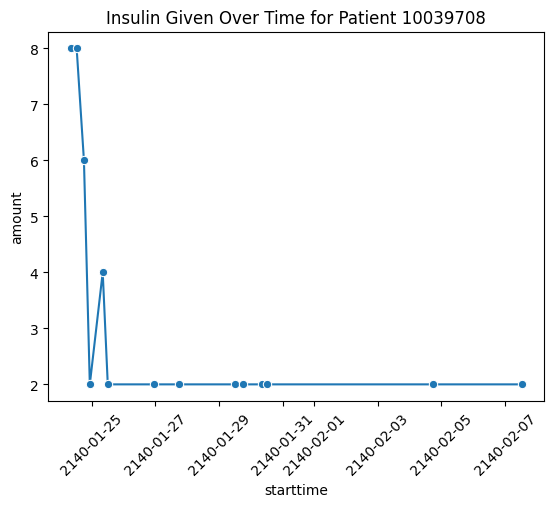

In [85]:
sns.lineplot(data=insulin, x='starttime', y='amount', marker='o')
plt.title(f"Insulin Given Over Time for Patient {patient_id}")
plt.xticks(rotation=45)
plt.show()


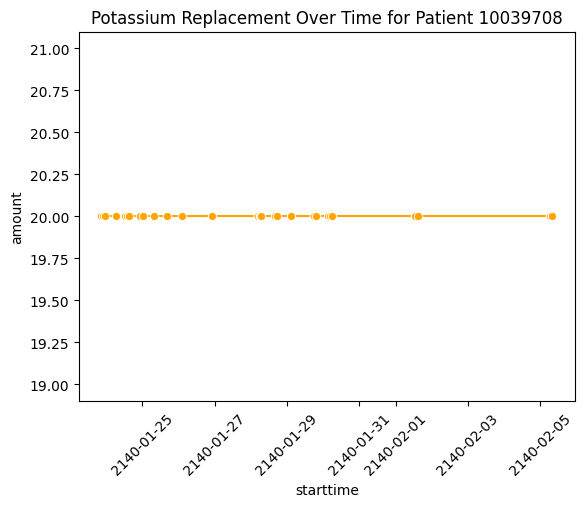

In [86]:
sns.lineplot(data=k_replace, x='starttime', y='amount', marker='o', color='orange')
plt.title(f"Potassium Replacement Over Time for Patient {patient_id}")
plt.xticks(rotation=45)
plt.show()


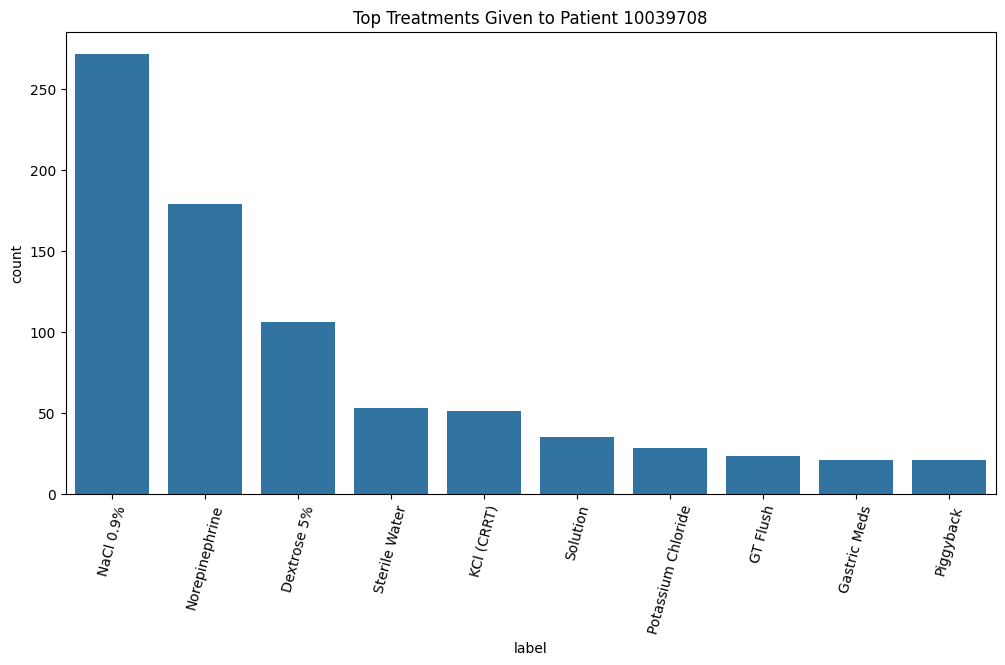

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=pat_inputs, x='label', order=pat_inputs['label'].value_counts().head(10).index)
plt.xticks(rotation=75)
plt.title(f"Top Treatments Given to Patient {patient_id}")
plt.show()


##  Notebook: labevents.ipynb

In [ ]:
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt  #for data visualization
import seaborn as sns #for enhanced data vis

In [ ]:
labevents=pd.read_csv("E:/AI_NutriCare/Data/Raw/labevents.csv")
labevents
# labevents.csv is the file in MIMIC-IV that contains all laboratory test results for patients.
# like blood test urine test stool tests chemistry tests electrolytes infection kidney and live function tests diabetes 

labevent_id  subject_id     hadm_id  specimen_id  itemid  \
0            172061    10014354  29600294.0      1808066   51277   
1            172062    10014354  29600294.0      1808066   51279   
2            172068    10014354  29600294.0      1808066   52172   
3            172063    10014354  29600294.0      1808066   51301   
4            172050    10014354  29600294.0      1808066   51249   
...             ...         ...         ...          ...     ...   
107722       254700    10021487  28998349.0     78791160   50804   
107723       254702    10021487  28998349.0     78791160   50818   
107724       254707    10021487  28998349.0     78791160   52033   
107725       254706    10021487  28998349.0     78791160   50825   
107726       454886    10038999  27189241.0     13534028   50873   

       order_provider_id            charttime            storetime value  \
0                    NaN  2148-08-16 00:00:00  2148-08-16 01:30:00  15.4   
1                    NaN  2148-08-16 00:00:00  2148-08-16 01:30:00  3.35   
2                    NaN  2148-08-16 00:00:00  2148-08-16 01:30:00  49.7   
3                    NaN  2148-08-16 00:00:00  2148-08-16 01:30:00  20.3   
4                    NaN  2148-08-16 00:00:00  2148-08-16 01:30:00  31.1   
...                  ...                  ...                  ...   ...   
107722               NaN  2116-12-07 18:59:00  2116-12-07 19:00:00    35   
107723               NaN  2116-12-07 18:59:00  2116-12-07 19:00:00    56   
107724               NaN  2116-12-07 18:59:00  2116-12-07 18:59:00  ART.   
107725               NaN  2116-12-07 18:59:00  2116-12-07 18:59:00  39.7   
107726               NaN  2131-05-23 21:59:00  2131-05-25 14:36:00   ___   

        valuenum valueuom  ref_range_lower  ref_range_upper      flag  \
0          15.40        %             10.5             15.5       NaN   
1           3.35     m/uL              4.6              6.1  abnormal   
2          49.70       fL             35.1             46.3  abnormal   
3          20.30     K/uL              4.0             10.0  abnormal   
4          31.10     g/dL             32.0             37.0  abnormal   
...          ...      ...              ...              ...       ...   
107722     35.00    mEq/L             21.0             30.0  abnormal   
107723     56.00    mm Hg             35.0             45.0  abnormal   
107724       NaN      NaN              NaN              NaN       NaN   
107725     39.70      NaN              NaN              NaN       NaN   
107726       NaN      NaN              NaN              NaN       NaN   

       priority   comments  
0       ROUTINE        NaN  
1       ROUTINE        NaN  
2       ROUTINE        NaN  
3       ROUTINE        NaN  
4       ROUTINE        NaN  
...         ...        ...  
107722      NaN        NaN  
107723      NaN        NaN  
107724      NaN        ___  
107725      NaN        NaN  
107726     STAT  NEGATIVE.  

[107727 rows x 16 columns]

In [ ]:
labevents.columns
# labevent_id
# Unique ID for the lab test
# subject_id
# Unique patient ID
# hadm_id
# Hospital admission ID
# specimen_id
# ID of the sample that was taken
# itemid
# The test type (like glucose, creatinine, sodium).kwds=
# order_provider_id
# ID of the doctor/nurse who ordered the test
# charttime
# Exact time when the sample was collected (VERY important)
# storetime
# When the result was recorded in the system
# value
# Raw text value of the test
# valuenum
# Numeric value of the lab result (this is what you graph!)
# valueuom
# Unit of measurement
# ref_range_lower / ref_range_upper
# Normal range for each test
# priority
# "ROUTINE" (regular testing)
# "STAT" (urgent test ordered)

Index(['labevent_id', 'subject_id', 'hadm_id', 'specimen_id', 'itemid',
       'order_provider_id', 'charttime', 'storetime', 'value', 'valuenum',
       'valueuom', 'ref_range_lower', 'ref_range_upper', 'flag', 'priority',
       'comments'],
      dtype='object')

In [ ]:
d_labitems=pd.read_csv("E:/AI_NutriCare/Data/Raw/d_labitems.csv")
d_labitems

itemid                       label                fluid    category
0      50808                Free Calcium                Blood   Blood Gas
1      50826                Tidal Volume                Blood   Blood Gas
2      50813                     Lactate                Blood   Blood Gas
3      52029           % Ionized Calcium                Blood   Blood Gas
4      50801  Alveolar-arterial Gradient                Blood   Blood Gas
...      ...                         ...                  ...         ...
1617   52249                      Delete  Cerebrospinal Fluid  Hematology
1618   52251                      Delete  Cerebrospinal Fluid  Hematology
1619   52266                  Macrophage  Cerebrospinal Fluid  Hematology
1620   52262           Immunophenotyping  Cerebrospinal Fluid  Hematology
1621   52265                     Lymphs#  Cerebrospinal Fluid  Hematology

[1622 rows x 4 columns]

In [ ]:
labevents = labevents.merge(d_labitems[['itemid','label']], on='itemid', how='left')
labevents
10014354

10014354

In [ ]:
labevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107727 entries, 0 to 107726
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   labevent_id        107727 non-null  int64  
 1   subject_id         107727 non-null  int64  
 2   hadm_id            79307 non-null   float64
 3   specimen_id        107727 non-null  int64  
 4   itemid             107727 non-null  int64  
 5   order_provider_id  16830 non-null   object 
 6   charttime          107727 non-null  object 
 7   storetime          106735 non-null  object 
 8   value              98139 non-null   object 
 9   valuenum           95246 non-null   float64
 10  valueuom           91524 non-null   object 
 11  ref_range_lower    88999 non-null   float64
 12  ref_range_upper    88999 non-null   float64
 13  flag               40275 non-null   object 
 14  priority           98398 non-null   object 
 15  comments           18454 non-null   object 
 16  la

In [ ]:
print(labevents.columns)


Index(['labevent_id', 'subject_id', 'hadm_id', 'specimen_id', 'itemid',
       'order_provider_id', 'charttime', 'storetime', 'value', 'valuenum',
       'valueuom', 'ref_range_lower', 'ref_range_upper', 'flag', 'priority',
       'comments', 'label'],
      dtype='object')


In [ ]:
important_keywords = [
    "glucose", "creatinine", "bun", "urea",
    "sodium", "potassium",
    "hemoglobin", "hematocrit",
    "cholesterol",
    "ast", "alt",
    "wbc"
]
useful_labitems = d_labitems[d_labitems['label'].str.contains(
    '|'.join(important_keywords),
    case=False, na=False
)]
useful_lab_ids = useful_labitems['itemid'].unique()
# We search inside d_labitems to find their itemid numbers.
# We extract those itemid values into useful_lab_ids.
# Then we filter labevents using those itemids.

In [ ]:
labs_useful = labevents[labevents['itemid'].isin(useful_lab_ids)]
# Filter labevents to keep only important lab tests
labs_useful = labs_useful[labs_useful['valuenum'].notna()]
# useful_lab_ids contains itemid values of important tests
# (glucose, creatinine, potassium, sodium, etc.)

In [ ]:
labevents['itemid'].value_counts().head(20)


itemid
50971    3022
50983    3007
50912    3003
50902    2981
51006    2974
51221    2913
50882    2863
50868    2860
51265    2827
51222    2787
51301    2760
51277    2760
51249    2760
51250    2760
51279    2760
51248    2760
50931    2711
50960    2470
50893    2377
50970    2337
Name: count, dtype: int64

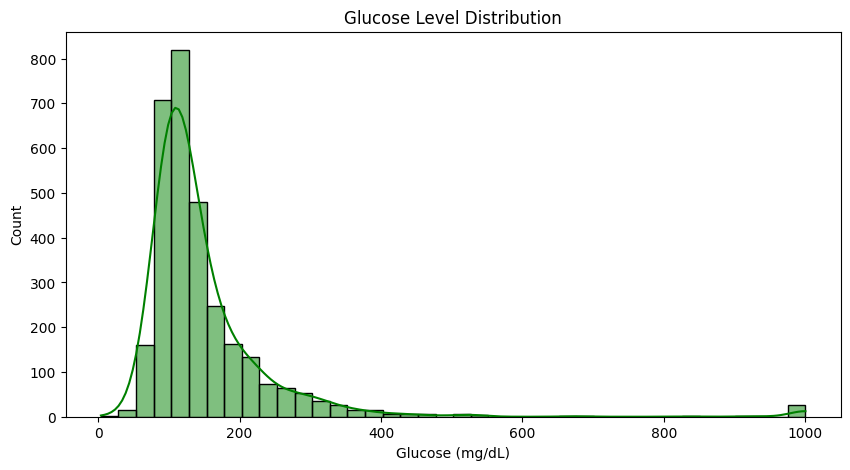

In [ ]:
glucose_labs = labs_useful[labs_useful['label'].str.contains("glucose", case=False)]
plt.figure(figsize=(10,5))
sns.histplot(glucose_labs['valuenum'], bins=40, kde=True, color='green')
plt.title("Glucose Level Distribution")
plt.xlabel("Glucose (mg/dL)")
plt.show()
# subject_id	valuenum	valueuom	flag
# 10014354	193.0	mg/dL	abnormal
# 10014354	210.0	mg/dL	abnormal
# 10035631	168.0	mg/dL	abnormal
# How many glucose readings fall into different ranges
# If most patients have normal glucose
# Normal = 70–100 mg/dL
# ✔ If many patients have diabetes
# High glucose = >125 mg/dL
# ✔ If some readings are dangerously high
# Very high = >200 mg/dL

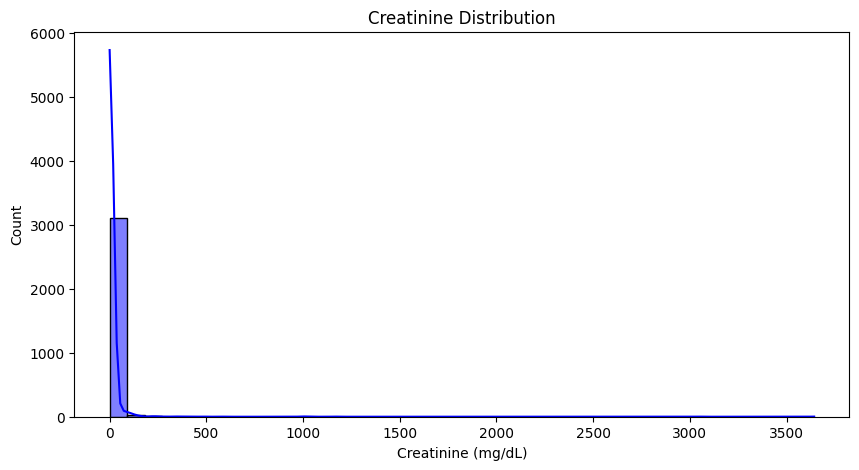

In [ ]:
creatinine = labs_useful[labs_useful['label'].str.contains("creatinine", case=False)]
plt.figure(figsize=(10,5))
sns.histplot(creatinine['valuenum'], bins=40, kde=True, color='blue')
plt.title("Creatinine Distribution")
plt.xlabel("Creatinine (mg/dL)")
plt.show()
# we're selecting all rows where the lab test name contains “creatinine”.
# Creatinine is a kidney function marker, so you now have:
# subject_id	valuenum	unit	flag
# 100104	1.1	mg/dL	normal
# 100245	2.8	mg/dL	abnormal
# 100356	5.2	mg/dL	abnormal
# Kidney damage range:
# 1.5 = Mild
# 2.0 = Moderate
# 3.0 = Severe
# 5.0 = Dangerous


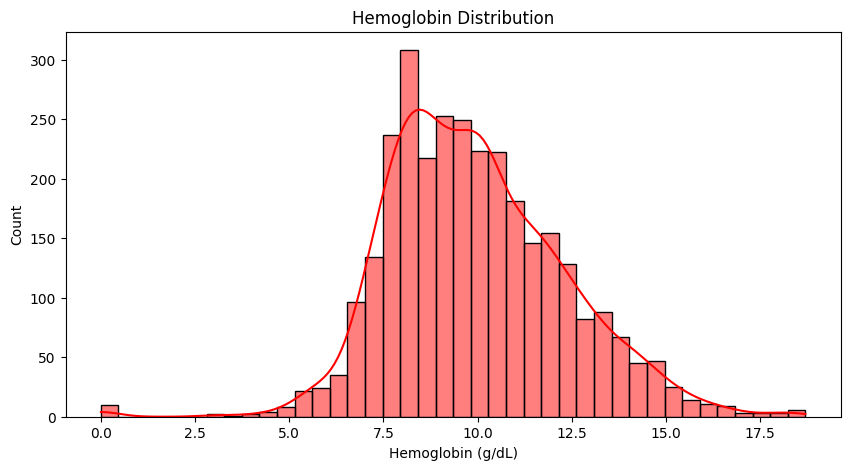

In [ ]:
hb = labs_useful[labs_useful['label'].str.contains("hemoglobin", case=False)]
plt.figure(figsize=(10,5))
sns.histplot(hb['valuenum'], bins=40, kde=True, color='red')
plt.title("Hemoglobin Distribution")
plt.xlabel("Hemoglobin (g/dL)")
plt.show()


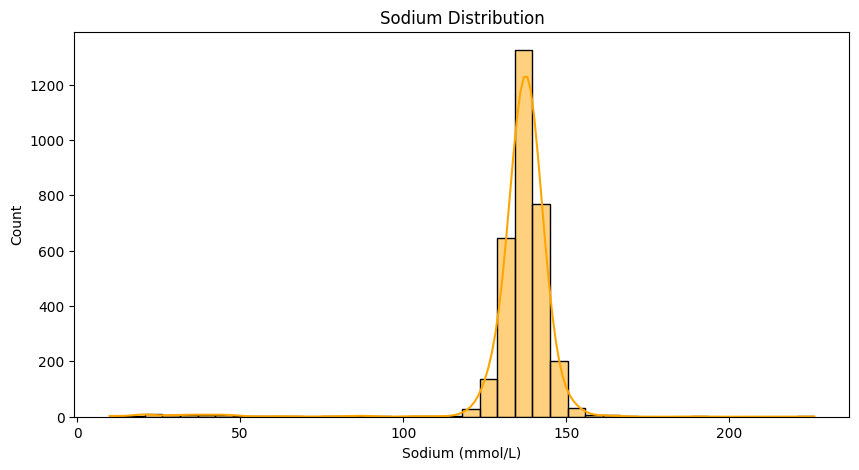

In [ ]:
sodium = labs_useful[labs_useful['label'].str.contains("sodium", case=False)]
plt.figure(figsize=(10,5))
sns.histplot(sodium['valuenum'], bins=40, kde=True, color='orange')
plt.title("Sodium Distribution")
plt.xlabel("Sodium (mmol/L)")
plt.show()


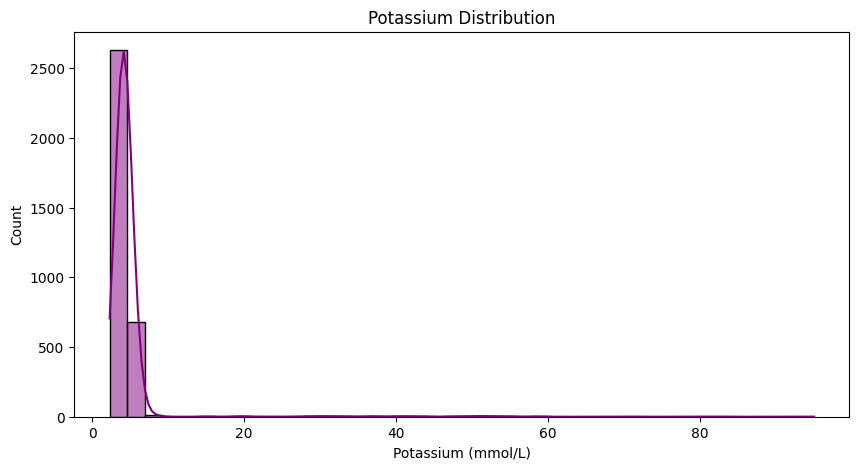

In [ ]:
potassium = labs_useful[labs_useful['label'].str.contains("potassium", case=False)]
plt.figure(figsize=(10,5))
sns.histplot(potassium['valuenum'], bins=40, kde=True, color='purple')
plt.title("Potassium Distribution")
plt.xlabel("Potassium (mmol/L)")
plt.show()


In [ ]:
ast = labs_useful[labs_useful['label'].str.contains("ast", case=False)]
alt = labs_useful[labs_useful['label'].str.contains("alt", case=False)]


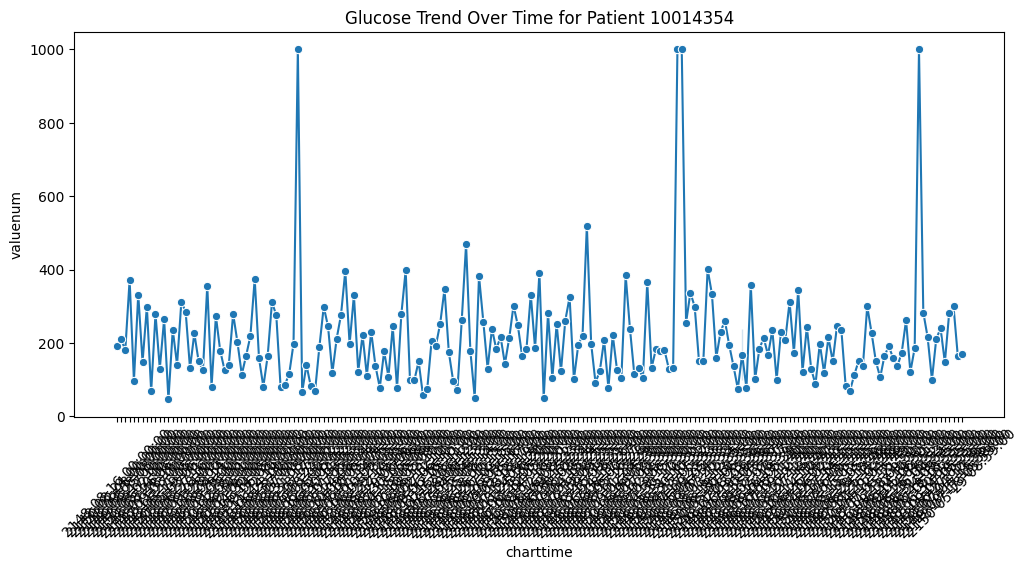

In [ ]:
patient_id = 10014354

glucose_patient = glucose_labs[glucose_labs['subject_id'] == patient_id]
# Filters glucose results for ONLY that patient
plt.figure(figsize=(12,5))
sns.lineplot(data=glucose_patient, x='charttime', y='valuenum', marker="o")
plt.title(f"Glucose Trend Over Time for Patient {patient_id}")
plt.xticks(rotation=45)
plt.show()



In [ ]:
glucose_patient.shape



(198, 17)

In [ ]:
glucose_patient[['charttime', 'valuenum']].head(20)

charttime  valuenum
30    2148-08-16 00:00:00     193.0
80    2148-08-24 00:00:00     210.0
235   2150-02-08 00:00:00     181.0
499   2148-09-08 08:00:00     372.0
1093  2148-08-25 00:00:00      97.0
2174  2149-09-17 10:00:00     332.0
3019  2148-09-02 00:00:00     148.0
3150  2150-05-10 00:00:00     299.0
3491  2148-08-26 06:00:00      68.0
4095  2148-07-18 16:00:00     279.0
4483  2148-09-03 00:00:00     130.0
4962  2147-11-27 00:00:00     265.0
5128  2148-05-11 05:00:00      46.0
5236  2148-05-19 06:00:00     236.0
5265  2150-05-03 06:00:00     141.0
5635  2147-04-27 11:00:00     313.0
5811  2148-06-27 16:00:00     284.0
6049  2148-08-28 00:00:00     131.0
6109  2148-09-04 00:00:00     226.0
6362  2147-11-28 00:00:00     150.0

In [ ]:
glucose_patients = glucose_labs['subject_id'].value_counts()
glucose_patients
# It counts how many glucose tests each patient has.

subject_id
10035631    216
10014354    198
10039708    165
10019003    116
10021487    114
           ... 
10031404      3
10036156      3
10019568      3
10022281      3
10019917      2
Name: count, Length: 100, dtype: int64

In [ ]:
best_patient = glucose_patients.idxmax()
best_patient
#it will give the maximum number of glucouse tests takem by the patent whose id 


np.int64(10035631)

In [ ]:
patient_id = best_patient
#patient_id : 10035631 now become this 
glucose_patient = glucose_labs[glucose_labs['subject_id'] == patient_id].copy()
# Select all glucose rows belonging to this patient.”
# ALL glucose tests
# ALL timestamps
# ALL values
glucose_patient['charttime'] = pd.to_datetime(glucose_patient['charttime'])
# Convert charttime into proper datetime format
# "2148-08-16 00:00:00"  converts to   datetime(2148, 8, 16)
glucose_patient = glucose_patient.sort_values('charttime')
# Arrange the glucose tests in order from earliest to latest.”

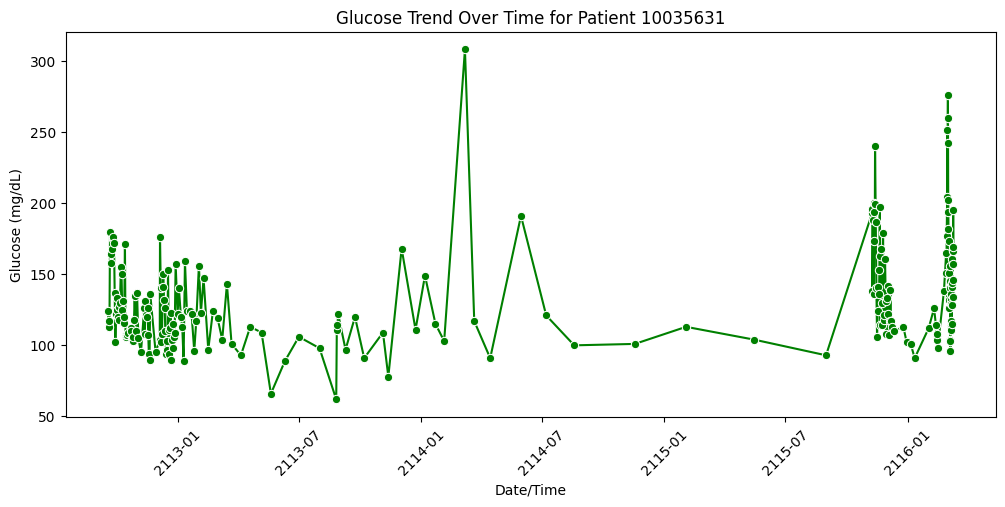

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=glucose_patient, x='charttime', y='valuenum', marker="o", color='green')
plt.title(f"Glucose Trend Over Time for Patient {patient_id}")
plt.xlabel("Date/Time")
plt.ylabel("Glucose (mg/dL)")
plt.xticks(rotation=45)
plt.show()
# Has diabetes or severe glucose dysregulation
# Experiences both hyperglycemia and hypoglycemia
# Has periods of extreme instability
# Requires close monitoring
# Needs insulin or medication adjustment
# Needs a strict diabetic diet
# This is exactly the type of trend you see in ICU diabetic patients.

In [ ]:
worst_patient = glucose_patients.idxmin()
worst_patient
#it will give the maximum number of glucouse tests takem by the patent whose id 


np.int64(10019917)

In [ ]:
patient_id = worst_patient
#patient_id : 10019917 now become this 
glucose_patient = glucose_labs[glucose_labs['subject_id'] == patient_id].copy()
# Select all glucose rows belonging to this patient.”
# ALL glucose tests
# ALL timestamps
# ALL values
glucose_patient['charttime'] = pd.to_datetime(glucose_patient['charttime'])
# Convert charttime into proper datetime format
# "2148-08-16 00:00:00"  converts to   datetime(2148, 8, 16)
glucose_patient = glucose_patient.sort_values('charttime')
# Arrange the glucose tests in order from earliest to latest.”

In [ ]:
glucose_patient = glucose_labs[glucose_labs['subject_id'] == patient_id].copy()
glucose_patient
# charttime:
# # “When the patient’s blood sample was collected.”
# storetime:
# “When the result was entered into the hospital database.”

labevent_id  subject_id     hadm_id  specimen_id  itemid  \
101556       240126    10019917  22585261.0     32893819   50931   
104921       240092    10019917  22585261.0     10107948   50931   

       order_provider_id            charttime            storetime value  \
101556               NaN  2182-01-09 05:55:00  2182-01-09 07:18:00   ___   
104921               NaN  2182-01-08 03:57:00  2182-01-08 04:54:00   ___   

        valuenum valueuom  ref_range_lower  ref_range_upper      flag  \
101556      93.0    mg/dL             70.0            100.0       NaN   
104921     110.0    mg/dL             70.0            100.0  abnormal   

       priority                                           comments    label  
101556     STAT  IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI...  Glucose  
104921     STAT  IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI...  Glucose

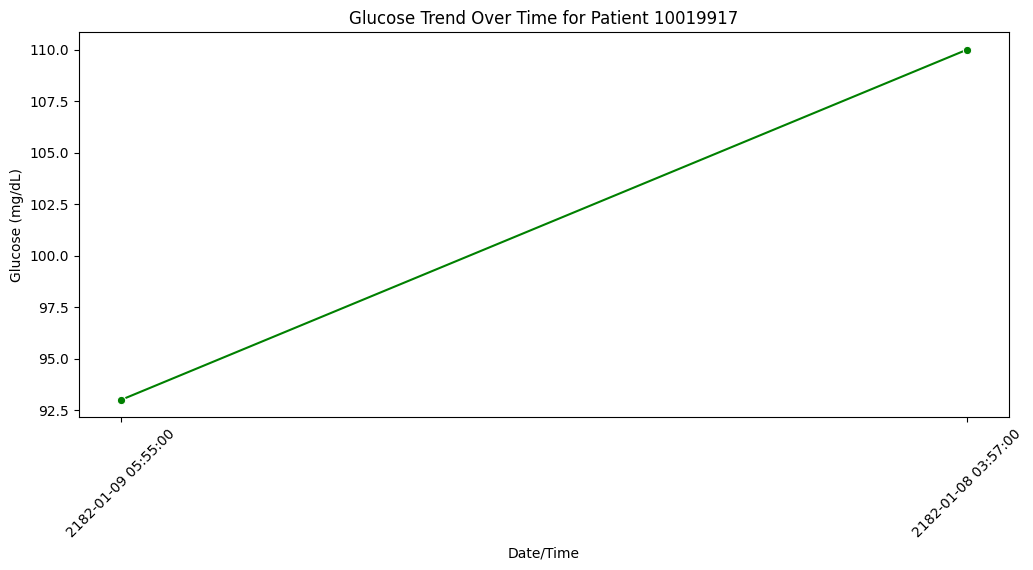

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=glucose_patient, x='charttime', y='valuenum', marker="o", color='green')
plt.title(f"Glucose Trend Over Time for Patient {patient_id}")
plt.xlabel("Date/Time")
plt.ylabel("Glucose (mg/dL)")
plt.xticks(rotation=45)
plt.show()
# The patient’s glucose decreased over time
# ✔ This is a healthy improvement
# ✔ Glucose moved from borderline-high → normal
# ✔ No sign of diabetes
# ✔ No hypoglycemia (not too low)

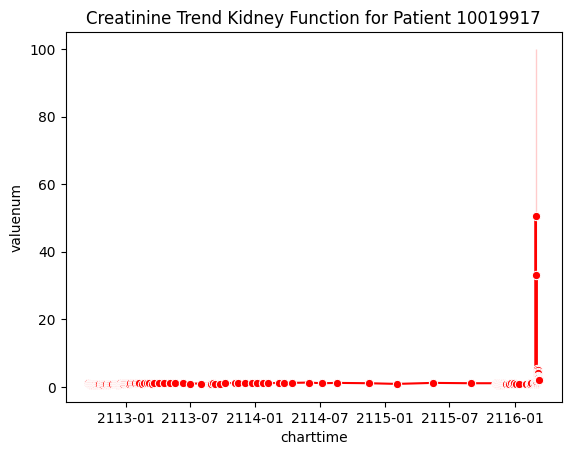

In [ ]:
creatinine = labs_useful[labs_useful['label'].str.contains("creatinine", case=False)]
# creatinine = how well your kidneys are working
# Normal creatinine range:
# 0.6 – 1.3 mg/dL
# If creatinine goes above 2 → kidney stress
# Above 5 → kidney failure
# Above 10 → severe kidney failure
cre_pat = creatinine[creatinine['subject_id'] == 10035631].copy()
cre_pat['charttime'] = pd.to_datetime(cre_pat['charttime'])
sns.lineplot(data=cre_pat, x='charttime', y='valuenum', marker="o", color='red')
plt.title(f"Creatinine Trend Kidney Function for Patient {patient_id}")
plt.show()
# For most of the timeline (2113–2115):
# Creatinine values are between 0 and 2 mg/dL
# This is NORMAL or slightly low.

# At the end of the graph (around 2116):
# Creatinine jumps to:
# 30 mg/dL
# 40 mg/dL
# 100 mg/dL (very high)
# This is NOT normal at all.
# These values are extremely high and medically alarming.

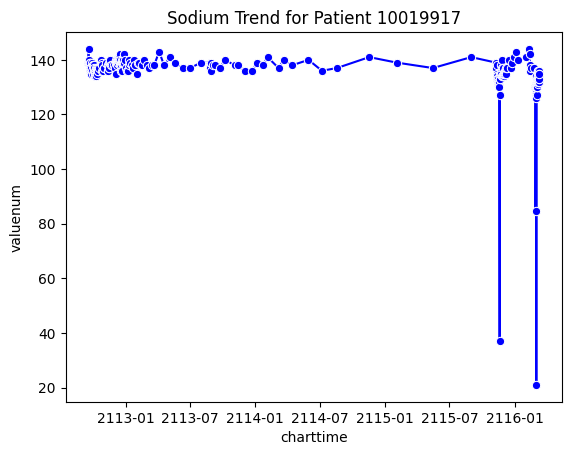

In [ ]:
# First, what is Sodium (Na⁺)?
# Normal sodium level in blood:
# 135–145 mEq/L
from traitlets import This


sodium = labs_useful[labs_useful['label'].str.contains("sodium", case=False)]
na_pat = sodium[sodium['subject_id'] == 10035631].copy()
na_pat['charttime'] = pd.to_datetime(na_pat['charttime'])
sns.lineplot(data=na_pat, x='charttime', y='valuenum', marker="o", color='blue')
plt.title(f"Sodium Trend for Patient {patient_id}")
plt.show()
# PATTERN 1 — NORMAL SODIUM RANGE MOST OF THE TIME (135–145)
# For most of the timeline (2113–2115):
# Sodium stays between 135–145
# This is EXACTLY the normal human sodium range
# So during this long period, the patient had:
# ✔ Normal kidney regulation
# ✔ No dehydration
# ✔ No major electrolyte disturbance
# ✔ Stable ICU condition
# This is good.

# PATTERN 2 — EXTREME SODIUM DROPS AT THE END (20–40 mEq/L) 😳
# At the end of the graph (2116):
# You see values like:
# 37 mEq/L
# 21 mEq/L
# 85 mEq/L (still low)
# These values are NOT compatible with life.

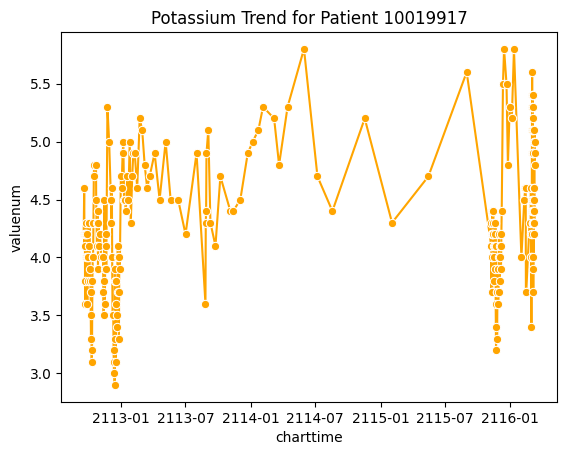

In [ ]:
# What is Potassium (K⁺)?
# Normal potassium range:
# 3.5 – 5.0 mEq/L
# Potassium is critical for:
# Heart beats
# Muscle contractions
# Nerve signals
# Kidney function
potassium = labs_useful[labs_useful['label'].str.contains("potassium", case=False)]
k_pat = potassium[potassium['subject_id'] == 10035631].copy()
k_pat['charttime'] = pd.to_datetime(k_pat['charttime'])

sns.lineplot(data=k_pat, x='charttime', y='valuenum', marker="o", color='orange')
plt.title(f"Potassium Trend for Patient {patient_id}")
plt.show()
# PHASE 1 — Potassium 3.0–5.2 (Mostly Normal Range)
# During the early period (2113–2114):
# Values range 3.0 to 5.2
# This is mostly normal
# Occasional dips to <3.5 = mild hypokalemia
# Occasional rises to >5.0 = mild hyperkalemia
# This is common in ICU patients.
# Medical meaning:
# ✔ Electrolytes are mostly controlled
# ✔ Some fluctuations due to medications, IV fluids, kidney function
# ✔ Nothing dangerously abnormal yet

# PHASE 2 — Potassium rising
# 5.3
# 5.4
# 5.6
# 5.7
# This is hyperkalemia, which is dangerous.
# Overalll
# Periods of NORMAL potassium
# ✔ Episodes of hyperkalemia (5.5–5.7)
# ✔ Episodes of hypokalemia (~3.0)

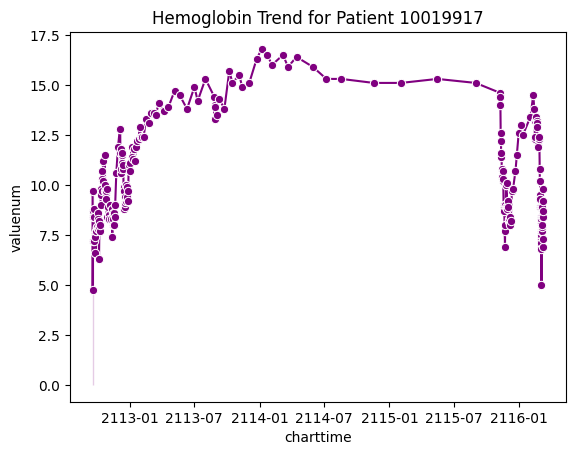

In [ ]:
hb = labs_useful[labs_useful['label'].str.contains("hemoglobin", case=False)]
hb_pat = hb[hb['subject_id'] == 10035631].copy()
hb_pat['charttime'] = pd.to_datetime(hb_pat['charttime'])

sns.lineplot(data=hb_pat, x='charttime', y='valuenum', marker="o", color='purple')
plt.title(f"Hemoglobin Trend for Patient {patient_id}")
plt.show()

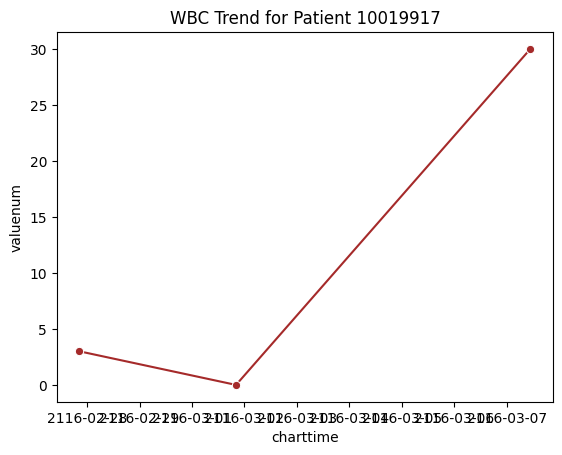

In [ ]:
wbc = labs_useful[labs_useful['label'].str.contains("wbc", case=False)]
wbc_pat = wbc[wbc['subject_id'] == 10035631].copy()
wbc_pat['charttime'] = pd.to_datetime(wbc_pat['charttime'])
# What is WBC?
# WBC = White Blood Cell count
# White blood cells are the cells your body uses to fight infection.
sns.lineplot(data=wbc_pat, x='charttime', y='valuenum', marker="o", color='brown')
plt.title(f"WBC Trend for Patient {patient_id}")
plt.show()
# Normal WBC Range
# Normal WBC count in adults:
# 4,000 – 11,000 cells/µL
# Often written as:
# # 4.0 – 11.0 (×10³/µL)
# WBC = 15 → Mild infection
# WBC = 20 → Strong infection / sepsis risk
# WBC = 30+ → Very severe infection (possible sepsis)


In [ ]:
print("Glucose levels:", glucose_patient['valuenum'].tolist())
print("Creatinine levels:", cre_pat['valuenum'].tolist())
print("Sodium levels:", na_pat['valuenum'].tolist())
print("Potassium levels:", k_pat['valuenum'].tolist())
print("Hemoglobin levels:", hb_pat['valuenum'].tolist())
print("WBC levels:", wbc_pat['valuenum'].tolist())


Glucose levels: [93.0, 110.0]
Creatinine levels: [0.8, 1.0, 0.9, 0.7, 0.7, 1.0, 1.1, 2.2, 0.7, 0.9, 0.6, 0.7, 0.8, 1.0, 0.8, 1.1, 0.9, 1.0, 33.0, 1.0, 0.9, 0.8, 0.8, 1.0, 0.6, 0.8, 1.2, 1.1, 0.8, 0.9, 0.7, 0.8, 1.0, 0.7, 0.8, 0.8, 0.9, 0.9, 0.7, 1.0, 0.9, 1.0, 5.0, 0.8, 1.0, 0.9, 0.8, 0.8, 0.8, 0.9, 0.8, 0.9, 0.8, 0.9, 0.9, 1.2, 1.2, 1.0, 1.0, 0.9, 0.7, 0.8, 0.9, 0.8, 1.1, 1.0, 1.1, 0.8, 0.7, 0.7, 0.9, 1.1, 1.0, 0.8, 0.7, 0.9, 0.7, 1.1, 2.9, 4.4, 0.8, 0.9, 2.7, 0.8, 5.0, 1.2, 3.3, 0.8, 0.8, 1.0, 1.1, 1.2, 0.9, 1.2, 1.1, 0.8, 2.4, 0.7, 0.9, 0.8, 0.8, 0.9, 4.1, 0.7, 0.8, 0.8, 1.1, 4.6, 0.6, 0.8, 0.8, 1.1, 0.9, 0.8, 1.0, 0.9, 1.0, 1.2, 0.9, 0.9, 1.1, 1.1, 0.9, 0.8, 0.8, 100.0, 1.0, 1.2, 1.1, 0.8, 2.3, 1.0, 1.4, 5.3, 0.8, 1.0, 4.4, 1.1, 1.1, 0.9, 1.0, 0.7, 1.2, 1.0, 1.1, 0.8, 0.6, 1.0, 0.8, 1.0, 0.7, 0.8, 1.3, 0.7, 1.1, 1.1, 1.1, 2.1, 3.2, 0.9, 0.8, 1.3, 1.1, 1.0, 1.9, 1.1, 1.1, 1.1, 0.7, 1.1, 2.1, 1.0, 0.9, 1.2, 2.5, 1.3, 0.7, 1.2, 0.6, 0.8, 0.8, 0.9, 0.9, 0.9, 1.3, 1.1, 1.1, 1.1, 1.1, 1.

In [ ]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("E:/AI_NutriCare/Data/Raw/admissions.csv")
df

subject_id   hadm_id            admittime            dischtime  \
0      10004235  24181354  2196-02-24 14:38:00  2196-03-04 14:02:00   
1      10009628  25926192  2153-09-17 17:08:00  2153-09-25 13:20:00   
2      10018081  23983182  2134-08-18 02:02:00  2134-08-23 19:35:00   
3      10006053  22942076  2111-11-13 23:39:00  2111-11-15 17:20:00   
4      10031404  21606243  2113-08-04 18:46:00  2113-08-06 20:57:00   
..          ...       ...                  ...                  ...   
270    10038992  24745425  2187-07-29 01:05:00  2187-08-03 17:02:00   
271    10008287  22168393  2145-09-28 01:17:00  2145-10-02 13:35:00   
272    10022880  27708593  2177-03-12 07:15:00  2177-03-19 14:25:00   
273    10004457  23251352  2141-12-17 11:00:00  2141-12-21 15:56:00   
274    10004457  28108313  2147-12-19 00:00:00  2147-12-21 16:10:00   

               deathtime               admission_type admit_provider_id  \
0                    NaN                       URGENT            P03YMR   
1                    NaN                       URGENT            P41R5N   
2                    NaN                       URGENT            P233F6   
3    2111-11-15 17:20:00                       URGENT            P38TI6   
4                    NaN                       URGENT            P07HDB   
..                   ...                          ...               ...   
270                  NaN  SURGICAL SAME DAY ADMISSION            P41R5N   
271                  NaN  SURGICAL SAME DAY ADMISSION            P898NM   
272                  NaN  SURGICAL SAME DAY ADMISSION            P99698   
273                  NaN  SURGICAL SAME DAY ADMISSION            P41R5N   
274                  NaN  SURGICAL SAME DAY ADMISSION            P10WWR   

         admission_location        discharge_location insurance language  \
0    TRANSFER FROM HOSPITAL  SKILLED NURSING FACILITY  Medicaid  ENGLISH   
1    TRANSFER FROM HOSPITAL          HOME HEALTH CARE  Medicaid        ?   
2    TRANSFER FROM HOSPITAL  SKILLED NURSING FACILITY  Medicare  ENGLISH   
3    TRANSFER FROM HOSPITAL                      DIED  Medicaid  ENGLISH   
4    TRANSFER FROM HOSPITAL                      HOME     Other  ENGLISH   
..                      ...                       ...       ...      ...   
270      PHYSICIAN REFERRAL  SKILLED NURSING FACILITY  Medicare  ENGLISH   
271      PHYSICIAN REFERRAL          HOME HEALTH CARE     Other  ENGLISH   
272      PHYSICIAN REFERRAL                      HOME  Medicare  ENGLISH   
273      PHYSICIAN REFERRAL                     REHAB  Medicare  ENGLISH   
274      PHYSICIAN REFERRAL  SKILLED NURSING FACILITY  Medicare  ENGLISH   

    marital_status                            race            edregtime  \
0           SINGLE              BLACK/CAPE VERDEAN  2196-02-24 12:15:00   
1          MARRIED  HISPANIC/LATINO - PUERTO RICAN                  NaN   
2          MARRIED                           WHITE  2134-08-17 16:24:00   
3              NaN                         UNKNOWN                  NaN   
4          WIDOWED                           WHITE                  NaN   
..             ...                             ...                  ...   
270        MARRIED                           WHITE                  NaN   
271         SINGLE                           WHITE                  NaN   
272        MARRIED                           WHITE                  NaN   
273         SINGLE                           OTHER                  NaN   
274       DIVORCED                           WHITE                  NaN   

               edouttime  hospital_expire_flag  
0    2196-02-24 17:07:00                     0  
1                    NaN                     0  
2    2134-08-18 03:15:00                     0  
3                    NaN                     1  
4                    NaN                     0  
..                   ...                   ...  
270                  NaN                     0  
271                  NaN                     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject_id            275 non-null    int64 
 1   hadm_id               275 non-null    int64 
 2   admittime             275 non-null    object
 3   dischtime             275 non-null    object
 4   deathtime             15 non-null     object
 5   admission_type        275 non-null    object
 6   admit_provider_id     275 non-null    object
 7   admission_location    275 non-null    object
 8   discharge_location    233 non-null    object
 9   insurance             275 non-null    object
 10  language              275 non-null    object
 11  marital_status        263 non-null    object
 12  race                  275 non-null    object
 13  edregtime             182 non-null    object
 14  edouttime             182 non-null    object
 15  hospital_expire_flag  275 non-null    in

In [ ]:
df.isnull().sum()

subject_id                0
hadm_id                   0
admittime                 0
dischtime                 0
deathtime               260
admission_type            0
admit_provider_id         0
admission_location        0
discharge_location       42
insurance                 0
language                  0
marital_status           12
race                      0
edregtime                93
edouttime                93
hospital_expire_flag      0
dtype: int64

In [ ]:
df["deathtime"].dtypes

dtype('O')

In [ ]:
df["admittime"]=pd.to_datetime(df["admittime"])
df["dischtime"]=pd.to_datetime(df["dischtime"])

In [ ]:
df["admittime"].dtypes

dtype('<M8[ns]')

In [ ]:
df['admission_type'].unique()

array(['URGENT', 'ELECTIVE', 'EW EMER.', 'DIRECT EMER.', 'EU OBSERVATION',
       'OBSERVATION ADMIT', 'DIRECT OBSERVATION',
       'AMBULATORY OBSERVATION', 'SURGICAL SAME DAY ADMISSION'],
      dtype=object)

C:\Users\admin\AppData\Local\Temp\ipykernel_22364\4204937959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='admission_type', palette='Blues')


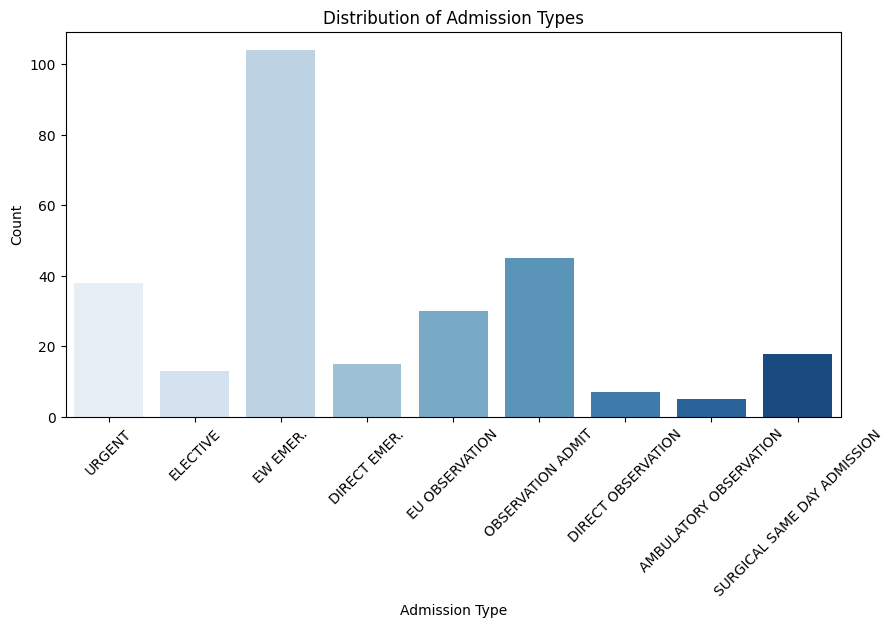

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='admission_type', palette='Blues')

plt.title("Distribution of Admission Types")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<!-- # # How many patients were admitted under each type of admission.
# # most common admission types 
# # for example if Most patients in the dataset came through emergency situations.
# # These patients are likely to have acute medical issues.
# # Very few planned surgeries or routine admissions.
# # we can fine the type of student how much are there 
# URGENT:-Semi-emergency, needs fast treatment
# elective:-Planned Admission, Scheduled procedure or surgery
# example :-Planned knee surgery -->
<!-- #EW EMER: Emergency Ward  EMER: Emergency :-this means the patient was admitted through Emergency Department, usually serious. -->
<!-- DIRECT EMER.:-Direct Emergency Admission":-
Patient came straight to emergency room, without referral or transfer.
Examples:
Someone coming directly by ambulance
Walk-in emergency cases -->
<!-- 
EU OBSERVATION:-EU = Emergency Unit
Meaning:
Patient admitted for short-term observation in Emergency Unit.
6. OBSERVATION ADMIT
Meaning:
Patient admitted for hospital observation only.
Not yet confirmed if they need full admission.
DIRECT OBSERVATION
Meaning:
Patient directly admitted to observation unit without emergency evaluation.
AMBULATORY OBSERVATION
Meaning:
Patient admitted for observation but still able to walk (not bedridden).
9. SURGICAL SAME DAY ADMISSION
Meaning:
Patient was admitted for a scheduled surgery on the same day. -->

C:\Users\admin\AppData\Local\Temp\ipykernel_22364\664981713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="hospital_expire_flag",palette='Set2')


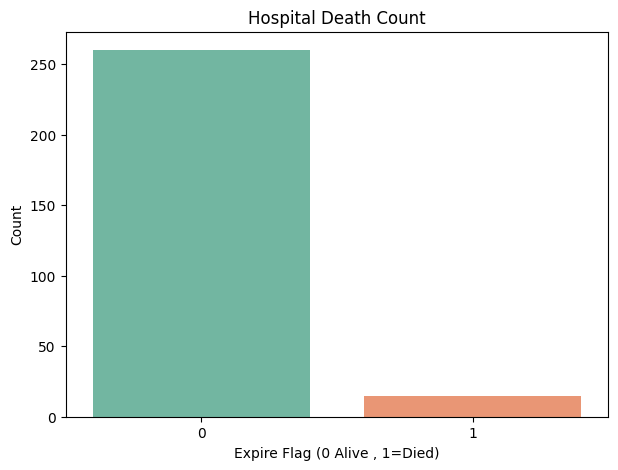

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x="hospital_expire_flag",palette='Set2')
plt.title("Hospital Death Count")
plt.xlabel("Expire Flag (0 Alive , 1=Died)")
plt.ylabel("Count")
plt.show()

In [ ]:
# Chacking for the how much is alive and how much has been died

C:\Users\admin\AppData\Local\Temp\ipykernel_22364\152681724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="year",palette="viridis")


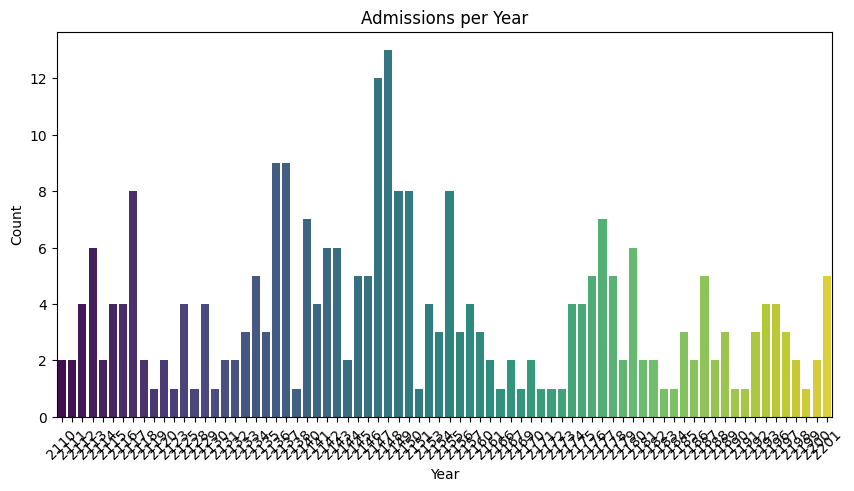

In [ ]:
df["year"]=df["admittime"].dt.year
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="year",palette="viridis")
plt.title("Admissions per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# They are artificial years created to protect privacy.

In [ ]:
df['year'] = df['admittime'].dt.year
df['year'].min(), df['year'].max()


(np.int32(2110), np.int32(2201))

C:\Users\admin\AppData\Local\Temp\ipykernel_22364\46568518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='race', palette='coolwarm')


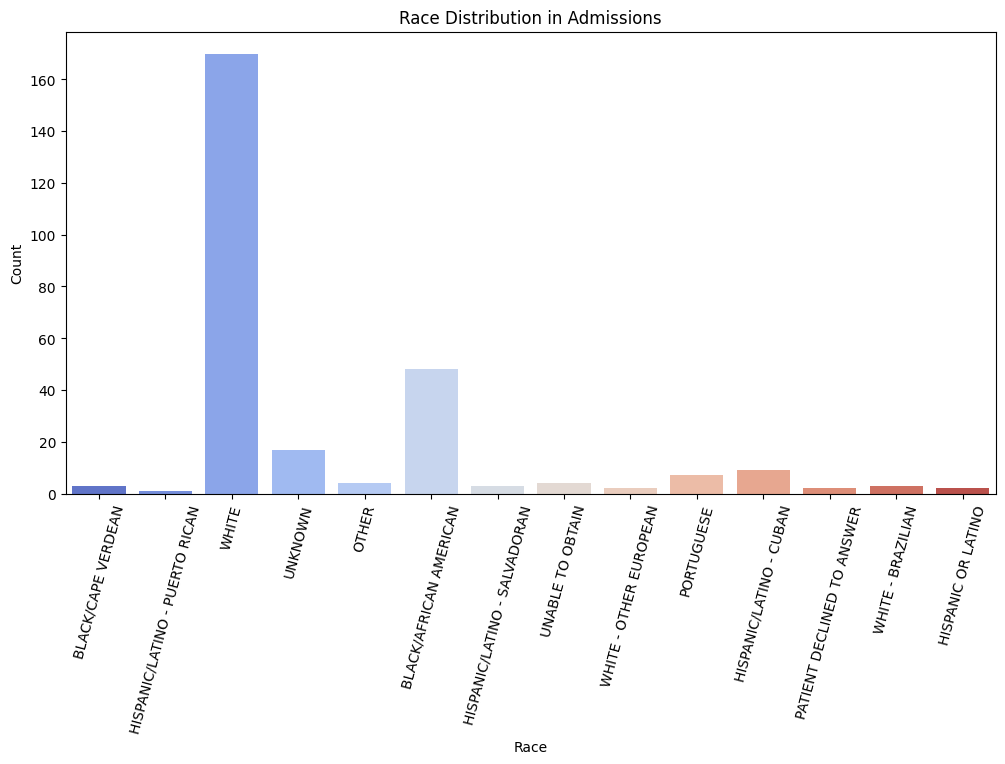

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='race', palette='coolwarm')

plt.title("Race Distribution in Admissions")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()


In [ ]:
df["race"].unique()

array(['BLACK/CAPE VERDEAN', 'HISPANIC/LATINO - PUERTO RICAN', 'WHITE',
       'UNKNOWN', 'OTHER', 'BLACK/AFRICAN AMERICAN',
       'HISPANIC/LATINO - SALVADORAN', 'UNABLE TO OBTAIN',
       'WHITE - OTHER EUROPEAN', 'PORTUGUESE', 'HISPANIC/LATINO - CUBAN',
       'PATIENT DECLINED TO ANSWER', 'WHITE - BRAZILIAN',
       'HISPANIC OR LATINO'], dtype=object)

In [ ]:
# How many patients belong to each race category in your admissions dataset.

C:\Users\admin\AppData\Local\Temp\ipykernel_22364\1465763822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='marital_status', palette='magma')


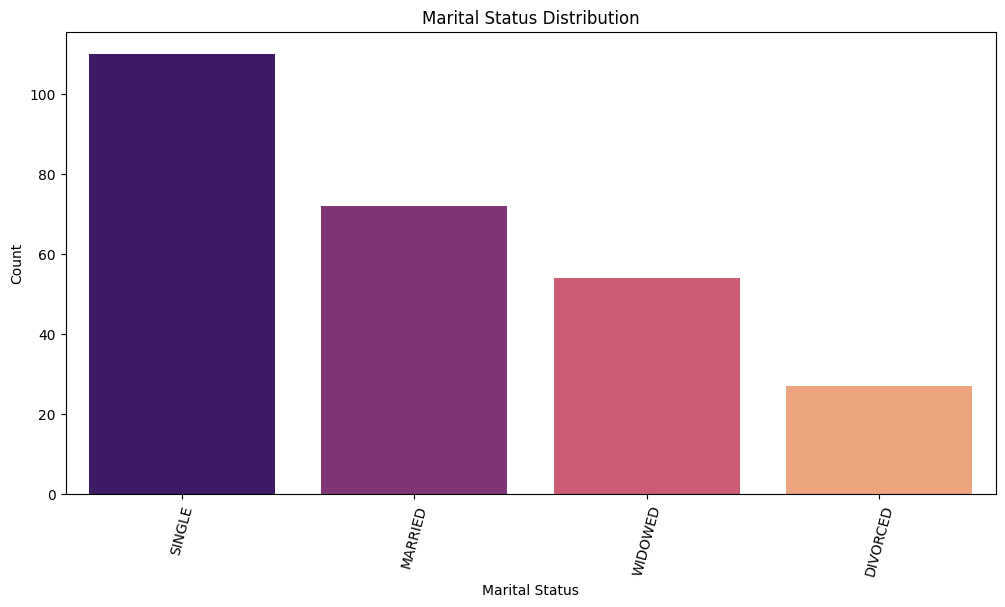

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='marital_status', palette='magma')

plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()


In [ ]:
#widowed:-the person whose husband or wife has died and who has not married again 

C:\Users\admin\AppData\Local\Temp\ipykernel_22364\727671923.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='admission_location', palette='Set3')


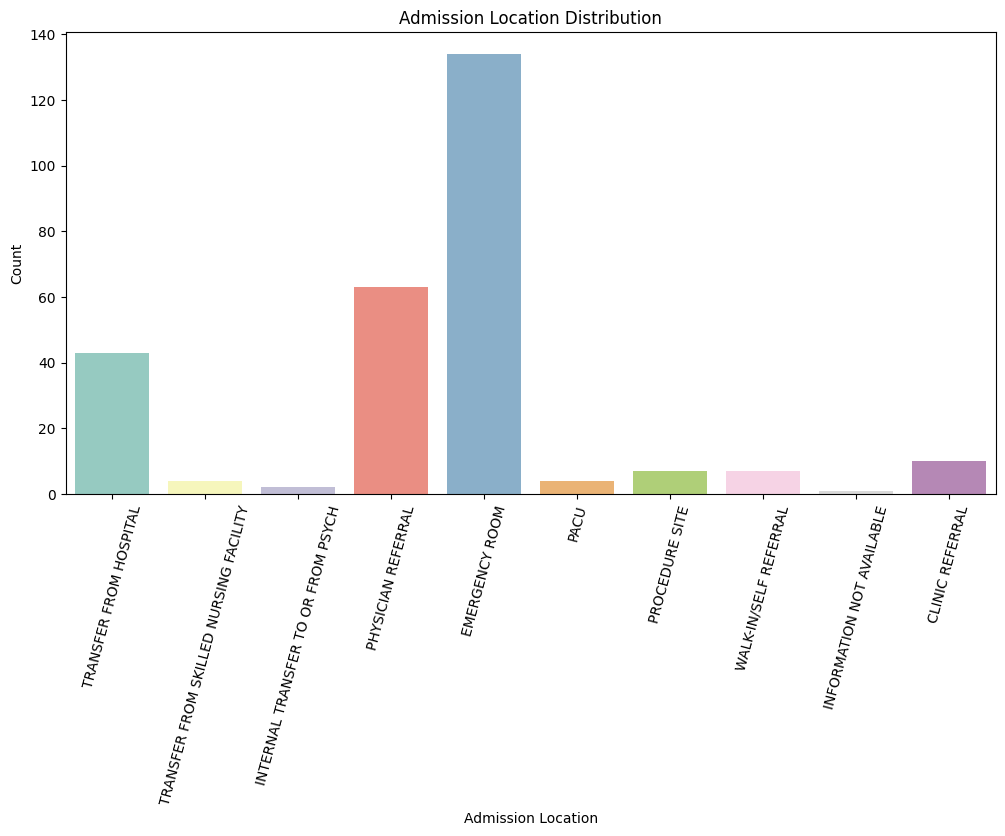

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='admission_location', palette='Set3')

plt.title("Admission Location Distribution")
plt.xlabel("Admission Location")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_22364\1650742544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='discharge_location', palette='cividis')


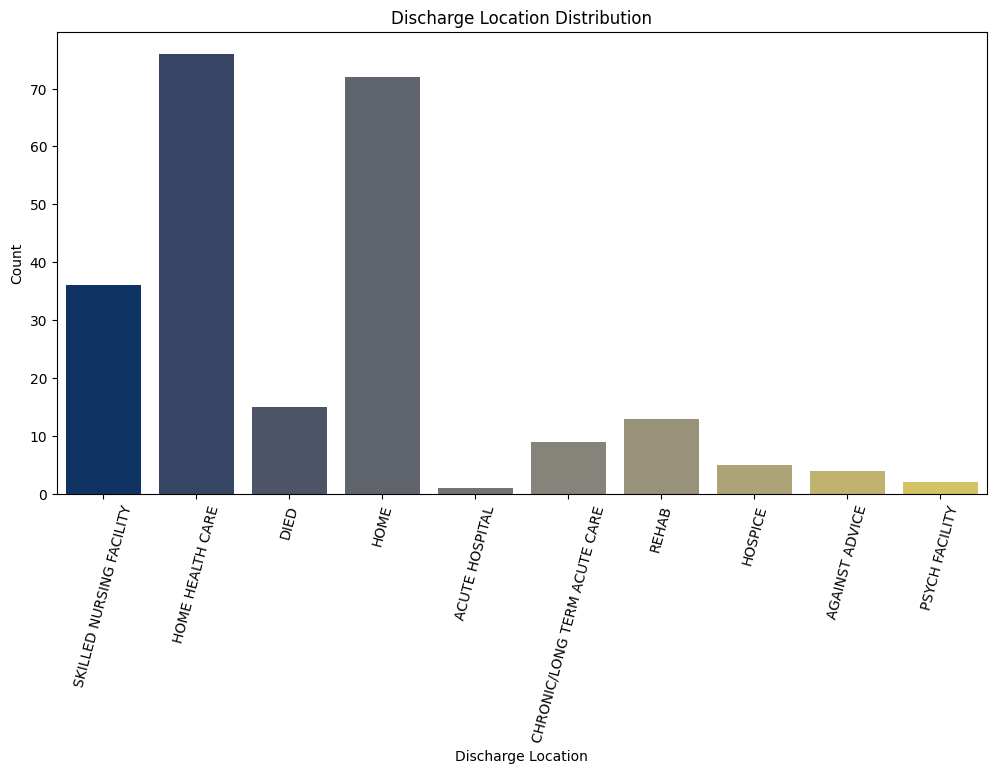

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='discharge_location', palette='cividis')

plt.title("Discharge Location Distribution")
plt.xlabel("Discharge Location")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()


In [ ]:
# Psych: metal helth
# Acute hospital : urgent medical care 
# rehab:-regabilitation A place where people go to cover heal or improve after physical and mental like drug addiction 
# Hospic: give comfirt care 

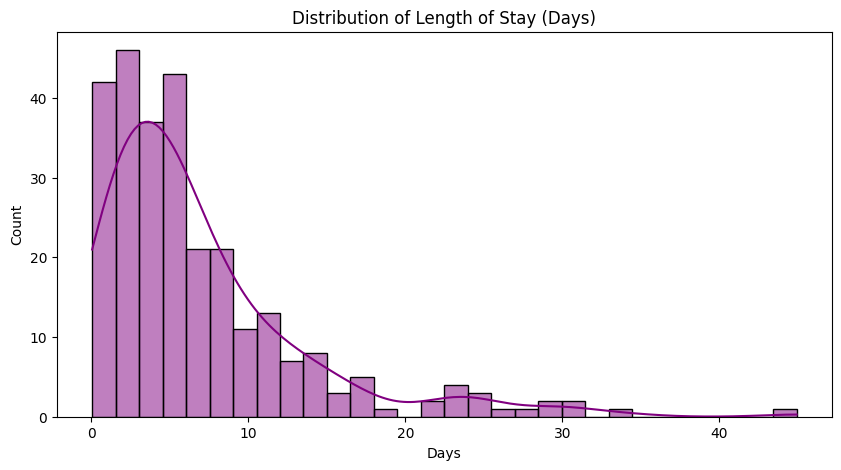

In [ ]:
df['los_days'] = (df['dischtime'] - df['admittime']).dt.total_seconds() / (3600*24)

plt.figure(figsize=(10,5))
sns.histplot(df['los_days'], bins=30, kde=True, color='purple')

plt.title("Distribution of Length of Stay (Days)")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv("E:/AI_NutriCare/Data/Raw/chartevents.csv")
df

subject_id   hadm_id   stay_id  caregiver_id            charttime  \
0         10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
1         10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
2         10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
3         10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
4         10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
...            ...       ...       ...           ...                  ...   
668857    10019003  29279905  34107647       60023.0  2153-03-28 10:49:28   
668858    10019003  29279905  34107647       60023.0  2153-03-28 10:49:28   
668859    10019003  29279905  34107647       60023.0  2153-03-28 10:49:28   
668860    10019003  29279905  34107647       60023.0  2153-03-28 10:49:28   
668861    10019003  29279905  34107647       60023.0  2153-03-28 10:49:28   

                  storetime  itemid  \
0       2132-12-15 23:45:00  225054   
1       2132-12-15 23:43:00  223769   
2       2132-12-15 23:47:00  223956   
3       2132-12-15 23:47:00  224866   
4       2132-12-15 23:45:00  227341   
...                     ...     ...   
668857                  NaN  220001   
668858                  NaN  220001   
668859                  NaN  220001   
668860                  NaN  220001   
668861                  NaN  220001   

                                                    value  valuenum valueuom  \
0                                                     On        NaN      NaN   
1                                                     100     100.0        %   
2                                           Atrial demand       NaN      NaN   
3                                                     Yes       NaN      NaN   
4                                                      No       0.0      NaN   
...                                                   ...       ...      ...   
668857                             .Care Plan - Infection       NaN      NaN   
668858                    Diabetes Mellitus (DM), Type II       NaN      NaN   
668859                                .Care Plan - Coping       NaN      NaN   
668860  Chronic obstructive pulmonary disease (COPD, B...       NaN      NaN   
668861  .Care Plan - Alteration in Bowel Elimination: ...       NaN      NaN   

        warning  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
668857      NaN  
668858      NaN  
668859      NaN  
668860      NaN  
668861      NaN  

[668862 rows x 11 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668862 entries, 0 to 668861
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   subject_id    668862 non-null  int64  
 1   hadm_id       668862 non-null  int64  
 2   stay_id       668862 non-null  int64  
 3   caregiver_id  644622 non-null  float64
 4   charttime     668862 non-null  object 
 5   storetime     667703 non-null  object 
 6   itemid        668862 non-null  int64  
 7   value         648132 non-null  object 
 8   valuenum      257474 non-null  float64
 9   valueuom      162571 non-null  object 
 10  warning       667703 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 56.1+ MB


In [ ]:
d_items = pd.read_csv("E:/AI_NutriCare/Data/Raw/d_items.csv")
d_items

itemid                                    label  \
0     226228                                   Gender   
1     226545                                     Race   
2     229877                      Suction events (CH)   
3     229875                  Oxygenator visible (CH)   
4     229266  Cannula sites visually inspected (ECMO)   
...      ...                                      ...   
4009  227452                      Tobramycin (Trough)   
4010  227451                      Tobramycin (Random)   
4011  227457                           Platelet Count   
4012  227468                               Fibrinogen   
4013  227463                                 Cortisol   

                                 abbreviation      linksto category unitname  \
0                                      Gender  chartevents      ADT      NaN   
1                                        Race  chartevents      ADT      NaN   
2                         Suction events (CH)  chartevents     ECMO      NaN   
3                     Oxygenator visible (CH)  chartevents     ECMO      NaN   
4     Cannula sites visually inspected (ECMO)  chartevents     ECMO      NaN   
...                                       ...          ...      ...      ...   
4009                      Tobramycin (Trough)  chartevents     Labs      NaN   
4010                      Tobramycin (Random)  chartevents     Labs      NaN   
4011                           Platelet Count  chartevents     Labs      NaN   
4012                               Fibrinogen  chartevents     Labs      NaN   
4013                                 Cortisol  chartevents     Labs      NaN   

            param_type  lownormalvalue  highnormalvalue  
0                 Text             NaN              NaN  
1                 Text             NaN              NaN  
2                 Text             NaN              NaN  
3                 Text             NaN              NaN  
4                 Text             NaN              NaN  
...                ...             ...              ...  
4009  Numeric with tag             NaN              NaN  
4010  Numeric with tag             NaN              NaN  
4011  Numeric with tag             NaN              NaN  
4012  Numeric with tag             NaN              NaN  
4013  Numeric with tag             NaN              NaN  

[4014 rows x 9 columns]

In [ ]:
d_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   itemid           4014 non-null   int64  
 1   label            4014 non-null   object 
 2   abbreviation     4014 non-null   object 
 3   linksto          4014 non-null   object 
 4   category         4014 non-null   object 
 5   unitname         1108 non-null   object 
 6   param_type       4014 non-null   object 
 7   lownormalvalue   19 non-null     float64
 8   highnormalvalue  22 non-null     float64
dtypes: float64(2), int64(1), object(6)
memory usage: 282.4+ KB


In [ ]:
useful_items = d_items[d_items['label'].str.contains(
    "heart rate|blood pressure|systolic|diastolic|glucose|weight|height",
    case=False, na=False
)]
useful_ids = useful_items['itemid'].unique()
useful_ids
# We're searching for labels that contain ANY of these words:
# heart rate blood pressure systolic diastolic glucose weight height
# na=False :- Avoids errors if label is missing (NaN).
# This new DataFrame contains only the useful measurements you asked for.
# Example output:
# itemid	label
# 220045	Heart Rate
# 220179	Systolic BP
# 220181	Diastolic BP
# 220621	Glucose
# 226707	Weight
# 226512	Height
# useful_ids = useful_items['itemid'].unique()
# This takes only the itemid column and removes duplicates.


array([227539, 227854, 228692, 226742, 226740, 226741, 226537, 225664,
       220621, 220047, 220058, 220056, 223752, 220046, 227538, 227537,
       223751, 226707, 226846, 226730, 226531, 226512, 224639, 229669,
       229899, 229668, 228151, 229900, 228152, 220059, 220060, 226851,
       226852, 226853, 226850, 225309, 220052, 227242, 220180, 227243,
       220051, 220181, 220045, 225310, 224643, 220179, 220050, 224167,
       227016, 227015, 225124, 227978, 227976, 227979, 227977, 220395,
       228388])

In [ ]:
chartevents_useful = df[df['itemid'].isin(useful_ids)]
# useful_ids contains itemid numbers for:
# heart rate
# systolic BP
# diastolic BP
# glucose
# weight
# height
# ✔ isin(useful_ids) means:
# Keep ONLY the rows where itemid is one of those useful IDs.
chartevents_useful = chartevents_useful[chartevents_useful['valuenum'].notna()]
# valuenum is the numeric version of the value
# Example:
# value	valuenum
# "85"	85
# "120"	120
# "Normal"	NaN
# "High"	NaN

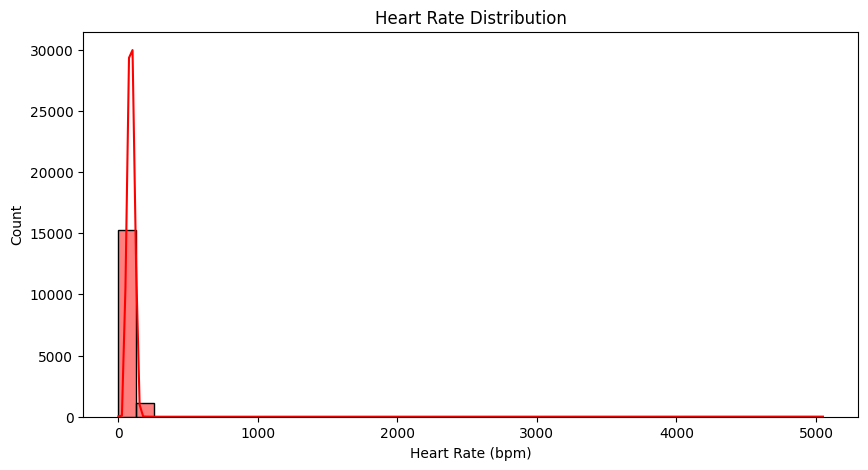

In [ ]:
heart_ids = useful_items[useful_items['label'].str.contains("heart rate", case=False)]['itemid']
# Meaning:
# Look inside d_items
# Find rows where the label includes the text “heart rate”
# Extract their itemid
# itemid = 220045  → Heart Rate
# So heart_ids becomes something like:
# [220045]
# This tells us which itemid in chartevents means Heart Rate.
heart = chartevents_useful[chartevents_useful['itemid'].isin(heart_ids)]
# From chartevents_useful, keep only rows where itemid = heart_ids.
# Now heart contains ONLY heart rate measurements.
# Example rows:
# subject_id	itemid	valuenum	time
# 10006	220045	85	2105-03-04
# 10006	220045	92	2105-03-04
# 10008	220045	66	2106-02-07
plt.figure(figsize=(10,5))
sns.histplot(heart['valuenum'], bins=40, kde=True, color='red')
plt.title("Heart Rate Distribution")
plt.xlabel("Heart Rate (bpm)")
plt.show()
# Peak of the graph = most common heart rate
# If the peak is around 70–90 bpm, it means most patients had normal heart rate.
# Left tail (low values)
# If values below 60 appear → bradycardia (low heart rate).
# Right tail (high values)
# If values above 100 → tachycardia (high heart rate).
# How many patients had normal HR
# How many had tachycardia
# How many had bradycardia

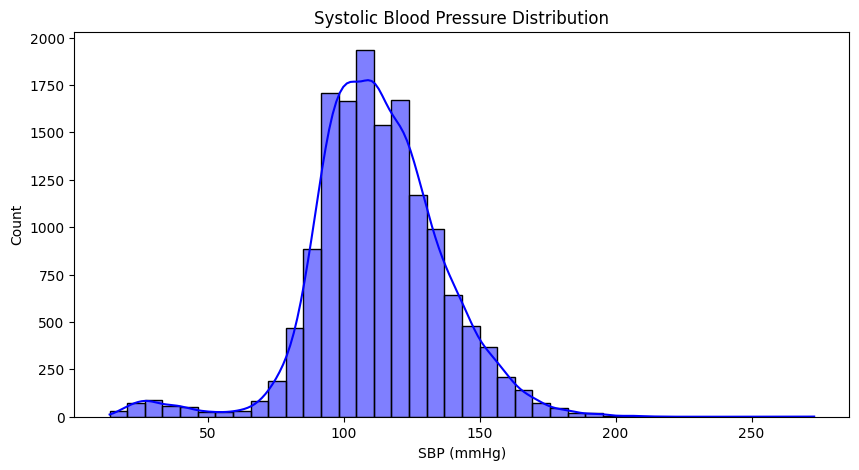

2167    229669
2177    229899
2186    228152
2370    220059
2454    226852
2462    226850
2563    225309
2571    227243
2584    220179
2586    220050
2591    224167
Name: itemid, dtype: int64

In [ ]:
sbp_ids = useful_items[useful_items['label'].str.contains("systolic", case=False)]['itemid']
sbp = chartevents_useful[chartevents_useful['itemid'].isin(sbp_ids)]
plt.figure(figsize=(10,5))
sns.histplot(sbp['valuenum'], bins=40, kde=True, color='blue')
plt.title("Systolic Blood Pressure Distribution")
plt.xlabel("SBP (mmHg)")
plt.show()
# X-axis → Systolic Blood Pressure (mmHg)
# ✔ Y-axis → Number of readings
# The graph helps you understand:
# What BP values are most common
# How wide the range is
# Whether many patients had high or low blood pressure

# NORMAL AND ABNORMAL RANGES
# Normal SBP: 90 – 120 mmHg
# Elevated: 120 – 130 mmHg
# Hypertension Stage 1: 130 – 140
# Hypertension Stage 2: 140+
# Very high (danger): > 180
sbp_ids

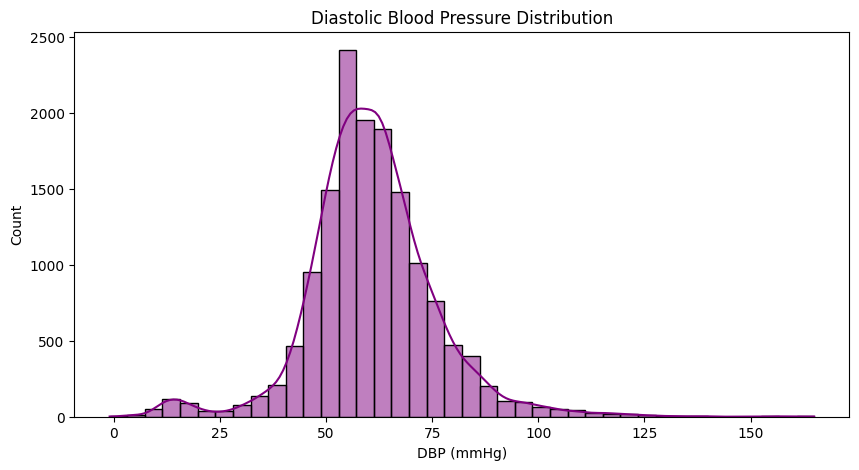

In [ ]:
dbp_ids = useful_items[useful_items['label'].str.contains("diastolic", case=False)]['itemid']
dbp = chartevents_useful[chartevents_useful['itemid'].isin(dbp_ids)]

plt.figure(figsize=(10,5))
sns.histplot(dbp['valuenum'], bins=40, kde=True, color='purple')
plt.title("Diastolic Blood Pressure Distribution")
plt.xlabel("DBP (mmHg)")
plt.show()


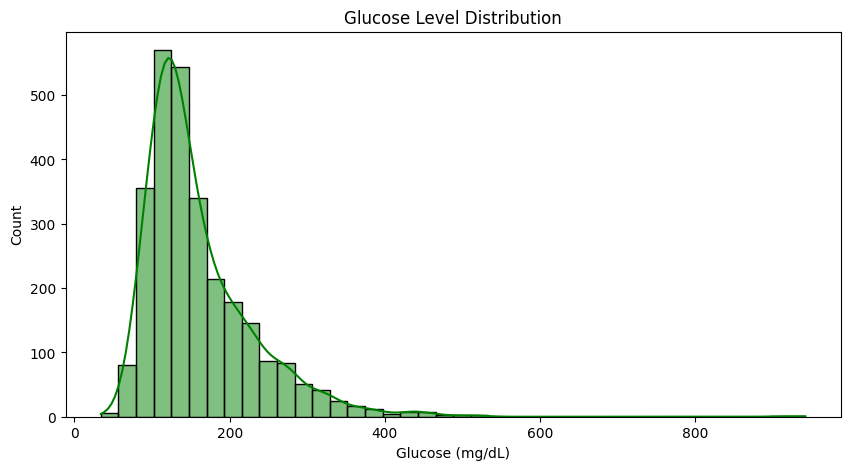

In [ ]:
glucose_ids = useful_items[useful_items['label'].str.contains("glucose", case=False)]['itemid']
glucose = chartevents_useful[chartevents_useful['itemid'].isin(glucose_ids)]

plt.figure(figsize=(10,5))
sns.histplot(glucose['valuenum'], bins=40, kde=True, color='green')
plt.title("Glucose Level Distribution")
plt.xlabel("Glucose (mg/dL)")
plt.show()


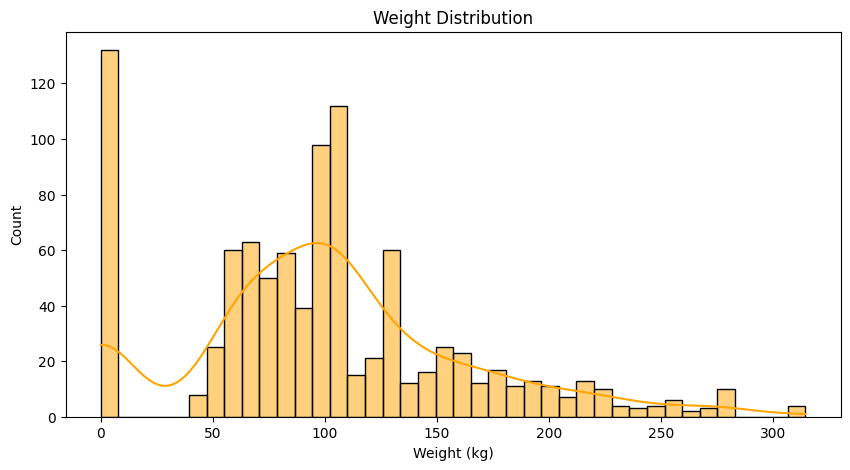

In [ ]:
weight_ids = useful_items[useful_items['label'].str.contains("weight", case=False)]['itemid']
weight = chartevents_useful[chartevents_useful['itemid'].isin(weight_ids)]

plt.figure(figsize=(10,5))
sns.histplot(weight['valuenum'], bins=40, kde=True, color='orange')
plt.title("Weight Distribution")
plt.xlabel("Weight (kg)")
plt.show()


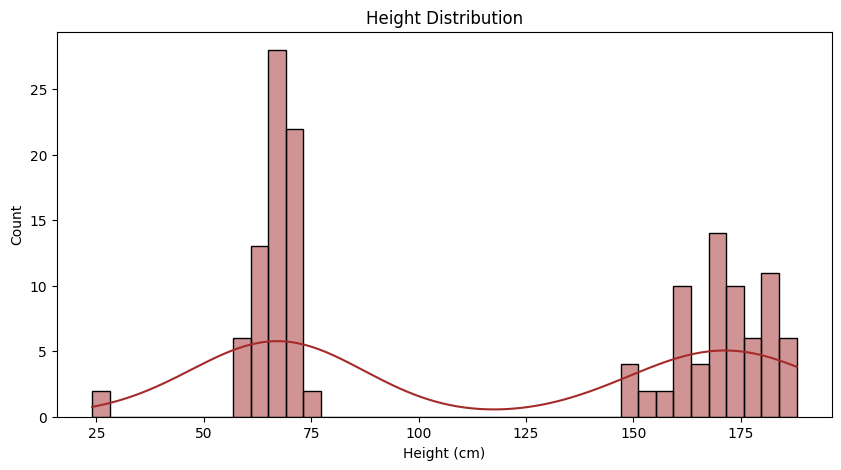

In [ ]:
height_ids = useful_items[useful_items['label'].str.contains("height", case=False)]['itemid']
height = chartevents_useful[chartevents_useful['itemid'].isin(height_ids)]

plt.figure(figsize=(10,5))
sns.histplot(height['valuenum'], bins=40, kde=True, color='brown')
plt.title("Height Distribution")
plt.xlabel("Height (cm)")
plt.show()


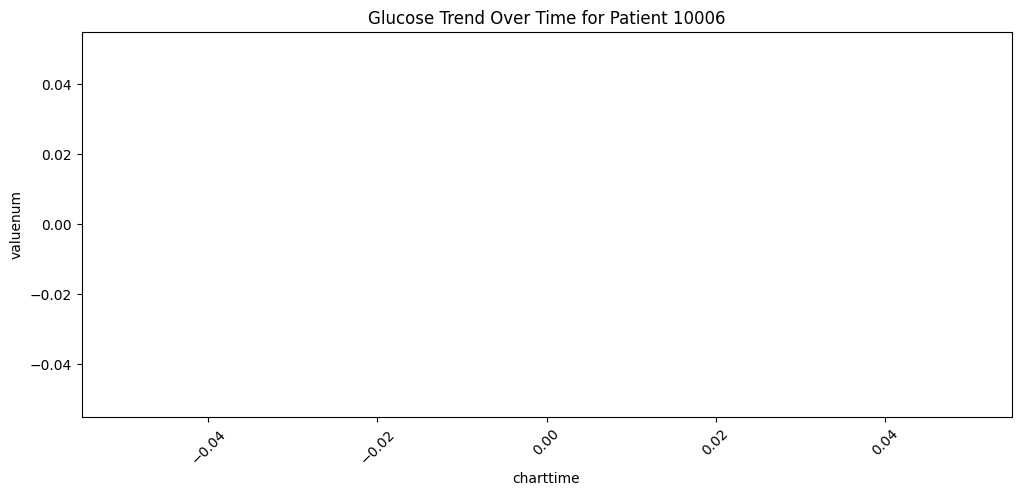

In [ ]:
patient_id = 10006
one_patient = glucose[glucose['subject_id'] == patient_id]

plt.figure(figsize=(12,5))
sns.lineplot(data=one_patient, x='charttime', y='valuenum')
plt.title(f"Glucose Trend Over Time for Patient {patient_id}")
plt.xticks(rotation=45)
plt.show()
# There is no glucose data available for this patient.

In [ ]:
icu=pd.read_csv("E:/AI_NutriCare/Data/Raw/icustays.csv")

In [ ]:
icu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject_id      140 non-null    int64  
 1   hadm_id         140 non-null    int64  
 2   stay_id         140 non-null    int64  
 3   first_careunit  140 non-null    object 
 4   last_careunit   140 non-null    object 
 5   intime          140 non-null    object 
 6   outtime         140 non-null    object 
 7   los             140 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 8.9+ KB


In [ ]:
icu['stay_id'].nunique()
icu['stay_id']

0      31269608
1      37509585
2      32554129
3      31338022
4      32145159
         ...   
135    33683112
136    35026312
137    30101877
138    39804682
139    37093652
Name: stay_id, Length: 140, dtype: int64

In [ ]:
icu['subject_id'].nunique()


100

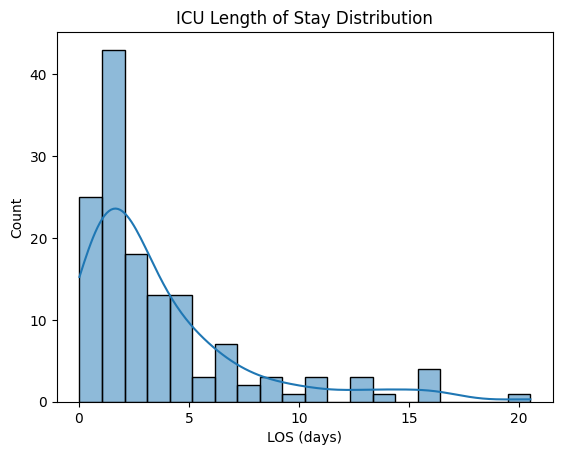

In [ ]:
sns.histplot(icu['los'], bins=20, kde=True)
plt.title("ICU Length of Stay Distribution")
plt.xlabel("LOS (days)")
plt.show()


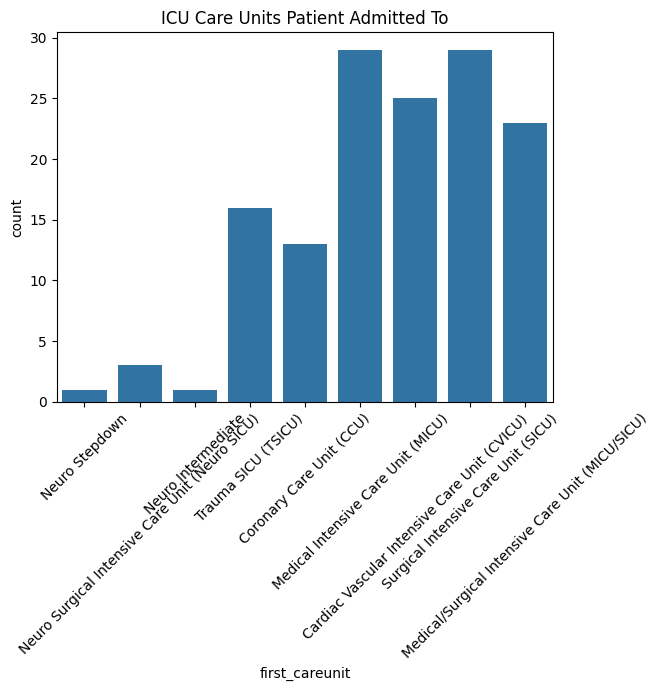

In [ ]:
sns.countplot(data=icu, x='first_careunit')
plt.xticks(rotation=45)
plt.title("ICU Care Units Patient Admitted To")
plt.show()


In [ ]:
pat_icu = icu[icu['subject_id'] == patient_id]
pat_icu


Empty DataFrame
Columns: [subject_id, hadm_id, stay_id, first_careunit, last_careunit, intime, outtime, los]
Index: []

In [ ]:
icu['subject_id'].nunique()
icu['subject_id'].unique()[:20]


array([10018328, 10020187, 10012853, 10020740, 10039708, 10020306,
       10019568, 10018081, 10010867, 10021487, 10003046, 10017492,
       10018501, 10008454, 10026354, 10029291, 10027445, 10010471,
       10023117, 10002495])

In [ ]:
patient_id = icu['subject_id'].iloc[0]
patient_id


np.int64(10018328)

In [ ]:
import numpy as np
patient_id = np.random.choice(icu['subject_id'].unique())
patient_id


np.int64(10019172)

In [ ]:
pat_icu = icu[icu['subject_id'] == patient_id]
pat_icu


subject_id   hadm_id   stay_id  \
91    10019172  24997044  32283063   

                                  first_careunit  \
91  Cardiac Vascular Intensive Care Unit (CVICU)   

                                   last_careunit               intime  \
91  Cardiac Vascular Intensive Care Unit (CVICU)  2118-11-16 09:38:22   

                outtime       los  
91  2118-11-19 20:34:51  3.455891

In [ ]:
stay_id = pat_icu['stay_id'].values[0]
stay_id


np.int64(32283063)

In [ ]:
chartevents = pd.read_csv("E:/AI_NutriCare/Data/Raw/chartevents.csv")
d_items = pd.read_csv("E:/AI_NutriCare/Data/Raw/d_items.csv")


In [ ]:
vital_keywords = [
    "heart rate",
    "blood pressure",
    "systolic",
    "diastolic",
    "map",
    "respiratory rate",
    "temperature",
    "o2 saturation",
    "spo2",
    "gcs"
]

vital_items = d_items[
    d_items['label'].str.contains("|".join(vital_keywords), case=False, na=False)
][['itemid', 'label']]
# "Find any label that contains ANY of these vital keywords."
# na=False
# Avoids errors if a label is missing (NaN).
# Keep only rows where the label contains a vital keyword
# like
# itemid	label
# 220045	Heart Rate
# 220050	Blood Pressure systolic
# 220051	Blood Pressure diastolic
# 220052	MAP
# 220210	Respiratory Rate
# 220277	Temperature Fahrenheit
# 220277	O2 Saturation Pulseoxymetry
# 220179	GCS Total
vital_items
# This converts the list into a regex OR expression:

itemid                            label
96    227539  ART Blood Pressure Alarm Source
415   224674           Changes in Temperature
621   223901             GCS - Motor Response
627   223900            GCS - Verbal Response
639   220739                GCS - Eye Opening
...      ...                              ...
2606  227024                MapScore_ApacheIV
2609  227013                GcsScore_ApacheIV
2633  227054            TemperatureF_ApacheIV
2636  227023                     MAP_ApacheIV
2890  229862    Forehead SpO2 Sensor in Place

[78 rows x 2 columns]

In [ ]:
vitals = chartevents[chartevents['itemid'].isin(vital_items['itemid'])]
vitals


subject_id   hadm_id   stay_id  caregiver_id            charttime  \
1         10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
11        10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
20        10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
36        10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
37        10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
...            ...       ...       ...           ...                  ...   
668742    10019003  29279905  34107647       68979.0  2153-03-28 02:57:00   
668743    10019003  29279905  34107647       68979.0  2153-03-28 02:57:00   
668744    10019003  29279905  34107647       68979.0  2153-03-28 02:57:00   
668745    10019003  29279905  34107647       68979.0  2153-03-28 02:57:00   
668747    10019003  29279905  34107647       34392.0  2153-03-30 17:57:00   

                  storetime  itemid value  valuenum  valueuom  warning  
1       2132-12-15 23:43:00  223769   100     100.0         %      0.0  
11      2132-12-15 23:41:00  220047    55      55.0       bpm      0.0  
20      2132-12-16 00:02:00  220060    12      12.0      mmHg      0.0  
36      2132-12-15 23:41:00  220046   120     120.0       bpm      0.0  
37      2132-12-16 00:02:00  220210    19      19.0  insp/min      0.0  
...                     ...     ...   ...       ...       ...      ...  
668742  2153-03-28 02:57:00  223761  97.8      97.8        °F      0.0  
668743  2153-03-28 02:57:00  220277    92      92.0         %      0.0  
668744  2153-03-28 02:57:00  220180    62      62.0      mmHg      0.0  
668745  2153-03-28 02:57:00  220179   118     118.0      mmHg      0.0  
668747  2153-03-30 17:58:00  224027  Warm       NaN       NaN      0.0  

[116424 rows x 11 columns]

In [ ]:
vitals = vitals.merge(vital_items, on="itemid", how="left")
# Join vitals with vital_items, matching rows where itemid is the same.

In [ ]:
vital_items.head()
vital_items.shape


(78, 2)

In [ ]:
vitals = vitals[vitals['valuenum'].notna()].copy()


In [ ]:
best_patient = vitals['subject_id'].value_counts().idxmax()
patient_id = best_patient


In [ ]:
pat_icu = icu[icu['subject_id'] == patient_id]
stay_id = pat_icu['stay_id'].values[0]


In [ ]:
pat_vitals = vitals[vitals['stay_id'] == stay_id].copy()
pat_vitals['charttime'] = pd.to_datetime(pat_vitals['charttime'])


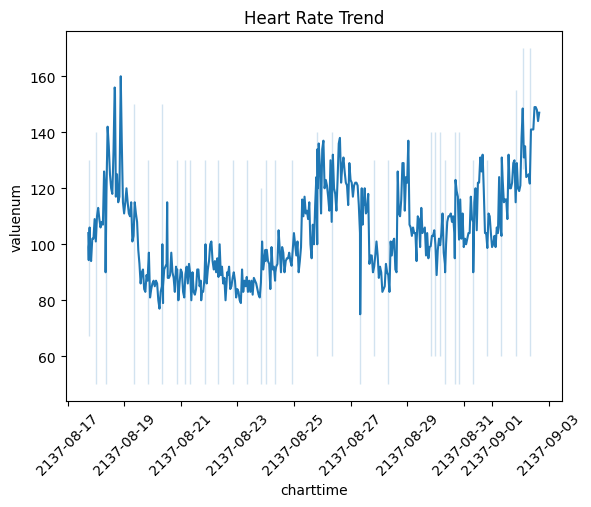

In [ ]:
hr = pat_vitals[pat_vitals['label'].str.contains("Heart Rate", case=False)]
sns.lineplot(data=hr, x='charttime', y='valuenum')
plt.title("Heart Rate Trend")
plt.xticks(rotation=45)
plt.show()


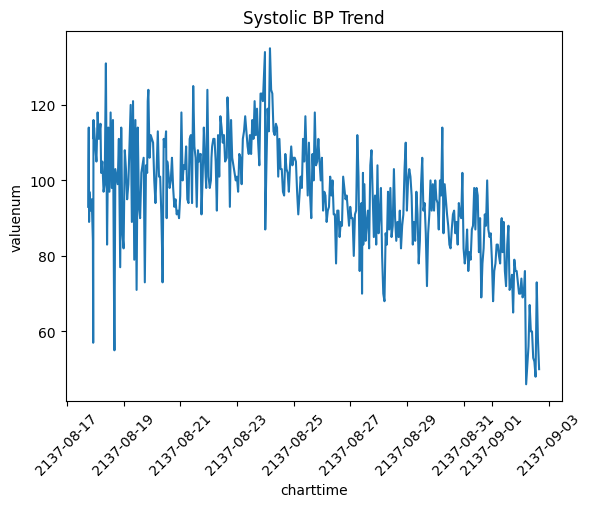

In [ ]:
sbp = pat_vitals[pat_vitals['label'].str.contains("systolic", case=False)]
sns.lineplot(data=sbp, x='charttime', y='valuenum')
plt.title("Systolic BP Trend")
plt.xticks(rotation=45)
plt.show()
# Normal: 110–120 mmHg
# Low (hypotension): < 90
# High (hypertension): > 140
# PHASE 1 — (Left side, Aug 17–19): High variability
# You see:
# Lots of spikes and dips
# Readings swinging between 60 and 130 mmHg

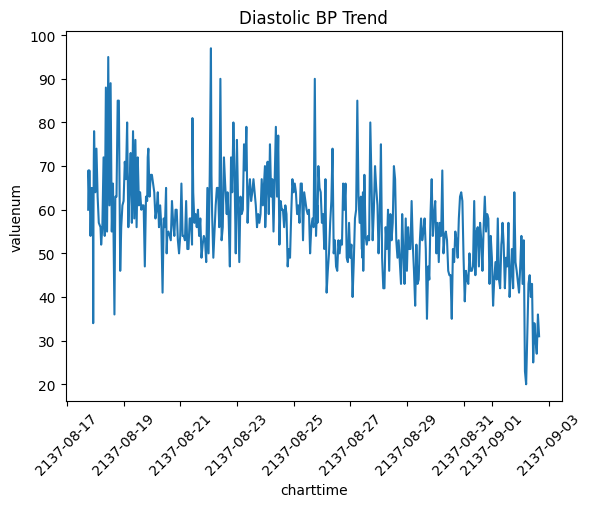

In [ ]:
dbp = pat_vitals[pat_vitals['label'].str.contains("diastolic", case=False)]
sns.lineplot(data=dbp, x='charttime', y='valuenum')
plt.title("Diastolic BP Trend")
plt.xticks(rotation=45)
plt.show()


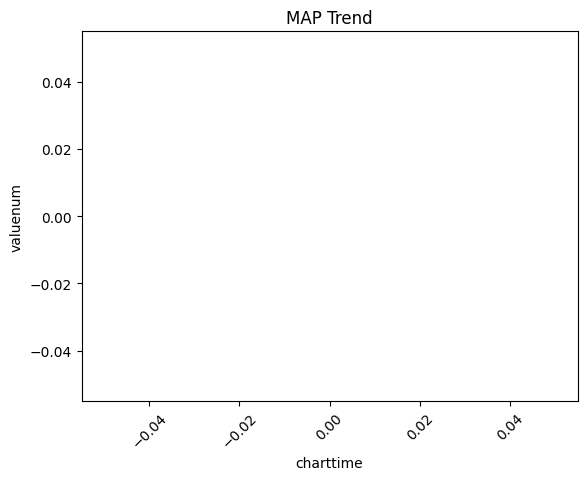

In [ ]:
map_bp = pat_vitals[pat_vitals['label'].str.contains("map", case=False)]
sns.lineplot(data=map_bp, x='charttime', y='valuenum')
plt.title("MAP Trend")
plt.xticks(rotation=45)
plt.show()


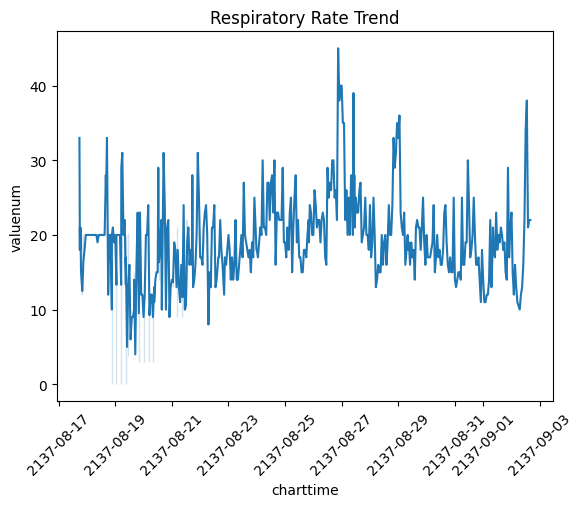

In [ ]:
rr = pat_vitals[pat_vitals['label'].str.contains("respiratory rate", case=False)]
sns.lineplot(data=rr, x='charttime', y='valuenum')
plt.title("Respiratory Rate Trend")
plt.xticks(rotation=45)
plt.show()


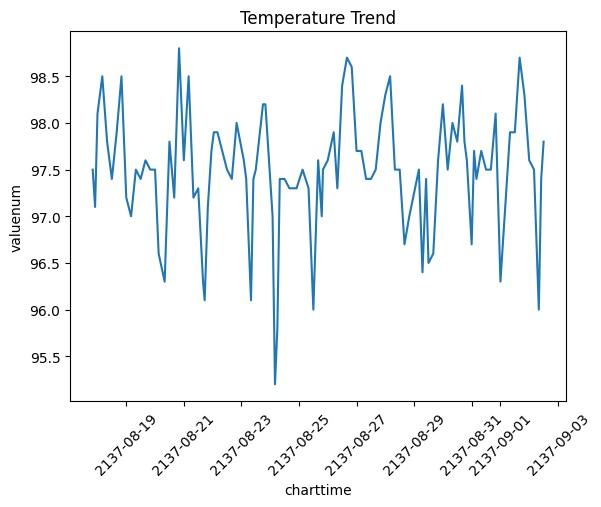

In [ ]:
temp = pat_vitals[pat_vitals['label'].str.contains("temperature", case=False)]
sns.lineplot(data=temp, x='charttime', y='valuenum')
plt.title("Temperature Trend")
plt.xticks(rotation=45)
plt.show()


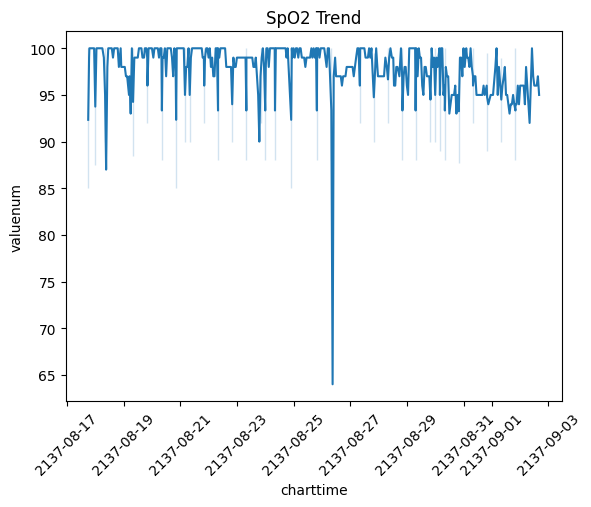

In [ ]:
spo2 = pat_vitals[pat_vitals['label'].str.contains("o2|spo2", case=False)]
sns.lineplot(data=spo2, x='charttime', y='valuenum')
plt.title("SpO2 Trend")
plt.xticks(rotation=45)
plt.show()
# SpO₂ = Oxygen Saturation
# It measures how much oxygen the blood is carrying.
# 95–100% → Normal
# 90–94% → Mild hypoxia
# < 90% → Hypoxia (dangerous)

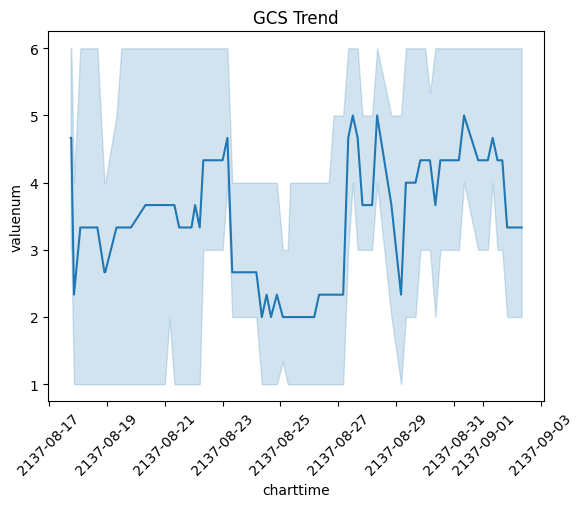

In [ ]:
gcs = pat_vitals[pat_vitals['label'].str.contains("gcs", case=False)]
sns.lineplot(data=gcs, x='charttime', y='valuenum')
plt.title("GCS Trend")
plt.xticks(rotation=45)
plt.show()
# Glasgow Coma Scale
# how conscious and neurologically responsive a patient is.
# GCS fluctuating between 2 and 5
# This indicates:
# Severe neurological impairment at times (score 2–3)
# Moderate improvement later (score 4–5)

# The shaded area represents the uncertainty or variability around the GCS trend line.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
inputevents=pd.read_csv("E:/AI_NutriCare/Data/Raw/inputevents.csv")
inputevents

subject_id   hadm_id   stay_id  caregiver_id            starttime  \
0        10005817  20626031  32604416          4793  2132-12-16 19:50:00   
1        10005817  20626031  32604416         92805  2132-12-15 20:15:00   
2        10005817  20626031  32604416         20310  2132-12-17 09:15:00   
3        10005817  20626031  32604416         79166  2132-12-16 09:36:00   
4        10005817  20626031  32604416         92805  2132-12-15 20:10:00   
...           ...       ...       ...           ...                  ...   
20399    10019003  29279905  34107647         88156  2153-03-29 20:58:00   
20400    10019003  29279905  34107647         83144  2153-03-30 00:00:00   
20401    10019003  29279905  34107647         68979  2153-03-28 02:57:00   
20402    10019003  29279905  34107647         68979  2153-03-28 06:05:00   
20403    10019003  29279905  34107647         68979  2153-03-28 04:48:00   

                   endtime            storetime  itemid    amount amountuom  \
0      2132-12-16 19:51:00  2132-12-16 19:50:00  225798  1.000000      dose   
1      2132-12-15 20:16:00  2132-12-15 20:11:00  225798  1.000000      dose   
2      2132-12-17 09:16:00  2132-12-17 09:28:00  225798  1.000000      dose   
3      2132-12-16 09:37:00  2132-12-16 09:37:00  225798  1.000000      dose   
4      2132-12-15 21:10:00  2132-12-15 20:10:00  221456  2.000000     grams   
...                    ...                  ...     ...       ...       ...   
20399  2153-03-29 20:59:00  2153-03-29 20:58:00  221385  0.500000        mg   
20400  2153-03-30 00:01:00  2153-03-30 01:24:00  221385  0.500000        mg   
20401  2153-03-28 04:48:00  2153-03-28 02:58:00  221906  0.319770        mg   
20402  2153-03-28 08:00:00  2153-03-28 06:11:00  221906  0.110377        mg   
20403  2153-03-28 06:05:00  2153-03-28 06:11:00  221906  0.147810        mg   

       ...                      ordercomponenttypedescription  \
0      ...                               Main order parameter   
1      ...                               Main order parameter   
2      ...                               Main order parameter   
3      ...                               Main order parameter   
4      ...  Additives                                     ...   
...    ...                                                ...   
20399  ...                               Main order parameter   
20400  ...                               Main order parameter   
20401  ...                               Main order parameter   
20402  ...                               Main order parameter   
20403  ...                               Main order parameter   

      ordercategorydescription  patientweight  totalamount totalamountuom  \
0                    Drug Push           91.0        500.0             ml   
1                    Drug Push           91.0        500.0             ml   
2                    Drug Push           91.0        500.0             ml   
3                    Drug Push           91.0        500.0             ml   
4                Continuous IV           91.0        100.0             ml   
...                        ...            ...          ...            ...   
20399                Drug Push           96.0          NaN            NaN   
20400                Drug Push           96.0          NaN            NaN   
20401           Continuous Med           96.0        250.0             ml   
20402           Continuous Med           96.0        250.0             ml   
20403           Continuous Med           96.0        250.0             ml   

      isopenbag continueinnextdept statusdescription  originalamount  \
0             0                  0   FinishedRunning        1.000000   
1             0                  0   FinishedRunning        1.000000   
2             0                  0   FinishedRunning        1.000000   
3             0                  0   FinishedRunning        1.000000   
4             0                  0   FinishedRunning        2.000000   
...    

In [ ]:
inputevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20404 entries, 0 to 20403
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   subject_id                     20404 non-null  int64  
 1   hadm_id                        20404 non-null  int64  
 2   stay_id                        20404 non-null  int64  
 3   caregiver_id                   20404 non-null  int64  
 4   starttime                      20404 non-null  object 
 5   endtime                        20404 non-null  object 
 6   storetime                      20404 non-null  object 
 7   itemid                         20404 non-null  int64  
 8   amount                         20404 non-null  float64
 9   amountuom                      20404 non-null  object 
 10  rate                           11038 non-null  float64
 11  rateuom                        11038 non-null  object 
 12  orderid                        20404 non-null 

In [ ]:
inputevents.isnull().sum()

subject_id                          0
hadm_id                             0
stay_id                             0
caregiver_id                        0
starttime                           0
endtime                             0
storetime                           0
itemid                              0
amount                              0
amountuom                           0
rate                             9366
rateuom                          9366
orderid                             0
linkorderid                         0
ordercategoryname                   0
secondaryordercategoryname       6260
ordercomponenttypedescription       0
ordercategorydescription            0
patientweight                       0
totalamount                      3314
totalamountuom                   3312
isopenbag                           0
continueinnextdept                  0
statusdescription                   0
originalamount                      0
originalrate                        0
dtype: int64

In [ ]:
# data
# itemid
# Code that maps to what was given:
# Insulin
# Potassium chloride
# Saline
# Dextrose (sugar fluid)
# Antibiotics
# Blood products
# amountuom
# Unit of measure
# (mL, mg, Units, mEq, etc.)

# rdercategoryname
# Type of order:
# IV fluids
# Medications
# Electrolytes
# Nutrition



In [ ]:
inputevents['ordercategoryname'].value_counts()


ordercategoryname
01-Drips                    8582
02-Fluids (Crystalloids)    2538
14-Oral/Gastric Intake      2180
05-Med Bolus                2171
08-Antibiotics (IV)         2108
06-Insulin (Non IV)          532
11-Prophylaxis (Non IV)      524
10-Prophylaxis (IV)          476
13-Enteral Nutrition         397
03-IV Fluid Bolus            314
07-Blood Products            232
04-Fluids (Colloids)         115
16-Pre Admission/Non-ICU     107
09-Antibiotics (Non IV)       85
12-Parenteral Nutrition       43
Name: count, dtype: int64

In [ ]:
d_items = pd.read_csv("E:/AI_NutriCare/Data/Raw/d_items.csv")
d_items

itemid                                    label  \
0     226228                                   Gender   
1     226545                                     Race   
2     229877                      Suction events (CH)   
3     229875                  Oxygenator visible (CH)   
4     229266  Cannula sites visually inspected (ECMO)   
...      ...                                      ...   
4009  227452                      Tobramycin (Trough)   
4010  227451                      Tobramycin (Random)   
4011  227457                           Platelet Count   
4012  227468                               Fibrinogen   
4013  227463                                 Cortisol   

                                 abbreviation      linksto category unitname  \
0                                      Gender  chartevents      ADT      NaN   
1                                        Race  chartevents      ADT      NaN   
2                         Suction events (CH)  chartevents     ECMO      NaN   
3                     Oxygenator visible (CH)  chartevents     ECMO      NaN   
4     Cannula sites visually inspected (ECMO)  chartevents     ECMO      NaN   
...                                       ...          ...      ...      ...   
4009                      Tobramycin (Trough)  chartevents     Labs      NaN   
4010                      Tobramycin (Random)  chartevents     Labs      NaN   
4011                           Platelet Count  chartevents     Labs      NaN   
4012                               Fibrinogen  chartevents     Labs      NaN   
4013                                 Cortisol  chartevents     Labs      NaN   

            param_type  lownormalvalue  highnormalvalue  
0                 Text             NaN              NaN  
1                 Text             NaN              NaN  
2                 Text             NaN              NaN  
3                 Text             NaN              NaN  
4                 Text             NaN              NaN  
...                ...             ...              ...  
4009  Numeric with tag             NaN              NaN  
4010  Numeric with tag             NaN              NaN  
4011  Numeric with tag             NaN              NaN  
4012  Numeric with tag             NaN              NaN  
4013  Numeric with tag             NaN              NaN  

[4014 rows x 9 columns]

In [ ]:
input_items = inputevents.merge(d_items[['itemid','label']], on='itemid', how='left')
input_items[['itemid','label']].head()


itemid              label
0  225798         Vancomycin
1  225798         Vancomycin
2  225798         Vancomycin
3  225798         Vancomycin
4  221456  Calcium Gluconate

In [ ]:
patient_id = input_items['subject_id'].sample(1).values[0]
patient_id


np.int64(10005909)

In [ ]:
top_patients = input_items['subject_id'].value_counts()
patient_id = top_patients.idxmax()
patient_id


np.int64(10039708)

In [ ]:
pat_inputs = input_items[input_items['subject_id'] == patient_id].copy()
pat_inputs.head()


subject_id   hadm_id   stay_id  caregiver_id            starttime  \
1097    10039708  24928679  37323533         46241  2143-09-20 03:47:00   
1098    10039708  24928679  37323533         61559  2143-09-20 14:00:00   
1099    10039708  24928679  37323533         61559  2143-09-20 08:00:00   
1100    10039708  24928679  37323533         46241  2143-09-19 21:18:00   
1101    10039708  24928679  37323533         61559  2143-09-20 08:00:00   

                  endtime            storetime  itemid      amount amountuom  \
1097  2143-09-20 03:48:00  2143-09-20 03:47:00  220952   25.000000        ml   
1098  2143-09-20 14:30:00  2143-09-20 15:30:00  225833  500.000026        mg   
1099  2143-09-20 08:30:00  2143-09-20 10:13:00  225833  500.000026        mg   
1100  2143-09-20 16:28:00  2143-09-19 21:18:00  225155  191.666683       mcg   
1101  2143-09-20 08:30:00  2143-09-20 10:13:00  225158  249.999990        ml   

      ...  ordercategorydescription patientweight  totalamount  \
1097  ...                 Drug Push          77.8          NaN   
1098  ...             Continuous IV          77.8        250.0   
1099  ...             Continuous IV          77.8        250.0   
1100  ...            Continuous Med          77.8        100.0   
1101  ...             Continuous IV          77.8        250.0   

      totalamountuom isopenbag continueinnextdept statusdescription  \
1097             NaN         0                  0   FinishedRunning   
1098              ml         0                  0   FinishedRunning   
1099              ml         0                  0   FinishedRunning   
1100              ml         0                  0           Stopped   
1101              ml         0                  0   FinishedRunning   

     originalamount  originalrate         label  
1097           25.0     25.000000  Dextrose 50%  
1098          500.0     16.666666      Thiamine  
1099          500.0     16.666666      Thiamine  
1100          500.0      9.999999    Octreotide  
1101          250.0    500.000000     NaCl 0.9%  

[5 rows x 27 columns]

In [ ]:
pat_inputs['starttime'] = pd.to_datetime(pat_inputs['starttime'])
pat_inputs['endtime'] = pd.to_datetime(pat_inputs['endtime'])


In [ ]:
iv_fluids = pat_inputs[pat_inputs['ordercategoryname'].str.contains("fluid", case=False, na=False)]
iv_fluids[['starttime','label','amount','amountuom']].head()


starttime      label      amount amountuom
1098 2143-09-20 14:00:00   Thiamine  500.000026        mg
1099 2143-09-20 08:00:00   Thiamine  500.000026        mg
1101 2143-09-20 08:00:00  NaCl 0.9%  249.999990        ml
1102 2143-09-20 04:57:00  NaCl 0.9%   57.583335        ml
1104 2143-09-20 14:00:00  NaCl 0.9%  249.999990        ml

In [ ]:
insulin = pat_inputs[pat_inputs['label'].str.contains("insulin", case=False, na=False)]
insulin[['starttime','amount','rate','label']].head()


starttime  amount  rate              label
3621 2140-01-30 08:22:00     2.0   NaN  Insulin - Humalog
3622 2140-01-25 08:11:00     4.0   NaN  Insulin - Humalog
3623 2140-01-29 12:25:00     2.0   NaN  Insulin - Humalog
3624 2140-02-07 12:32:00     2.0   NaN  Insulin - Humalog
3625 2140-01-30 12:32:00     2.0   NaN  Insulin - Humalog

In [ ]:
k_replace = pat_inputs[pat_inputs['label'].str.contains("potassium", case=False, na=False)]
k_replace[['starttime','amount','amountuom']].head()


starttime     amount amountuom
4050 2140-01-28 15:50:00  20.000001       mEq
4051 2140-01-23 23:15:00  20.000001       mEq
4052 2140-02-01 12:40:00  20.000001       mEq
4053 2140-01-23 21:00:00  20.000001       mEq
4054 2140-01-29 18:09:00  20.000001       mEq

In [ ]:
abx = pat_inputs[pat_inputs['ordercategoryname'].str.contains("antibiotic", case=False, na=False)]
abx[['starttime','label','amount']].head()


starttime       label  amount
3485 2140-01-26 08:00:00  Vancomycin     1.0
3486 2140-02-05 10:17:00  Vancomycin     1.0
3487 2140-02-06 08:50:00  Vancomycin     1.0
3488 2140-02-03 12:03:00  Vancomycin     1.0
3489 2140-01-27 08:53:00  Vancomycin     1.0

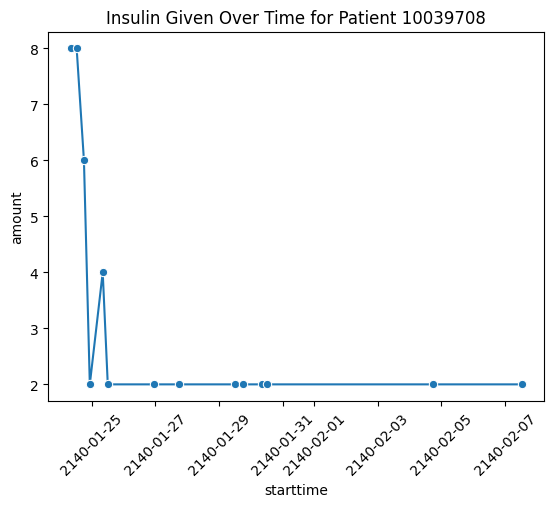

In [ ]:
sns.lineplot(data=insulin, x='starttime', y='amount', marker='o')
plt.title(f"Insulin Given Over Time for Patient {patient_id}")
plt.xticks(rotation=45)
plt.show()


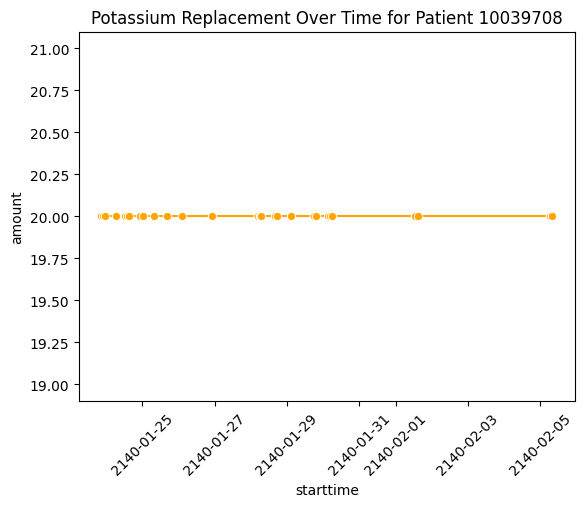

In [ ]:
sns.lineplot(data=k_replace, x='starttime', y='amount', marker='o', color='orange')
plt.title(f"Potassium Replacement Over Time for Patient {patient_id}")
plt.xticks(rotation=45)
plt.show()


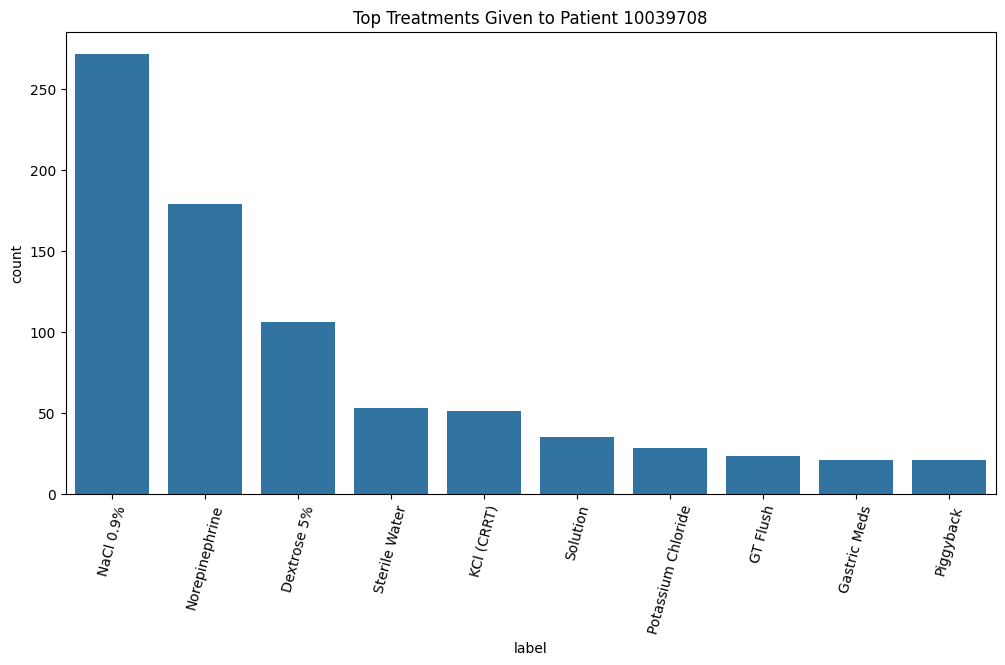

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=pat_inputs, x='label', order=pat_inputs['label'].value_counts().head(10).index)
plt.xticks(rotation=75)
plt.title(f"Top Treatments Given to Patient {patient_id}")
plt.show()


In [ ]:
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt  #for data visualization
import seaborn as sns #for enhanced data vis

In [ ]:
labevents=pd.read_csv("E:/AI_NutriCare/Data/Raw/labevents.csv")
labevents
# labevents.csv is the file in MIMIC-IV that contains all laboratory test results for patients.
# like blood test urine test stool tests chemistry tests electrolytes infection kidney and live function tests diabetes 

labevent_id  subject_id     hadm_id  specimen_id  itemid  \
0            172061    10014354  29600294.0      1808066   51277   
1            172062    10014354  29600294.0      1808066   51279   
2            172068    10014354  29600294.0      1808066   52172   
3            172063    10014354  29600294.0      1808066   51301   
4            172050    10014354  29600294.0      1808066   51249   
...             ...         ...         ...          ...     ...   
107722       254700    10021487  28998349.0     78791160   50804   
107723       254702    10021487  28998349.0     78791160   50818   
107724       254707    10021487  28998349.0     78791160   52033   
107725       254706    10021487  28998349.0     78791160   50825   
107726       454886    10038999  27189241.0     13534028   50873   

       order_provider_id            charttime            storetime value  \
0                    NaN  2148-08-16 00:00:00  2148-08-16 01:30:00  15.4   
1                    NaN  2148-08-16 00:00:00  2148-08-16 01:30:00  3.35   
2                    NaN  2148-08-16 00:00:00  2148-08-16 01:30:00  49.7   
3                    NaN  2148-08-16 00:00:00  2148-08-16 01:30:00  20.3   
4                    NaN  2148-08-16 00:00:00  2148-08-16 01:30:00  31.1   
...                  ...                  ...                  ...   ...   
107722               NaN  2116-12-07 18:59:00  2116-12-07 19:00:00    35   
107723               NaN  2116-12-07 18:59:00  2116-12-07 19:00:00    56   
107724               NaN  2116-12-07 18:59:00  2116-12-07 18:59:00  ART.   
107725               NaN  2116-12-07 18:59:00  2116-12-07 18:59:00  39.7   
107726               NaN  2131-05-23 21:59:00  2131-05-25 14:36:00   ___   

        valuenum valueuom  ref_range_lower  ref_range_upper      flag  \
0          15.40        %             10.5             15.5       NaN   
1           3.35     m/uL              4.6              6.1  abnormal   
2          49.70       fL             35.1             46.3  abnormal   
3          20.30     K/uL              4.0             10.0  abnormal   
4          31.10     g/dL             32.0             37.0  abnormal   
...          ...      ...              ...              ...       ...   
107722     35.00    mEq/L             21.0             30.0  abnormal   
107723     56.00    mm Hg             35.0             45.0  abnormal   
107724       NaN      NaN              NaN              NaN       NaN   
107725     39.70      NaN              NaN              NaN       NaN   
107726       NaN      NaN              NaN              NaN       NaN   

       priority   comments  
0       ROUTINE        NaN  
1       ROUTINE        NaN  
2       ROUTINE        NaN  
3       ROUTINE        NaN  
4       ROUTINE        NaN  
...         ...        ...  
107722      NaN        NaN  
107723      NaN        NaN  
107724      NaN        ___  
107725      NaN        NaN  
107726     STAT  NEGATIVE.  

[107727 rows x 16 columns]

In [ ]:
labevents.columns
# labevent_id
# Unique ID for the lab test
# subject_id
# Unique patient ID
# hadm_id
# Hospital admission ID
# specimen_id
# ID of the sample that was taken
# itemid
# The test type (like glucose, creatinine, sodium).kwds=
# order_provider_id
# ID of the doctor/nurse who ordered the test
# charttime
# Exact time when the sample was collected (VERY important)
# storetime
# When the result was recorded in the system
# value
# Raw text value of the test
# valuenum
# Numeric value of the lab result (this is what you graph!)
# valueuom
# Unit of measurement
# ref_range_lower / ref_range_upper
# Normal range for each test
# priority
# "ROUTINE" (regular testing)
# "STAT" (urgent test ordered)

Index(['labevent_id', 'subject_id', 'hadm_id', 'specimen_id', 'itemid',
       'order_provider_id', 'charttime', 'storetime', 'value', 'valuenum',
       'valueuom', 'ref_range_lower', 'ref_range_upper', 'flag', 'priority',
       'comments'],
      dtype='object')

In [ ]:
d_labitems=pd.read_csv("E:/AI_NutriCare/Data/Raw/d_labitems.csv")
d_labitems

itemid                       label                fluid    category
0      50808                Free Calcium                Blood   Blood Gas
1      50826                Tidal Volume                Blood   Blood Gas
2      50813                     Lactate                Blood   Blood Gas
3      52029           % Ionized Calcium                Blood   Blood Gas
4      50801  Alveolar-arterial Gradient                Blood   Blood Gas
...      ...                         ...                  ...         ...
1617   52249                      Delete  Cerebrospinal Fluid  Hematology
1618   52251                      Delete  Cerebrospinal Fluid  Hematology
1619   52266                  Macrophage  Cerebrospinal Fluid  Hematology
1620   52262           Immunophenotyping  Cerebrospinal Fluid  Hematology
1621   52265                     Lymphs#  Cerebrospinal Fluid  Hematology

[1622 rows x 4 columns]

In [ ]:
labevents = labevents.merge(d_labitems[['itemid','label']], on='itemid', how='left')
labevents
# 10014354

10014354

In [ ]:
labevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107727 entries, 0 to 107726
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   labevent_id        107727 non-null  int64  
 1   subject_id         107727 non-null  int64  
 2   hadm_id            79307 non-null   float64
 3   specimen_id        107727 non-null  int64  
 4   itemid             107727 non-null  int64  
 5   order_provider_id  16830 non-null   object 
 6   charttime          107727 non-null  object 
 7   storetime          106735 non-null  object 
 8   value              98139 non-null   object 
 9   valuenum           95246 non-null   float64
 10  valueuom           91524 non-null   object 
 11  ref_range_lower    88999 non-null   float64
 12  ref_range_upper    88999 non-null   float64
 13  flag               40275 non-null   object 
 14  priority           98398 non-null   object 
 15  comments           18454 non-null   object 
 16  la

In [ ]:
print(labevents.columns)


Index(['labevent_id', 'subject_id', 'hadm_id', 'specimen_id', 'itemid',
       'order_provider_id', 'charttime', 'storetime', 'value', 'valuenum',
       'valueuom', 'ref_range_lower', 'ref_range_upper', 'flag', 'priority',
       'comments', 'label'],
      dtype='object')


In [ ]:
important_keywords = [
    "glucose", "creatinine", "bun", "urea",
    "sodium", "potassium",
    "hemoglobin", "hematocrit",
    "cholesterol",
    "ast", "alt",
    "wbc"
]
# Heart Rate MAP Respiratory Rate Temperature Glucose Creatinine BUN 
# Sodium Potassium Hemoglobin WBC Lactate Fluid Balance Vasopressors Sedatives Antibiotics Insulin
useful_labitems = d_labitems[d_labitems['label'].str.contains(
    '|'.join(important_keywords),
    case=False, na=False
)]
useful_lab_ids = useful_labitems['itemid'].unique()
# We search inside d_labitems to find their itemid numbers.
# We extract those itemid values into useful_lab_ids.
# Then we filter labevents using those itemids.



In [ ]:
labs_useful = labevents[labevents['itemid'].isin(useful_lab_ids)]
# Filter labevents to keep only important lab tests
labs_useful = labs_useful[labs_useful['valuenum'].notna()]
# useful_lab_ids contains itemid values of important tests
# (glucose, creatinine, potassium, sodium, etc.)

In [ ]:
labevents['itemid'].value_counts().head(20)


itemid
50971    3022
50983    3007
50912    3003
50902    2981
51006    2974
51221    2913
50882    2863
50868    2860
51265    2827
51222    2787
51301    2760
51277    2760
51249    2760
51250    2760
51279    2760
51248    2760
50931    2711
50960    2470
50893    2377
50970    2337
Name: count, dtype: int64

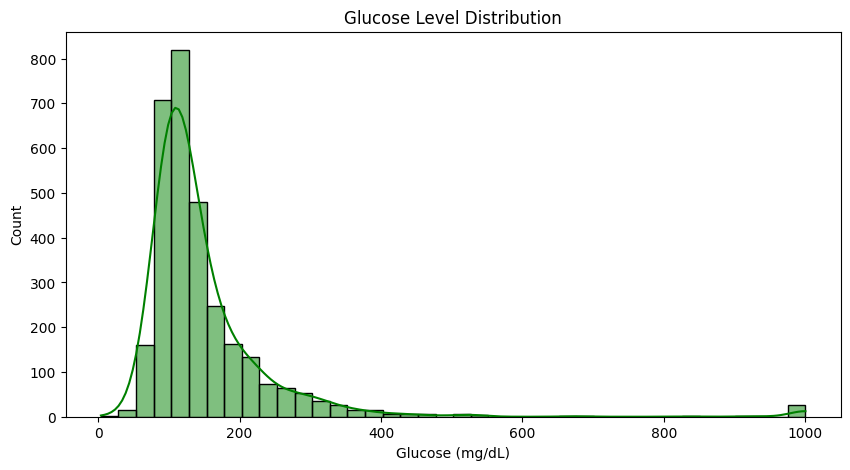

In [ ]:
glucose_labs = labs_useful[labs_useful['label'].str.contains("glucose", case=False)]
plt.figure(figsize=(10,5))
sns.histplot(glucose_labs['valuenum'], bins=40, kde=True, color='green')
plt.title("Glucose Level Distribution")
plt.xlabel("Glucose (mg/dL)")
plt.show()
# subject_id	valuenum	valueuom	flag
# 10014354	193.0	mg/dL	abnormal
# 10014354	210.0	mg/dL	abnormal
# 10035631	168.0	mg/dL	abnormal
# How many glucose readings fall into different ranges
# If most patients have normal glucose
# Normal = 70–100 mg/dL
# ✔ If many patients have diabetes
# High glucose = >125 mg/dL
# ✔ If some readings are dangerously high
# Very high = >200 mg/dL

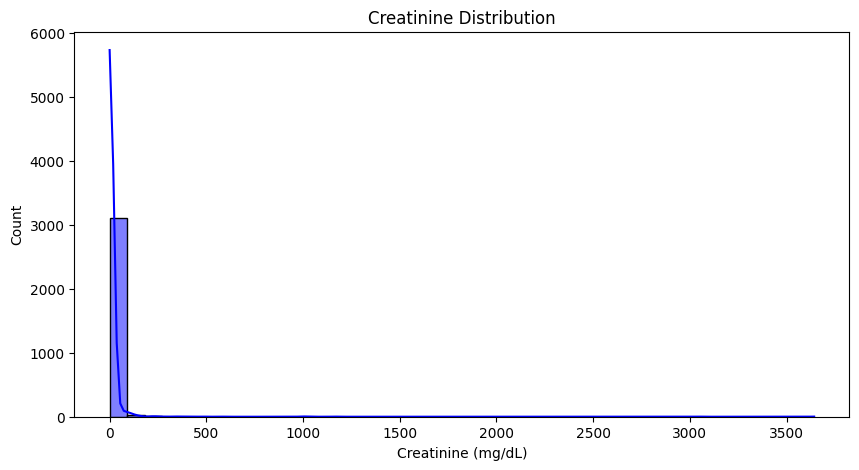

In [ ]:
creatinine = labs_useful[labs_useful['label'].str.contains("creatinine", case=False)]
plt.figure(figsize=(10,5))
sns.histplot(creatinine['valuenum'], bins=40, kde=True, color='blue')
plt.title("Creatinine Distribution")
plt.xlabel("Creatinine (mg/dL)")
plt.show()
# we're selecting all rows where the lab test name contains “creatinine”.
# Creatinine is a kidney function marker, so you now have:
# subject_id	valuenum	unit	flag
# 100104	1.1	mg/dL	normal
# 100245	2.8	mg/dL	abnormal
# 100356	5.2	mg/dL	abnormal
# Kidney damage range:
# 1.5 = Mild
# 2.0 = Moderate
# 3.0 = Severe
# 5.0 = Dangerous


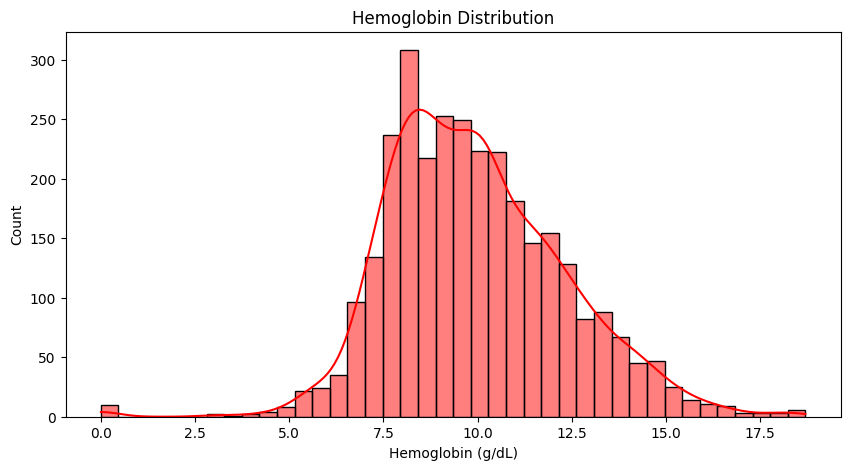

In [ ]:
hb = labs_useful[labs_useful['label'].str.contains("hemoglobin", case=False)]
plt.figure(figsize=(10,5))
sns.histplot(hb['valuenum'], bins=40, kde=True, color='red')
plt.title("Hemoglobin Distribution")
plt.xlabel("Hemoglobin (g/dL)")
plt.show()


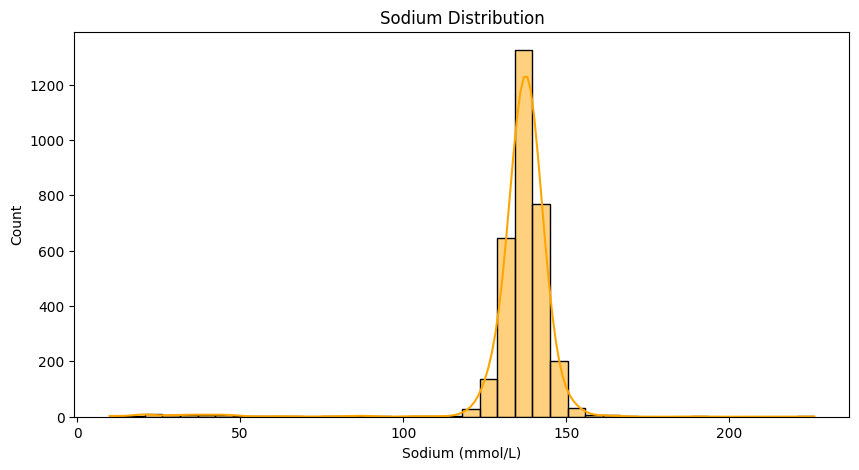

In [ ]:
sodium = labs_useful[labs_useful['label'].str.contains("sodium", case=False)]
plt.figure(figsize=(10,5))
sns.histplot(sodium['valuenum'], bins=40, kde=True, color='orange')
plt.title("Sodium Distribution")
plt.xlabel("Sodium (mmol/L)")
plt.show()


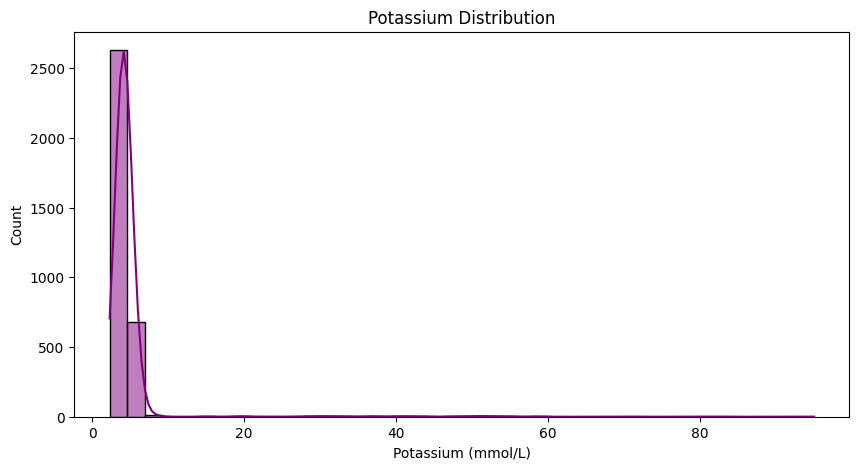

In [ ]:
potassium = labs_useful[labs_useful['label'].str.contains("potassium", case=False)]
plt.figure(figsize=(10,5))
sns.histplot(potassium['valuenum'], bins=40, kde=True, color='purple')
plt.title("Potassium Distribution")
plt.xlabel("Potassium (mmol/L)")
plt.show()


In [ ]:
ast = labs_useful[labs_useful['label'].str.contains("ast", case=False)]
alt = labs_useful[labs_useful['label'].str.contains("alt", case=False)]


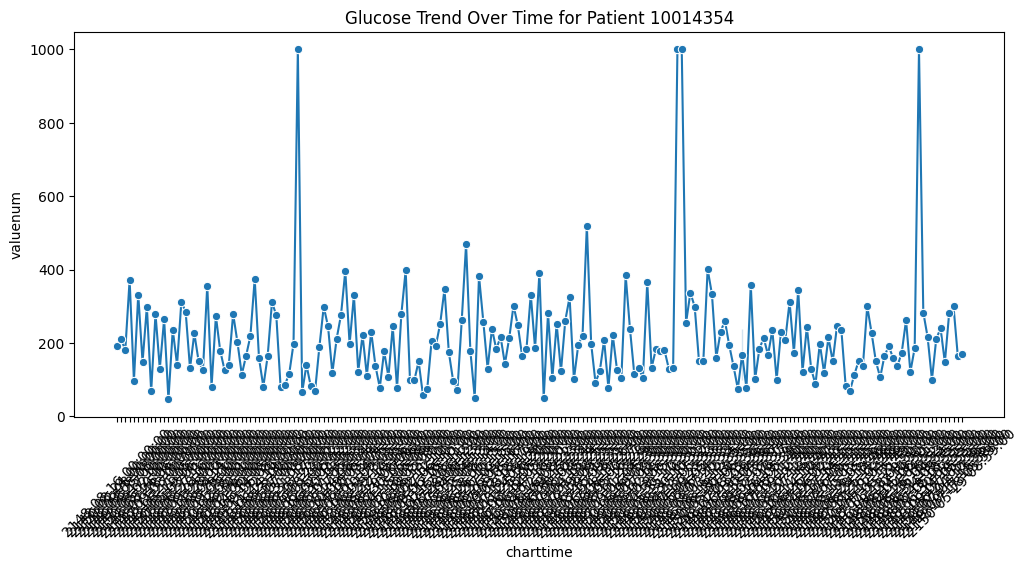

In [ ]:
patient_id = 10014354

glucose_patient = glucose_labs[glucose_labs['subject_id'] == patient_id]
# Filters glucose results for ONLY that patient
plt.figure(figsize=(12,5))
sns.lineplot(data=glucose_patient, x='charttime', y='valuenum', marker="o")
plt.title(f"Glucose Trend Over Time for Patient {patient_id}")
plt.xticks(rotation=45)
plt.show()



In [ ]:
glucose_patient.shape



(198, 17)

In [ ]:
glucose_patient[['charttime', 'valuenum']].head(20)

charttime  valuenum
30    2148-08-16 00:00:00     193.0
80    2148-08-24 00:00:00     210.0
235   2150-02-08 00:00:00     181.0
499   2148-09-08 08:00:00     372.0
1093  2148-08-25 00:00:00      97.0
2174  2149-09-17 10:00:00     332.0
3019  2148-09-02 00:00:00     148.0
3150  2150-05-10 00:00:00     299.0
3491  2148-08-26 06:00:00      68.0
4095  2148-07-18 16:00:00     279.0
4483  2148-09-03 00:00:00     130.0
4962  2147-11-27 00:00:00     265.0
5128  2148-05-11 05:00:00      46.0
5236  2148-05-19 06:00:00     236.0
5265  2150-05-03 06:00:00     141.0
5635  2147-04-27 11:00:00     313.0
5811  2148-06-27 16:00:00     284.0
6049  2148-08-28 00:00:00     131.0
6109  2148-09-04 00:00:00     226.0
6362  2147-11-28 00:00:00     150.0

In [ ]:
glucose_patients = glucose_labs['subject_id'].value_counts()
glucose_patients
# It counts how many glucose tests each patient has.

subject_id
10035631    216
10014354    198
10039708    165
10019003    116
10021487    114
           ... 
10031404      3
10036156      3
10019568      3
10022281      3
10019917      2
Name: count, Length: 100, dtype: int64

In [ ]:
best_patient = glucose_patients.idxmax()
best_patient
#it will give the maximum number of glucouse tests takem by the patent whose id 


np.int64(10035631)

In [ ]:
patient_id = best_patient
#patient_id : 10035631 now become this 
glucose_patient = glucose_labs[glucose_labs['subject_id'] == patient_id].copy()
# Select all glucose rows belonging to this patient.”
# ALL glucose tests
# ALL timestamps
# ALL values
glucose_patient['charttime'] = pd.to_datetime(glucose_patient['charttime'])
# Convert charttime into proper datetime format
# "2148-08-16 00:00:00"  converts to   datetime(2148, 8, 16)
glucose_patient = glucose_patient.sort_values('charttime')
# Arrange the glucose tests in order from earliest to latest.”

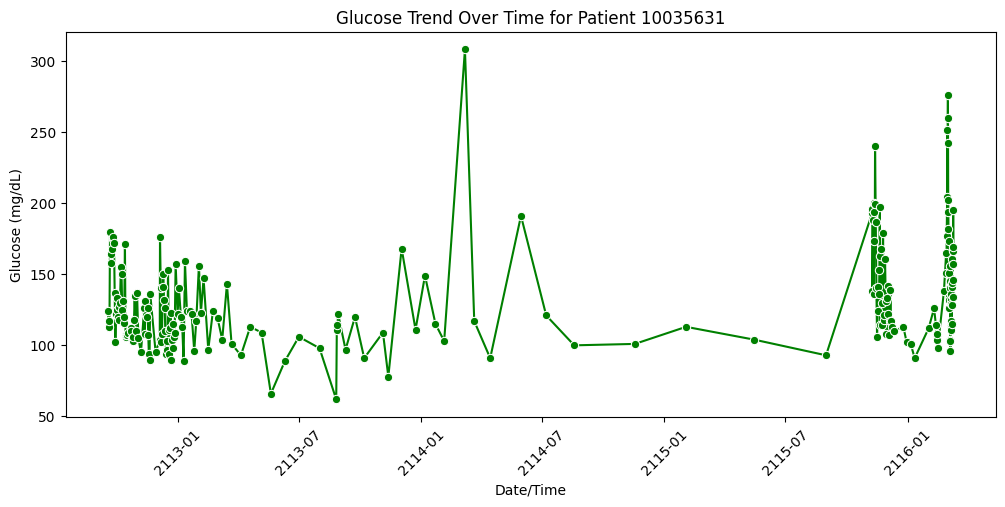

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=glucose_patient, x='charttime', y='valuenum', marker="o", color='green')
plt.title(f"Glucose Trend Over Time for Patient {patient_id}")
plt.xlabel("Date/Time")
plt.ylabel("Glucose (mg/dL)")
plt.xticks(rotation=45)
plt.show()
# Has diabetes or severe glucose dysregulation
# Experiences both hyperglycemia and hypoglycemia
# Has periods of extreme instability
# Requires close monitoring
# Needs insulin or medication adjustment
# Needs a strict diabetic diet
# This is exactly the type of trend you see in ICU diabetic patients.

In [ ]:
worst_patient = glucose_patients.idxmin()
worst_patient
#it will give the maximum number of glucouse tests takem by the patent whose id 


np.int64(10019917)

In [ ]:
patient_id = worst_patient
#patient_id : 10019917 now become this 
glucose_patient = glucose_labs[glucose_labs['subject_id'] == patient_id].copy()
# Select all glucose rows belonging to this patient.”
# ALL glucose tests
# ALL timestamps
# ALL values
glucose_patient['charttime'] = pd.to_datetime(glucose_patient['charttime'])
# Convert charttime into proper datetime format
# "2148-08-16 00:00:00"  converts to   datetime(2148, 8, 16)
glucose_patient = glucose_patient.sort_values('charttime')
# Arrange the glucose tests in order from earliest to latest.”

In [ ]:
glucose_patient = glucose_labs[glucose_labs['subject_id'] == patient_id].copy()
glucose_patient
# charttime:
# # “When the patient’s blood sample was collected.”
# storetime:
# “When the result was entered into the hospital database.”

labevent_id  subject_id     hadm_id  specimen_id  itemid  \
101556       240126    10019917  22585261.0     32893819   50931   
104921       240092    10019917  22585261.0     10107948   50931   

       order_provider_id            charttime            storetime value  \
101556               NaN  2182-01-09 05:55:00  2182-01-09 07:18:00   ___   
104921               NaN  2182-01-08 03:57:00  2182-01-08 04:54:00   ___   

        valuenum valueuom  ref_range_lower  ref_range_upper      flag  \
101556      93.0    mg/dL             70.0            100.0       NaN   
104921     110.0    mg/dL             70.0            100.0  abnormal   

       priority                                           comments    label  
101556     STAT  IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI...  Glucose  
104921     STAT  IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI...  Glucose

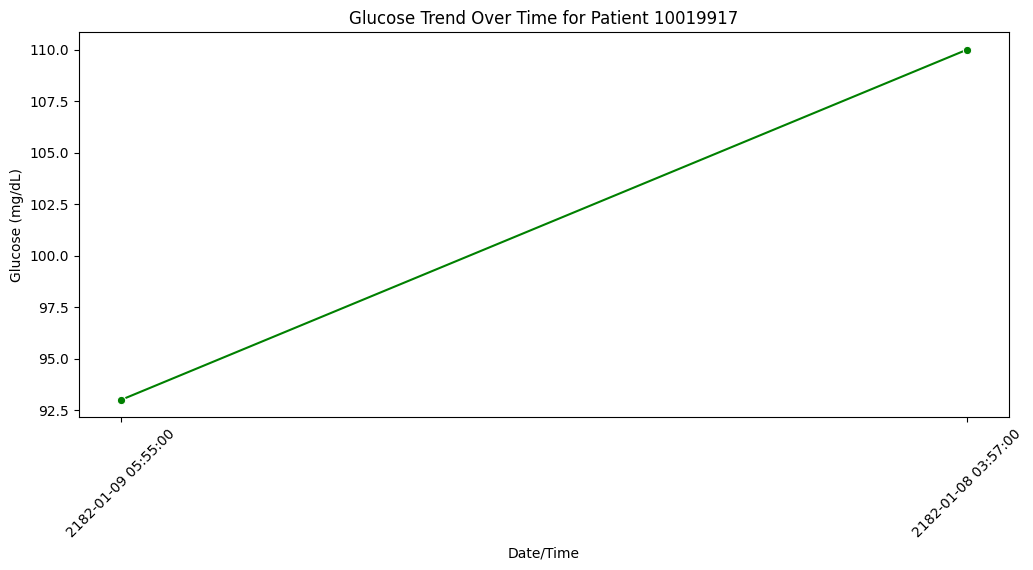

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=glucose_patient, x='charttime', y='valuenum', marker="o", color='green')
plt.title(f"Glucose Trend Over Time for Patient {patient_id}")
plt.xlabel("Date/Time")
plt.ylabel("Glucose (mg/dL)")
plt.xticks(rotation=45)
plt.show()
# The patient’s glucose decreased over time
# ✔ This is a healthy improvement
# ✔ Glucose moved from borderline-high → normal
# ✔ No sign of diabetes
# ✔ No hypoglycemia (not too low)

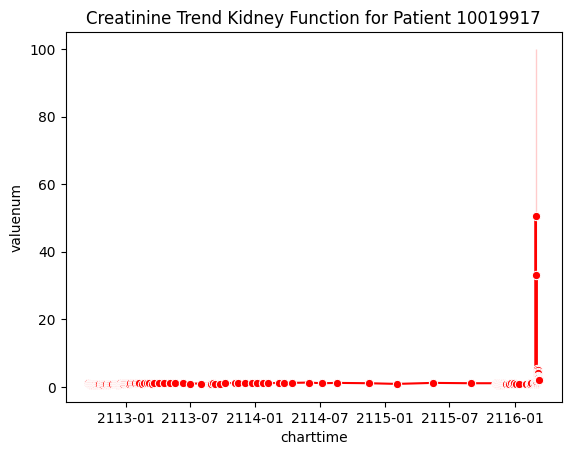

In [ ]:
creatinine = labs_useful[labs_useful['label'].str.contains("creatinine", case=False)]
# creatinine = how well your kidneys are working
# Normal creatinine range:
# 0.6 – 1.3 mg/dL
# If creatinine goes above 2 → kidney stress
# Above 5 → kidney failure
# Above 10 → severe kidney failure
cre_pat = creatinine[creatinine['subject_id'] == 10035631].copy()
cre_pat['charttime'] = pd.to_datetime(cre_pat['charttime'])
sns.lineplot(data=cre_pat, x='charttime', y='valuenum', marker="o", color='red')
plt.title(f"Creatinine Trend Kidney Function for Patient {patient_id}")
plt.show()
# For most of the timeline (2113–2115):
# Creatinine values are between 0 and 2 mg/dL
# This is NORMAL or slightly low.

# At the end of the graph (around 2116):
# Creatinine jumps to:
# 30 mg/dL
# 40 mg/dL
# 100 mg/dL (very high)
# This is NOT normal at all.
# These values are extremely high and medically alarming.

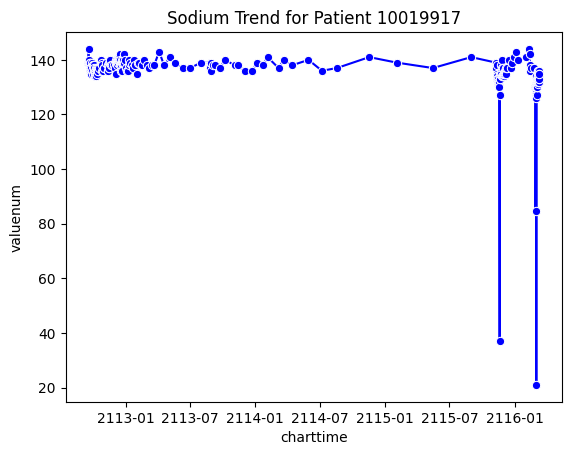

In [ ]:
# First, what is Sodium (Na⁺)?
# Normal sodium level in blood:
# 135–145 mEq/L
from traitlets import This


sodium = labs_useful[labs_useful['label'].str.contains("sodium", case=False)]
na_pat = sodium[sodium['subject_id'] == 10035631].copy()
na_pat['charttime'] = pd.to_datetime(na_pat['charttime'])
sns.lineplot(data=na_pat, x='charttime', y='valuenum', marker="o", color='blue')
plt.title(f"Sodium Trend for Patient {patient_id}")
plt.show()
# PATTERN 1 — NORMAL SODIUM RANGE MOST OF THE TIME (135–145)
# For most of the timeline (2113–2115):
# Sodium stays between 135–145
# This is EXACTLY the normal human sodium range
# So during this long period, the patient had:
# ✔ Normal kidney regulation
# ✔ No dehydration
# ✔ No major electrolyte disturbance
# ✔ Stable ICU condition
# This is good.

# PATTERN 2 — EXTREME SODIUM DROPS AT THE END (20–40 mEq/L) 😳
# At the end of the graph (2116):
# You see values like:
# 37 mEq/L
# 21 mEq/L
# 85 mEq/L (still low)
# These values are NOT compatible with life.

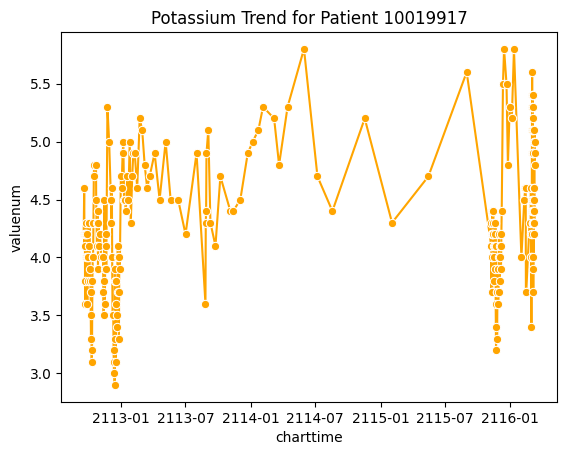

In [ ]:
# What is Potassium (K⁺)?
# Normal potassium range:
# 3.5 – 5.0 mEq/L
# Potassium is critical for:
# Heart beats
# Muscle contractions
# Nerve signals
# Kidney function
potassium = labs_useful[labs_useful['label'].str.contains("potassium", case=False)]
k_pat = potassium[potassium['subject_id'] == 10035631].copy()
k_pat['charttime'] = pd.to_datetime(k_pat['charttime'])

sns.lineplot(data=k_pat, x='charttime', y='valuenum', marker="o", color='orange')
plt.title(f"Potassium Trend for Patient {patient_id}")
plt.show()
# PHASE 1 — Potassium 3.0–5.2 (Mostly Normal Range)
# During the early period (2113–2114):
# Values range 3.0 to 5.2
# This is mostly normal
# Occasional dips to <3.5 = mild hypokalemia
# Occasional rises to >5.0 = mild hyperkalemia
# This is common in ICU patients.
# Medical meaning:
# ✔ Electrolytes are mostly controlled
# ✔ Some fluctuations due to medications, IV fluids, kidney function
# ✔ Nothing dangerously abnormal yet

# PHASE 2 — Potassium rising
# 5.3
# 5.4
# 5.6
# 5.7
# This is hyperkalemia, which is dangerous.
# Overalll
# Periods of NORMAL potassium
# ✔ Episodes of hyperkalemia (5.5–5.7)
# ✔ Episodes of hypokalemia (~3.0)

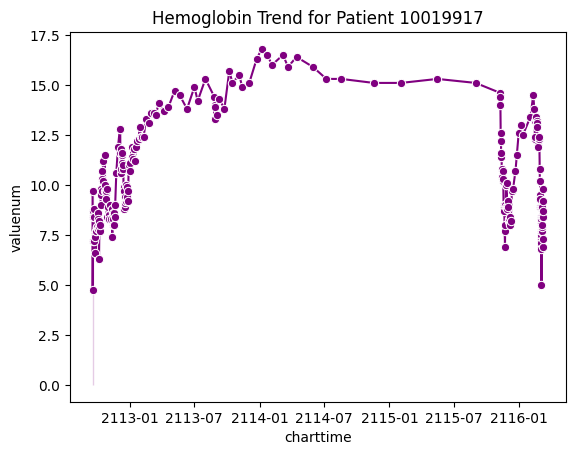

In [ ]:
hb = labs_useful[labs_useful['label'].str.contains("hemoglobin", case=False)]
hb_pat = hb[hb['subject_id'] == 10035631].copy()
hb_pat['charttime'] = pd.to_datetime(hb_pat['charttime'])

sns.lineplot(data=hb_pat, x='charttime', y='valuenum', marker="o", color='purple')
plt.title(f"Hemoglobin Trend for Patient {patient_id}")
plt.show()

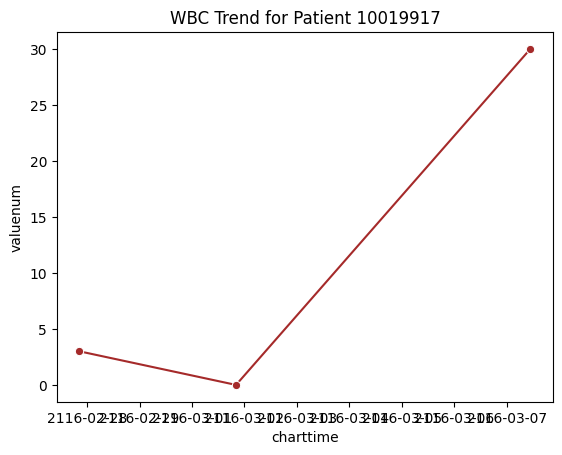

In [ ]:
wbc = labs_useful[labs_useful['label'].str.contains("wbc", case=False)]
wbc_pat = wbc[wbc['subject_id'] == 10035631].copy()
wbc_pat['charttime'] = pd.to_datetime(wbc_pat['charttime'])
# What is WBC?
# WBC = White Blood Cell count
# White blood cells are the cells your body uses to fight infection.
sns.lineplot(data=wbc_pat, x='charttime', y='valuenum', marker="o", color='brown')
plt.title(f"WBC Trend for Patient {patient_id}")
plt.show()
# Normal WBC Range
# Normal WBC count in adults:
# 4,000 – 11,000 cells/µL
# Often written as:
# # 4.0 – 11.0 (×10³/µL)
# WBC = 15 → Mild infection
# WBC = 20 → Strong infection / sepsis risk
# WBC = 30+ → Very severe infection (possible sepsis)


In [ ]:
print("Glucose levels:", glucose_patient['valuenum'].tolist())
print("Creatinine levels:", cre_pat['valuenum'].tolist())
print("Sodium levels:", na_pat['valuenum'].tolist())
print("Potassium levels:", k_pat['valuenum'].tolist())
print("Hemoglobin levels:", hb_pat['valuenum'].tolist())
print("WBC levels:", wbc_pat['valuenum'].tolist())


Glucose levels: [93.0, 110.0]
Creatinine levels: [0.8, 1.0, 0.9, 0.7, 0.7, 1.0, 1.1, 2.2, 0.7, 0.9, 0.6, 0.7, 0.8, 1.0, 0.8, 1.1, 0.9, 1.0, 33.0, 1.0, 0.9, 0.8, 0.8, 1.0, 0.6, 0.8, 1.2, 1.1, 0.8, 0.9, 0.7, 0.8, 1.0, 0.7, 0.8, 0.8, 0.9, 0.9, 0.7, 1.0, 0.9, 1.0, 5.0, 0.8, 1.0, 0.9, 0.8, 0.8, 0.8, 0.9, 0.8, 0.9, 0.8, 0.9, 0.9, 1.2, 1.2, 1.0, 1.0, 0.9, 0.7, 0.8, 0.9, 0.8, 1.1, 1.0, 1.1, 0.8, 0.7, 0.7, 0.9, 1.1, 1.0, 0.8, 0.7, 0.9, 0.7, 1.1, 2.9, 4.4, 0.8, 0.9, 2.7, 0.8, 5.0, 1.2, 3.3, 0.8, 0.8, 1.0, 1.1, 1.2, 0.9, 1.2, 1.1, 0.8, 2.4, 0.7, 0.9, 0.8, 0.8, 0.9, 4.1, 0.7, 0.8, 0.8, 1.1, 4.6, 0.6, 0.8, 0.8, 1.1, 0.9, 0.8, 1.0, 0.9, 1.0, 1.2, 0.9, 0.9, 1.1, 1.1, 0.9, 0.8, 0.8, 100.0, 1.0, 1.2, 1.1, 0.8, 2.3, 1.0, 1.4, 5.3, 0.8, 1.0, 4.4, 1.1, 1.1, 0.9, 1.0, 0.7, 1.2, 1.0, 1.1, 0.8, 0.6, 1.0, 0.8, 1.0, 0.7, 0.8, 1.3, 0.7, 1.1, 1.1, 1.1, 2.1, 3.2, 0.9, 0.8, 1.3, 1.1, 1.0, 1.9, 1.1, 1.1, 1.1, 0.7, 1.1, 2.1, 1.0, 0.9, 1.2, 2.5, 1.3, 0.7, 1.2, 0.6, 0.8, 0.8, 0.9, 0.9, 0.9, 1.3, 1.1, 1.1, 1.1, 1.1, 1.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df=pd.read_csv("E:/AI_NutriCare/Data/Raw/patients.csv")
df

subject_id gender  anchor_age  anchor_year anchor_year_group         dod
0     10014729      F          21         2125       2011 - 2013         NaN
1     10003400      F          72         2134       2011 - 2013  2137-09-02
2     10002428      F          80         2155       2011 - 2013         NaN
3     10032725      F          38         2143       2011 - 2013  2143-03-30
4     10027445      F          48         2142       2011 - 2013  2146-02-09
..         ...    ...         ...          ...               ...         ...
95    10004733      M          51         2174       2014 - 2016         NaN
96    10021118      M          62         2161       2014 - 2016         NaN
97    10018501      M          83         2141       2014 - 2016         NaN
98    10007058      M          48         2167       2014 - 2016         NaN
99    10038992      M          70         2185       2014 - 2016         NaN

[100 rows x 6 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subject_id         100 non-null    int64 
 1   gender             100 non-null    object
 2   anchor_age         100 non-null    int64 
 3   anchor_year        100 non-null    int64 
 4   anchor_year_group  100 non-null    object
 5   dod                31 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


C:\Users\admin\AppData\Local\Temp\ipykernel_12564\562626195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set2')


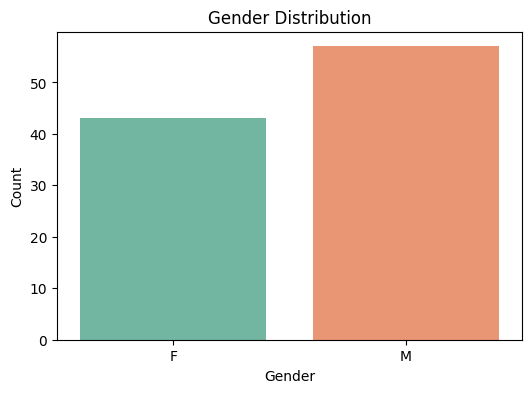

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


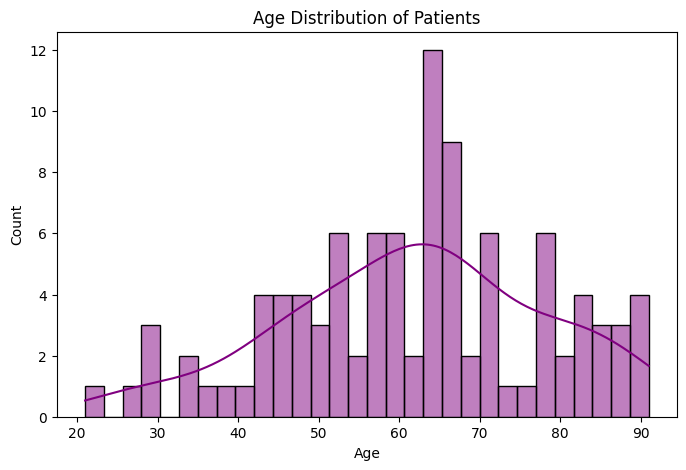

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["anchor_age"],bins=30,kde=True,color='purple')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_12564\3434639147.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='anchor_age', palette='coolwarm')


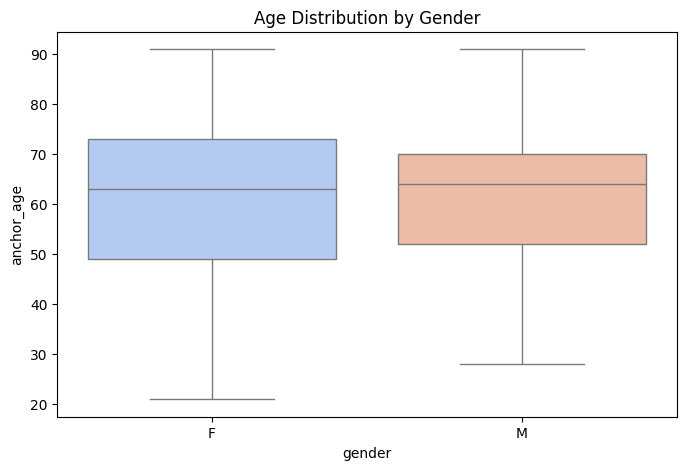

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='gender', y='anchor_age', palette='coolwarm')
plt.title("Age Distribution by Gender")
plt.show()


In [ ]:
# Q1=df["anchor_age"].quantile(0.25)
# Q3=df["anchor_age"].quantile(0.75)
# IQR=Q3-Q1
# lower_bond=Q1-1.5*IQR
# upper_bound=Q3+1.5*IQR
# outliers=df[(df["anchor_age"]<lower_bound)|
#             df["anchor_age"]>upper_bound]
# outliers.head(),outliers.shape

NameError: name 'lower_bound' is not defined

In [ ]:
# There are visual outliers in the boxplot
# But
# ✔ There are NO mathematical outliers according to IQR
# This is common in medical datasets.

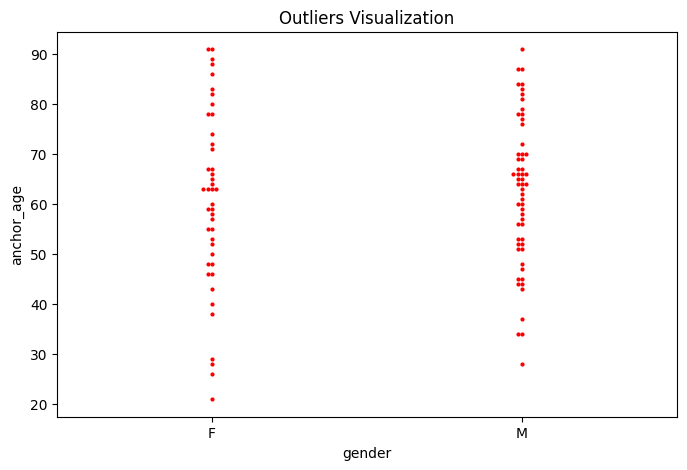

In [ ]:
# plt.figure(figsize=(8,5))
# sns.swarmplot(data=df, x='gender', y='anchor_age', color='red', size=3)
# plt.title("Outliers Visualization")
# plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_20728\3384259748.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='anchor_age', palette='coolwarm')


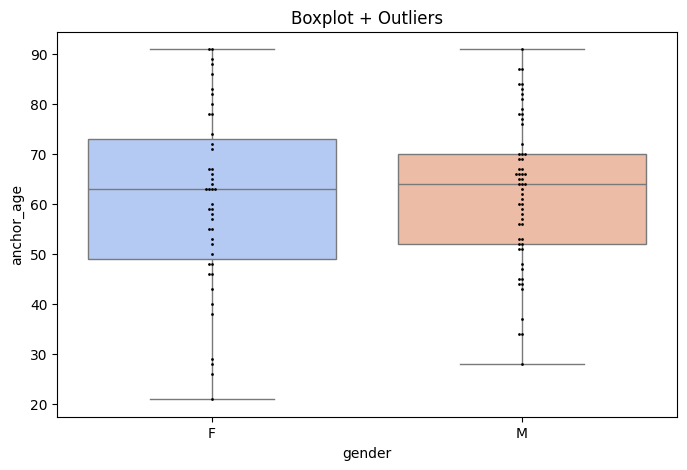

In [ ]:
# plt.figure(figsize=(8,5))
# sns.boxplot(data=df, x='gender', y='anchor_age', palette='coolwarm')
# sns.swarmplot(data=df, x='gender', y='anchor_age', color='black', size=2)
# plt.title("Boxplot + Outliers")
# plt.show()


In [ ]:
# df[(df['anchor_age'] > upper_bound) | 
#          (df['anchor_age'] < lower_bound)][['subject_id','gender','anchor_age']]

subject_id gender  anchor_age
0    10014729      F          21

C:\Users\admin\AppData\Local\Temp\ipykernel_20728\2142506777.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age_group', palette='husl')


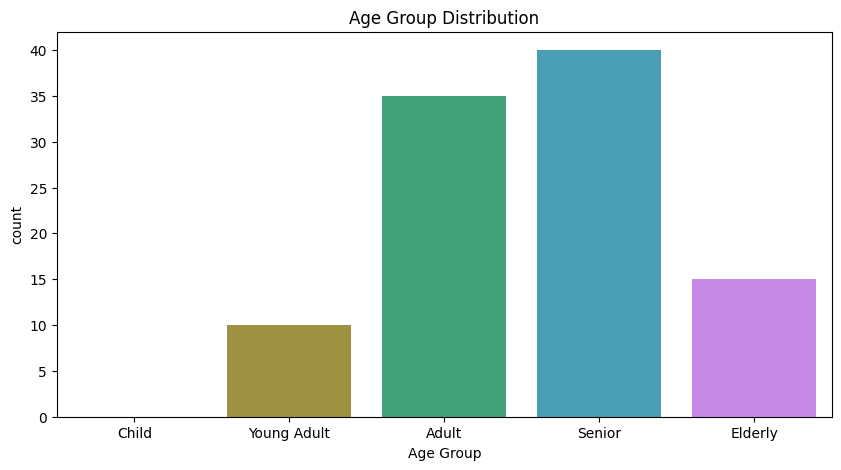

In [ ]:
df['age_group'] = pd.cut(df['anchor_age'], bins=[0,18,40,60,80,120],                             labels=['Child','Young Adult','Adult','Senior','Elderly'])
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='age_group', palette='husl')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.show()


In [ ]:
df.isnull().sum()

subject_id            0
gender                0
anchor_age            0
anchor_year           0
anchor_year_group     0
dod                  69
age_group             0
dtype: int64

In [ ]:
icu=pd.read_csv()

## Notebook: patients.ipynb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df=pd.read_csv("E:/AI_NutriCare/Data/Raw/patients.csv")
df

subject_id gender  anchor_age  anchor_year anchor_year_group         dod
0     10014729      F          21         2125       2011 - 2013         NaN
1     10003400      F          72         2134       2011 - 2013  2137-09-02
2     10002428      F          80         2155       2011 - 2013         NaN
3     10032725      F          38         2143       2011 - 2013  2143-03-30
4     10027445      F          48         2142       2011 - 2013  2146-02-09
..         ...    ...         ...          ...               ...         ...
95    10004733      M          51         2174       2014 - 2016         NaN
96    10021118      M          62         2161       2014 - 2016         NaN
97    10018501      M          83         2141       2014 - 2016         NaN
98    10007058      M          48         2167       2014 - 2016         NaN
99    10038992      M          70         2185       2014 - 2016         NaN

[100 rows x 6 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subject_id         100 non-null    int64 
 1   gender             100 non-null    object
 2   anchor_age         100 non-null    int64 
 3   anchor_year        100 non-null    int64 
 4   anchor_year_group  100 non-null    object
 5   dod                31 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


C:\Users\admin\AppData\Local\Temp\ipykernel_12564\562626195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set2')


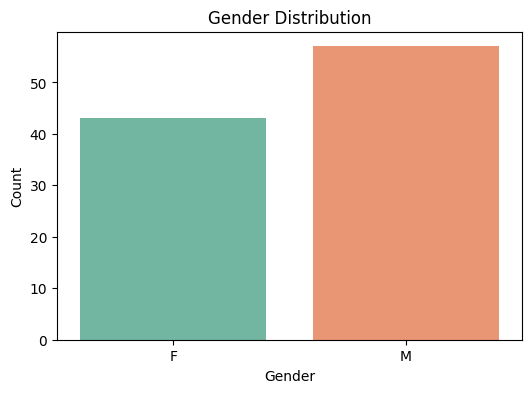

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


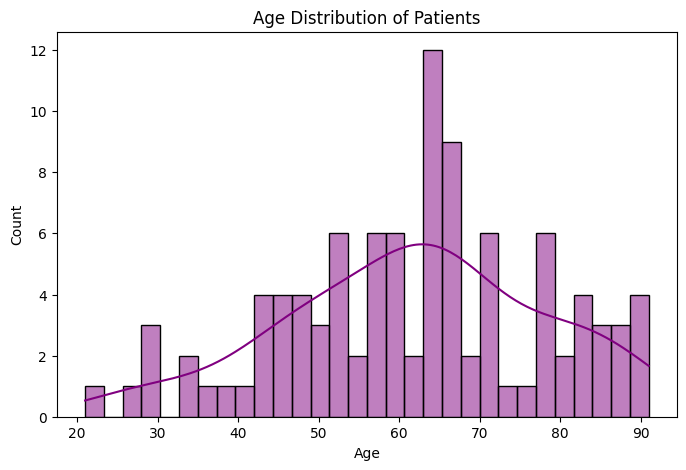

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["anchor_age"],bins=30,kde=True,color='purple')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_12564\3434639147.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='anchor_age', palette='coolwarm')


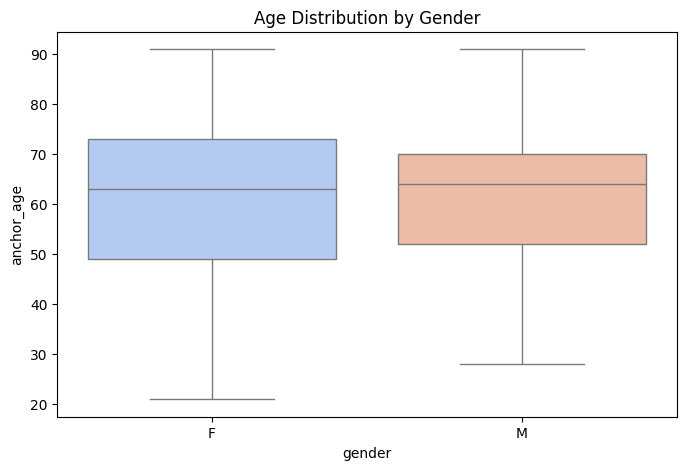

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='gender', y='anchor_age', palette='coolwarm')
plt.title("Age Distribution by Gender")
plt.show()


In [3]:
# Q1=df["anchor_age"].quantile(0.25)
# Q3=df["anchor_age"].quantile(0.75)
# IQR=Q3-Q1
# lower_bond=Q1-1.5*IQR
# upper_bound=Q3+1.5*IQR
# outliers=df[(df["anchor_age"]<lower_bound)|
#             df["anchor_age"]>upper_bound]
# outliers.head(),outliers.shape

In [ ]:
# There are visual outliers in the boxplot
# But
# ✔ There are NO mathematical outliers according to IQR
# This is common in medical datasets.

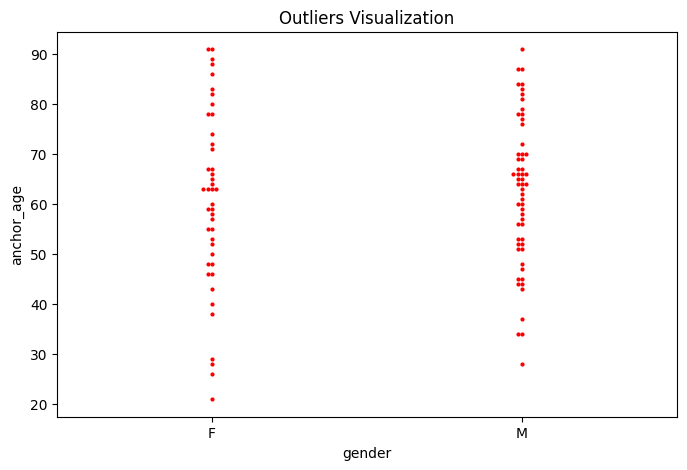

In [ ]:
# plt.figure(figsize=(8,5))
# sns.swarmplot(data=df, x='gender', y='anchor_age', color='red', size=3)
# plt.title("Outliers Visualization")
# plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_20728\3384259748.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='anchor_age', palette='coolwarm')


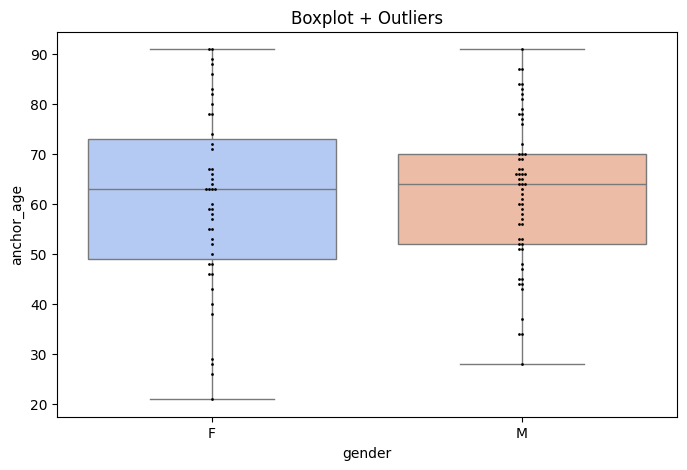

In [ ]:
# plt.figure(figsize=(8,5))
# sns.boxplot(data=df, x='gender', y='anchor_age', palette='coolwarm')
# sns.swarmplot(data=df, x='gender', y='anchor_age', color='black', size=2)
# plt.title("Boxplot + Outliers")
# plt.show()


In [ ]:
# df[(df['anchor_age'] > upper_bound) | 
#          (df['anchor_age'] < lower_bound)][['subject_id','gender','anchor_age']]

subject_id gender  anchor_age
0    10014729      F          21

C:\Users\admin\AppData\Local\Temp\ipykernel_20728\2142506777.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age_group', palette='husl')


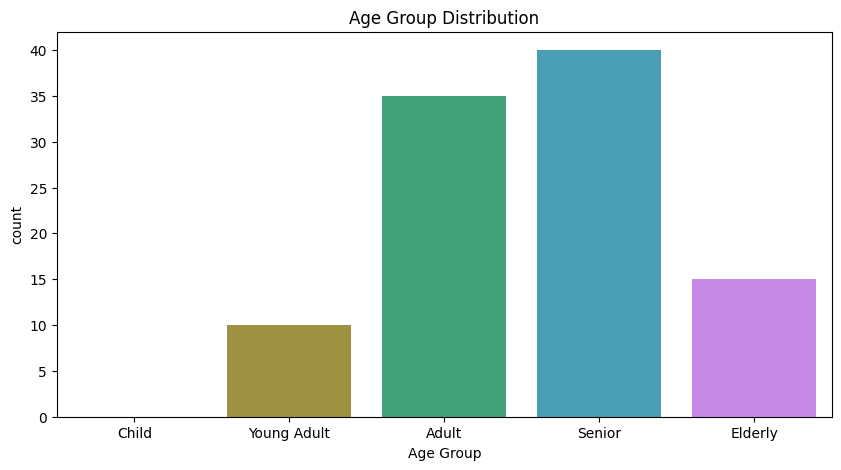

In [ ]:
df['age_group'] = pd.cut(df['anchor_age'], bins=[0,18,40,60,80,120],                             labels=['Child','Young Adult','Adult','Senior','Elderly'])
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='age_group', palette='husl')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.show()


In [ ]:
df.isnull().sum()

subject_id            0
gender                0
anchor_age            0
anchor_year           0
anchor_year_group     0
dod                  69
age_group             0
dtype: int64

In [ ]:
icu=pd.read_csv()


---
## Appended Notebook: Preprocessing.ipynb


In [22]:
plt.style.use('seaborn-v0_8-darkgrid') 
sns.set_palette("husl") #Uses the "husl" color system which provides:evenly spade 

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [223]:
admissions= pd.read_csv('E:/AI_NutriCare/Data/Raw/admissions.csv')
chartevents=pd.read_csv('E:/AI_NutriCare/Data/Raw/chartevents.csv')
d_icd_diagnoses = pd.read_csv('E:/AI_NutriCare/Data/Raw/d_icd_diagnoses.csv')
d_items = pd.read_csv('E:/AI_NutriCare/Data/Raw/d_items.csv')
d_labitems = pd.read_csv('E:/AI_NutriCare/Data/Raw/d_labitems.csv')
diagnoses_icd = pd.read_csv('E:/AI_NutriCare/Data/Raw/diagnoses_icd.csv')
icustays=pd.read_csv('E:/AI_NutriCare/Data/Raw/icustays.csv')  # Observation records for BMI, weight, height
inputevent=pd.read_csv('E:/AI_NutriCare/Data/Raw/inputevents.csv')
labevents = pd.read_csv('E:/AI_NutriCare/Data/Raw/labevents.csv')
omr = pd.read_csv('E:/AI_NutriCare/Data/Raw/omr.csv')
outputevent=pd.read_csv('E:/AI_NutriCare/Data/Raw/outputevents.csv')
patients = pd.read_csv('E:/AI_NutriCare/Data/Raw/patients.csv')
prescriptions = pd.read_csv('E:/AI_NutriCare/Data/Raw/prescriptions.csv')
  # Observation records for BMI, weight, height
  # Observation records for BMI, weight, height


missingno library (msno) to create a matrix visualization
Filters to only include columns with missing values (> 0)
Creates a horizontal bar chart on the second subplot (axes[1])


MISSING VALUE ANALYSIS


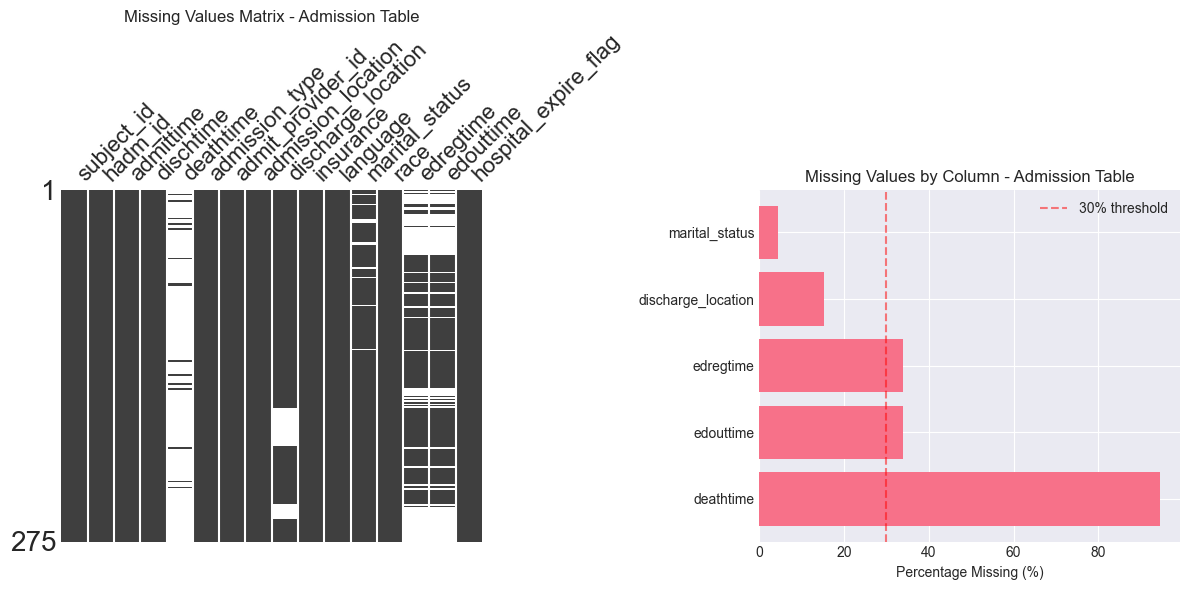


Missing Value Summary for Admission Table:
Total rows: 275
Total columns: 16
Columns with missing values: 5
Total missing cells: 500
Percentage missing: 11.36%
Missing:  subject_id                0
hadm_id                   0
admittime                 0
dischtime                 0
deathtime               260
admission_type            0
admit_provider_id         0
admission_location        0
discharge_location       42
insurance                 0
language                  0
marital_status           12
race                      0
edregtime                93
edouttime                93
hospital_expire_flag      0
dtype: int64


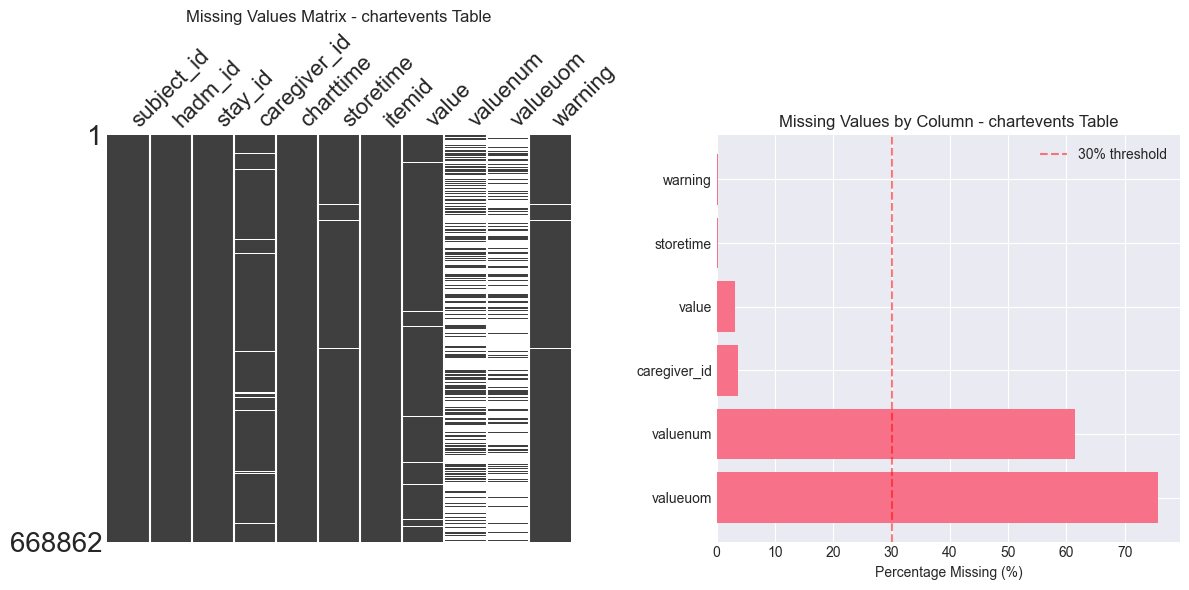


Missing Value Summary for chartevents Table:
Total rows: 668862
Total columns: 11
Columns with missing values: 6
Total missing cells: 964967
Percentage missing: 13.12%
Missing:  subject_id           0
hadm_id              0
stay_id              0
caregiver_id     24240
charttime            0
storetime         1159
itemid               0
value            20730
valuenum        411388
valueuom        506291
warning           1159
dtype: int64


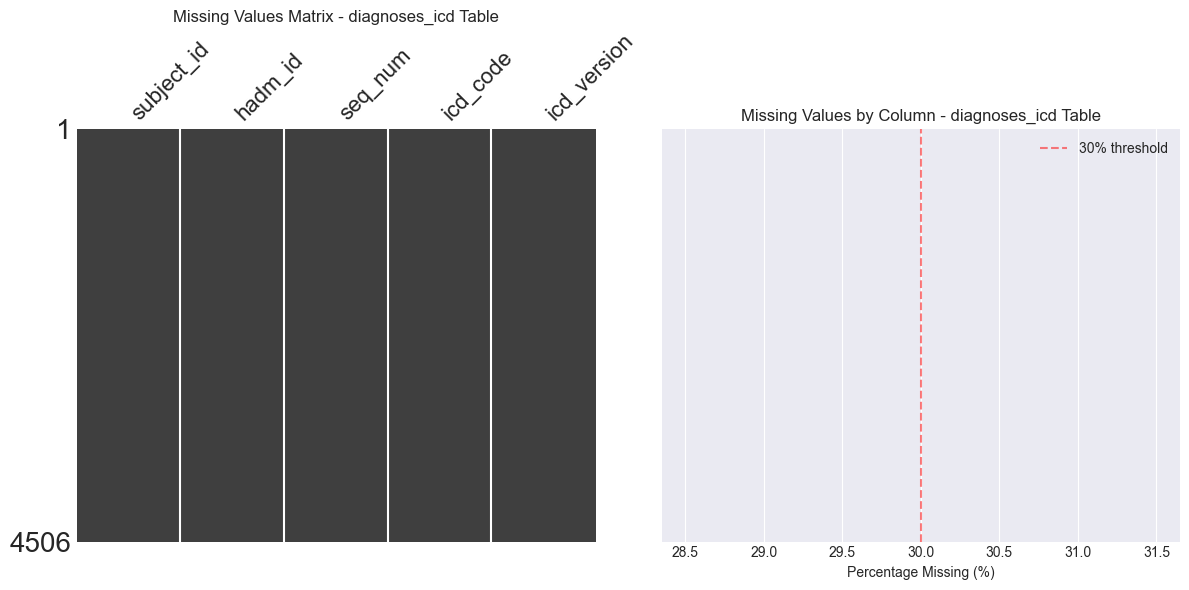


Missing Value Summary for diagnoses_icd Table:
Total rows: 4506
Total columns: 5
Columns with missing values: 0
Total missing cells: 0
Percentage missing: 0.00%
Missing:  subject_id     0
hadm_id        0
seq_num        0
icd_code       0
icd_version    0
dtype: int64


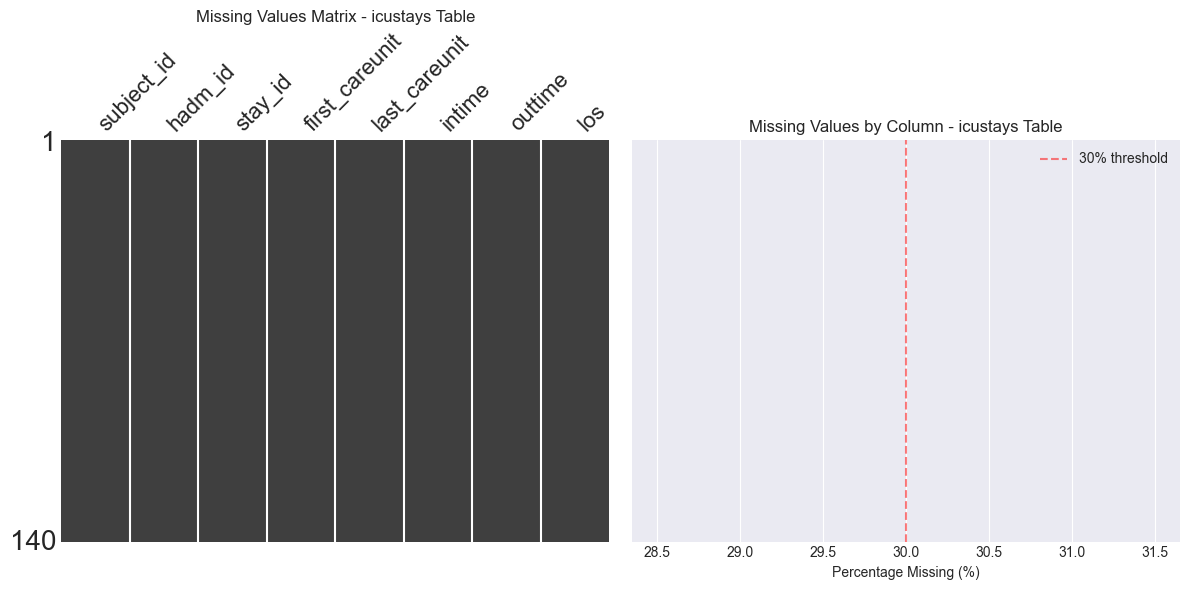


Missing Value Summary for icustays Table:
Total rows: 140
Total columns: 8
Columns with missing values: 0
Total missing cells: 0
Percentage missing: 0.00%
Missing:  subject_id        0
hadm_id           0
stay_id           0
first_careunit    0
last_careunit     0
intime            0
outtime           0
los               0
dtype: int64


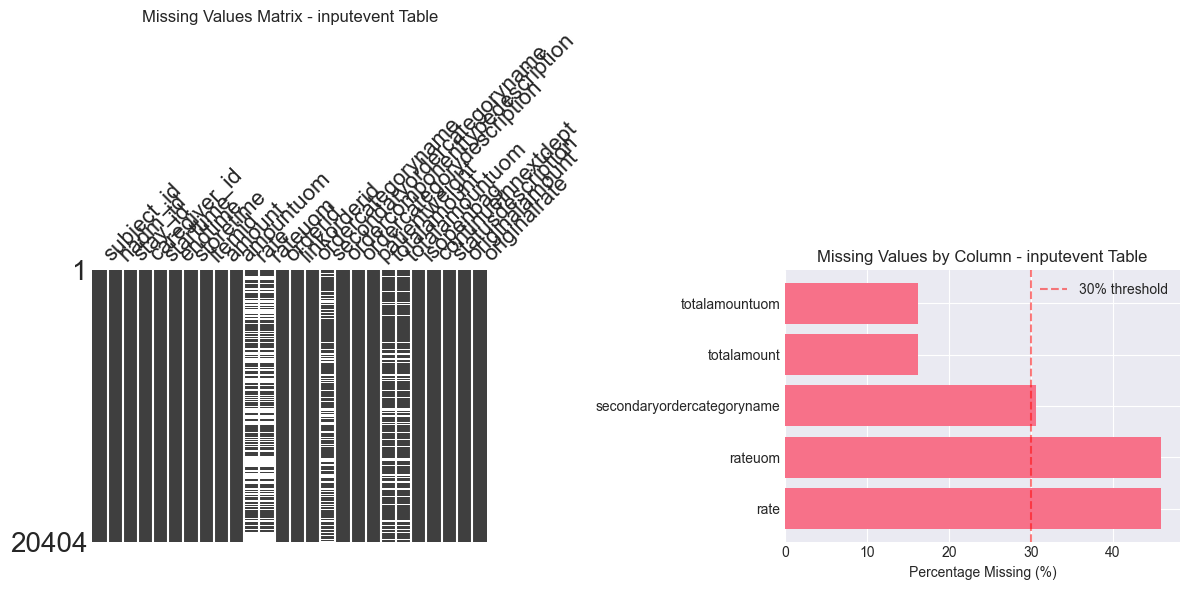


Missing Value Summary for inputevent Table:
Total rows: 20404
Total columns: 26
Columns with missing values: 5
Total missing cells: 31618
Percentage missing: 5.96%
Missing:  subject_id                          0
hadm_id                             0
stay_id                             0
caregiver_id                        0
starttime                           0
endtime                             0
storetime                           0
itemid                              0
amount                              0
amountuom                           0
rate                             9366
rateuom                          9366
orderid                             0
linkorderid                         0
ordercategoryname                   0
secondaryordercategoryname       6260
ordercomponenttypedescription       0
ordercategorydescription            0
patientweight                       0
totalamount                      3314
totalamountuom                   3312
isopenbag                  

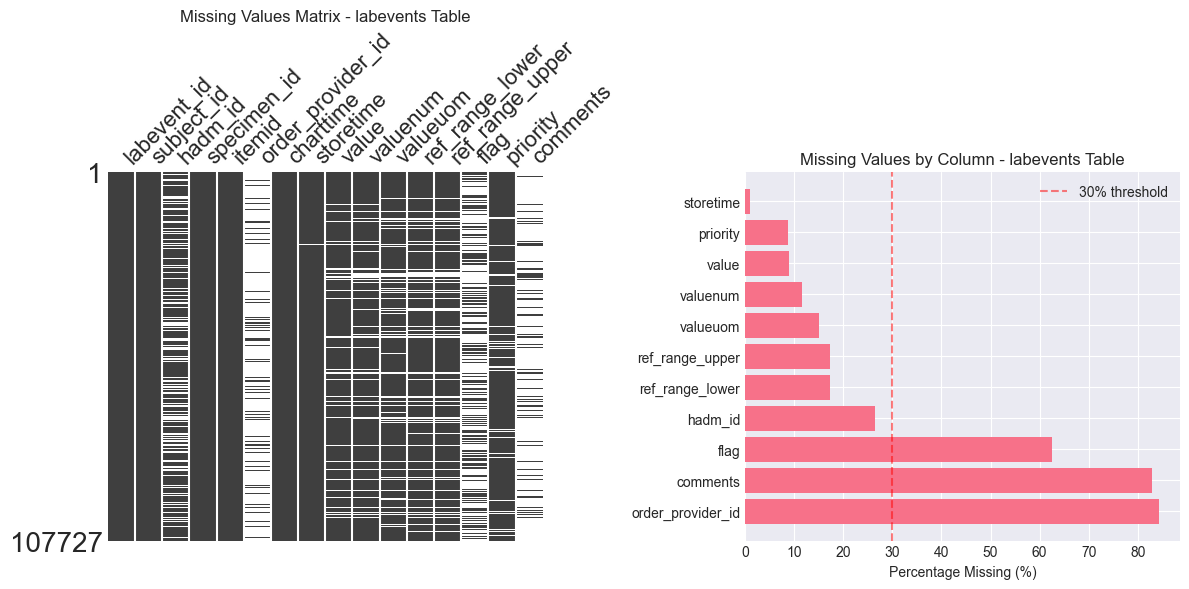


Missing Value Summary for labevents Table:
Total rows: 107727
Total columns: 16
Columns with missing values: 11
Total missing cells: 362091
Percentage missing: 21.01%
Missing:  labevent_id              0
subject_id               0
hadm_id              28420
specimen_id              0
itemid                   0
order_provider_id    90897
charttime                0
storetime              992
value                 9588
valuenum             12481
valueuom             16203
ref_range_lower      18728
ref_range_upper      18728
flag                 67452
priority              9329
comments             89273
dtype: int64


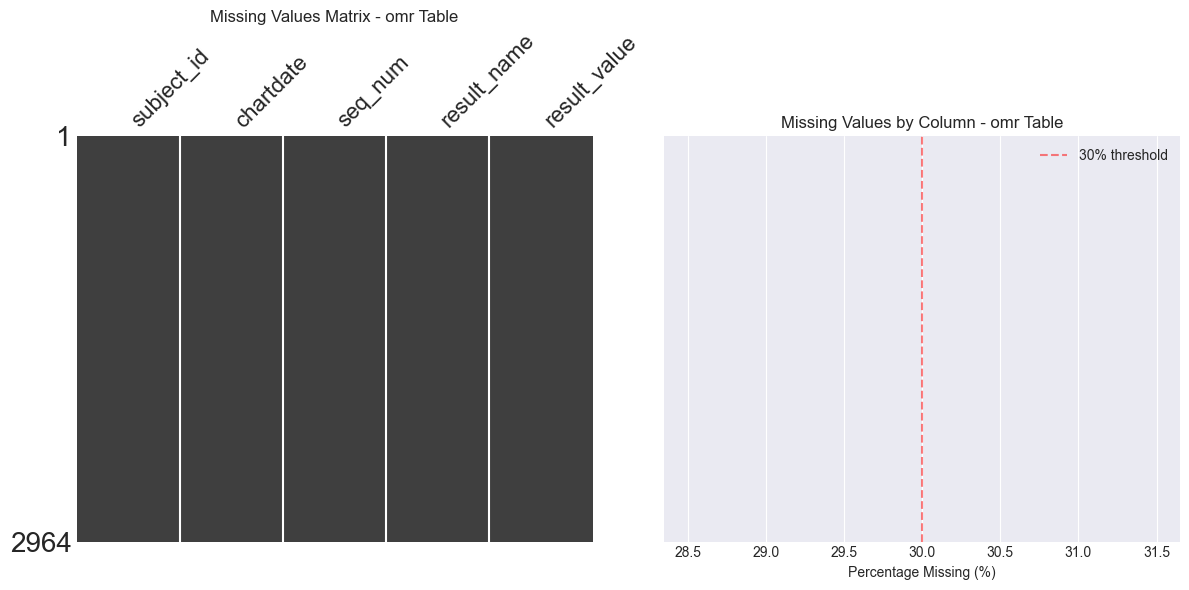


Missing Value Summary for omr Table:
Total rows: 2964
Total columns: 5
Columns with missing values: 0
Total missing cells: 0
Percentage missing: 0.00%
Missing:  subject_id      0
chartdate       0
seq_num         0
result_name     0
result_value    0
dtype: int64


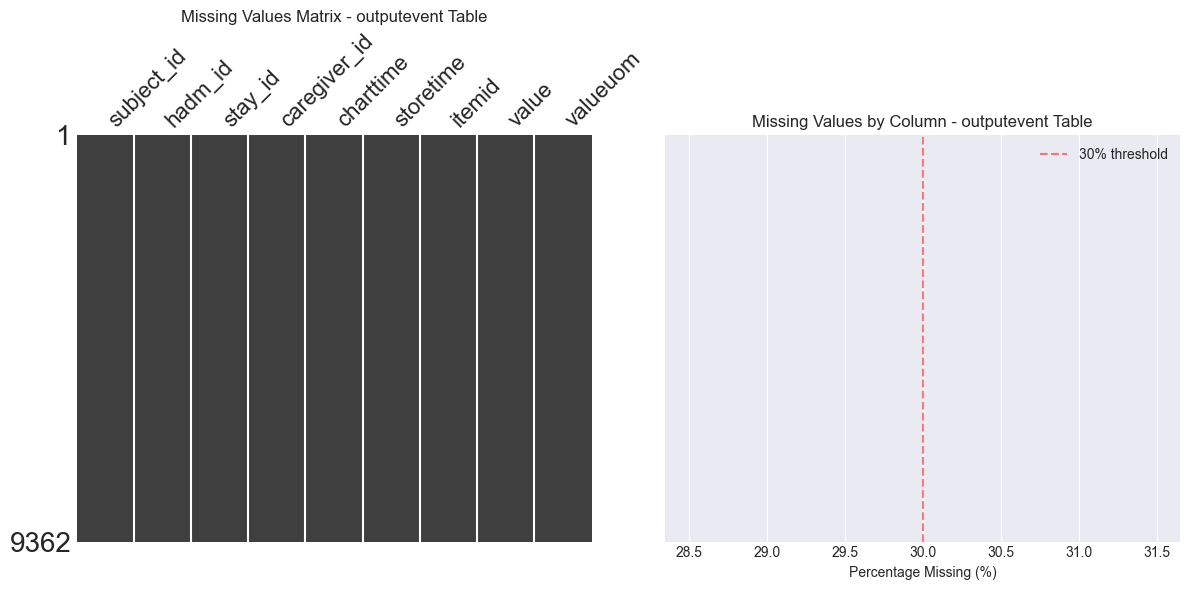


Missing Value Summary for outputevent Table:
Total rows: 9362
Total columns: 9
Columns with missing values: 0
Total missing cells: 0
Percentage missing: 0.00%
Missing:  subject_id      0
hadm_id         0
stay_id         0
caregiver_id    0
charttime       0
storetime       0
itemid          0
value           0
valueuom        0
dtype: int64


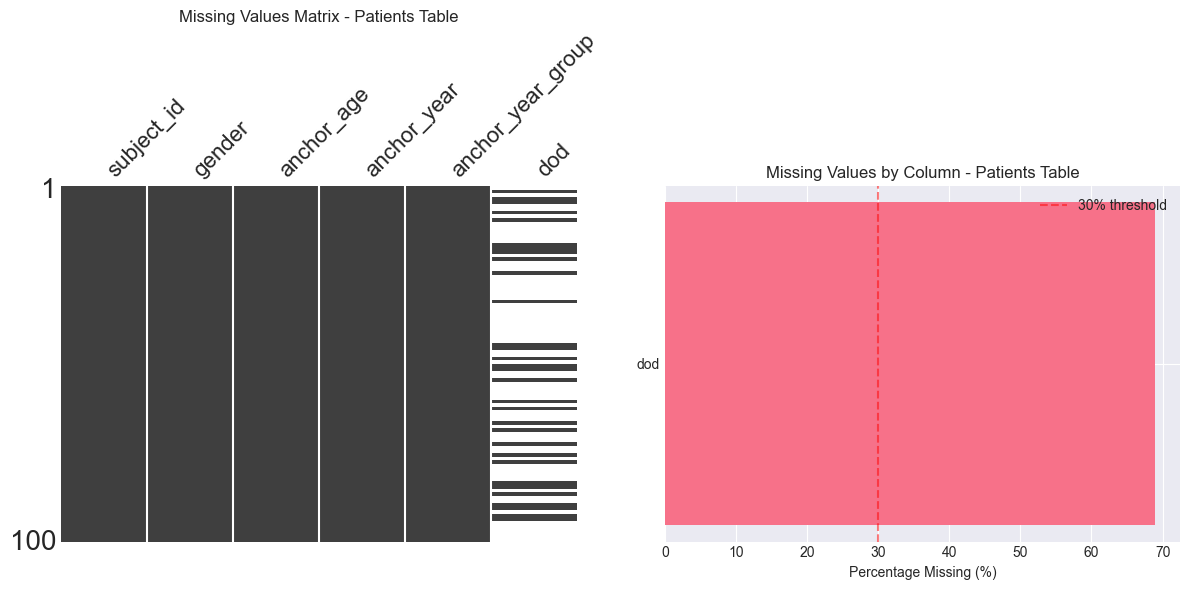


Missing Value Summary for Patients Table:
Total rows: 100
Total columns: 6
Columns with missing values: 1
Total missing cells: 69
Percentage missing: 11.50%
Missing:  subject_id            0
gender                0
anchor_age            0
anchor_year           0
anchor_year_group     0
dod                  69
dtype: int64


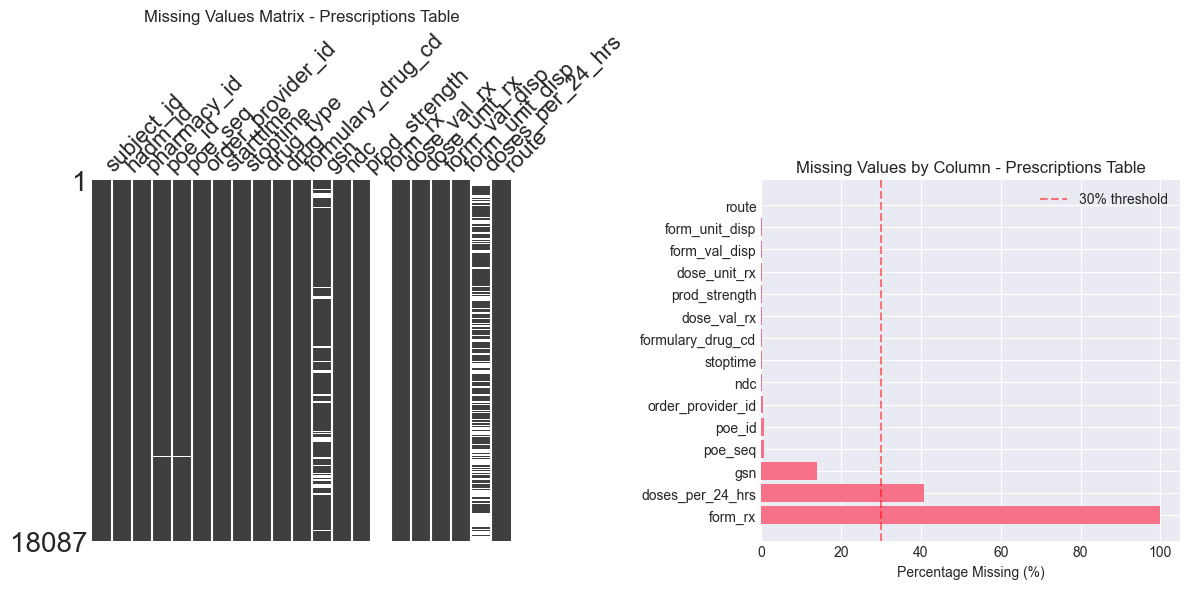


Missing Value Summary for Prescriptions Table:
Total rows: 18087
Total columns: 21
Columns with missing values: 15
Total missing cells: 28405
Percentage missing: 7.48%
Missing:  subject_id               0
hadm_id                  0
pharmacy_id              0
poe_id                 118
poe_seq                118
order_provider_id       94
starttime                0
stoptime                14
drug_type                0
drug                     0
formulary_drug_cd       12
gsn                   2519
ndc                     21
prod_strength            9
form_rx              18075
dose_val_rx              9
dose_unit_rx             9
form_val_disp            9
form_unit_disp           9
doses_per_24_hrs      7383
route                    6
dtype: int64


In [224]:
def visualize_missing_values(df, title, figsize=(12, 6)):
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    # Missing values matrix
    msno.matrix(df, ax=axes[0])
    axes[0].set_title(f'Missing Values Matrix - {title}')
    
    # Missing values bar chart
    missing_percent = df.isnull().sum() / len(df) * 100
    missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
    
    axes[1].barh(range(len(missing_percent)), missing_percent.values)
    axes[1].set_yticks(range(len(missing_percent)))
    axes[1].set_yticklabels(missing_percent.index)
    axes[1].set_xlabel('Percentage Missing (%)')
    axes[1].set_title(f'Missing Values by Column - {title}')
    axes[1].axvline(x=30, color='red', linestyle='--', alpha=0.5, label='30% threshold')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nMissing Value Summary for {title}:")
    print(f"Total rows: {len(df)}")
    print(f"Total columns: {df.shape[1]}")
    print(f"Columns with missing values: {df.isnull().any().sum()}")
    print(f"Total missing cells: {df.isnull().sum().sum()}")
    print(f"Percentage missing: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")
    print("Missing: ",df.isnull().sum())
    
    return missing_percent

# Visualize missing values for key tables

print("MISSING VALUE ANALYSIS")
_=visualize_missing_values(admissions, 'Admission Table')
_=visualize_missing_values(chartevents, 'chartevents Table')
diagnosis_icd=visualize_missing_values(diagnoses_icd, 'diagnoses_icd Table')
icusa=visualize_missing_values(icustays, 'icustays Table')
_=visualize_missing_values(inputevent, 'inputevent Table')
_=visualize_missing_values(labevents, 'labevents Table')
_=visualize_missing_values(omr, 'omr Table')
_=visualize_missing_values(outputevent, 'outputevent Table')
_ = visualize_missing_values(patients, 'Patients Table')
__name__ = visualize_missing_values(prescriptions, 'Prescriptions Table')

In [225]:
print("PATIENTS TABLE ANALYSIS")


# Display basic info
print("BASIC INFO:")
print(f"Shape: {patients.shape}")
print(f"Columns: {list(patients.columns)}")

print("\nDATA TYPES:")
print(patients.dtypes)

print("\nMISSING VALUES:")
missing_patients = patients.isnull().sum()
print(missing_patients[missing_patients > 0])

print("\nNUMERIC COLUMNS STATISTICS:")
numeric_cols = patients.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print(patients[numeric_cols].describe())

print("\nCATEGORICAL COLUMNS UNIQUE VALUES:")
categorical_cols = patients.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_count = patients[col].nunique()
    print(f"  {col}: {unique_count} unique values")
    if unique_count <= 10:
        print(f"    Values: {patients[col].unique().tolist()}")

PATIENTS TABLE ANALYSIS
BASIC INFO:
Shape: (100, 6)
Columns: ['subject_id', 'gender', 'anchor_age', 'anchor_year', 'anchor_year_group', 'dod']

DATA TYPES:
subject_id            int64
gender               object
anchor_age            int64
anchor_year           int64
anchor_year_group    object
dod                  object
dtype: object

MISSING VALUES:
dod    69
dtype: int64

NUMERIC COLUMNS STATISTICS:
         subject_id  anchor_age  anchor_year
count  1.000000e+02   100.00000   100.000000
mean   1.001878e+07    61.75000  2148.680000
std    1.115115e+04    16.16979    25.629008
min    1.000003e+07    21.00000  2110.000000
25%    1.000889e+07    51.75000  2129.000000
50%    1.001909e+07    63.00000  2145.500000
75%    1.002550e+07    72.00000  2172.500000
max    1.004002e+07    91.00000  2201.000000

CATEGORICAL COLUMNS UNIQUE VALUES:
  gender: 2 unique values
    Values: ['F', 'M']
  anchor_year_group: 2 unique values
    Values: ['2011 - 2013', '2014 - 2016']
  dod: 31 unique values

PATIENTS TABLE - VISUALIZATION

Gender Distribution:
  M: 57 (57.0%)
  F: 43 (43.0%)

Age Statistics:
  Min: 21
  Max: 91
  Mean: 61.8
  Median: 63.0


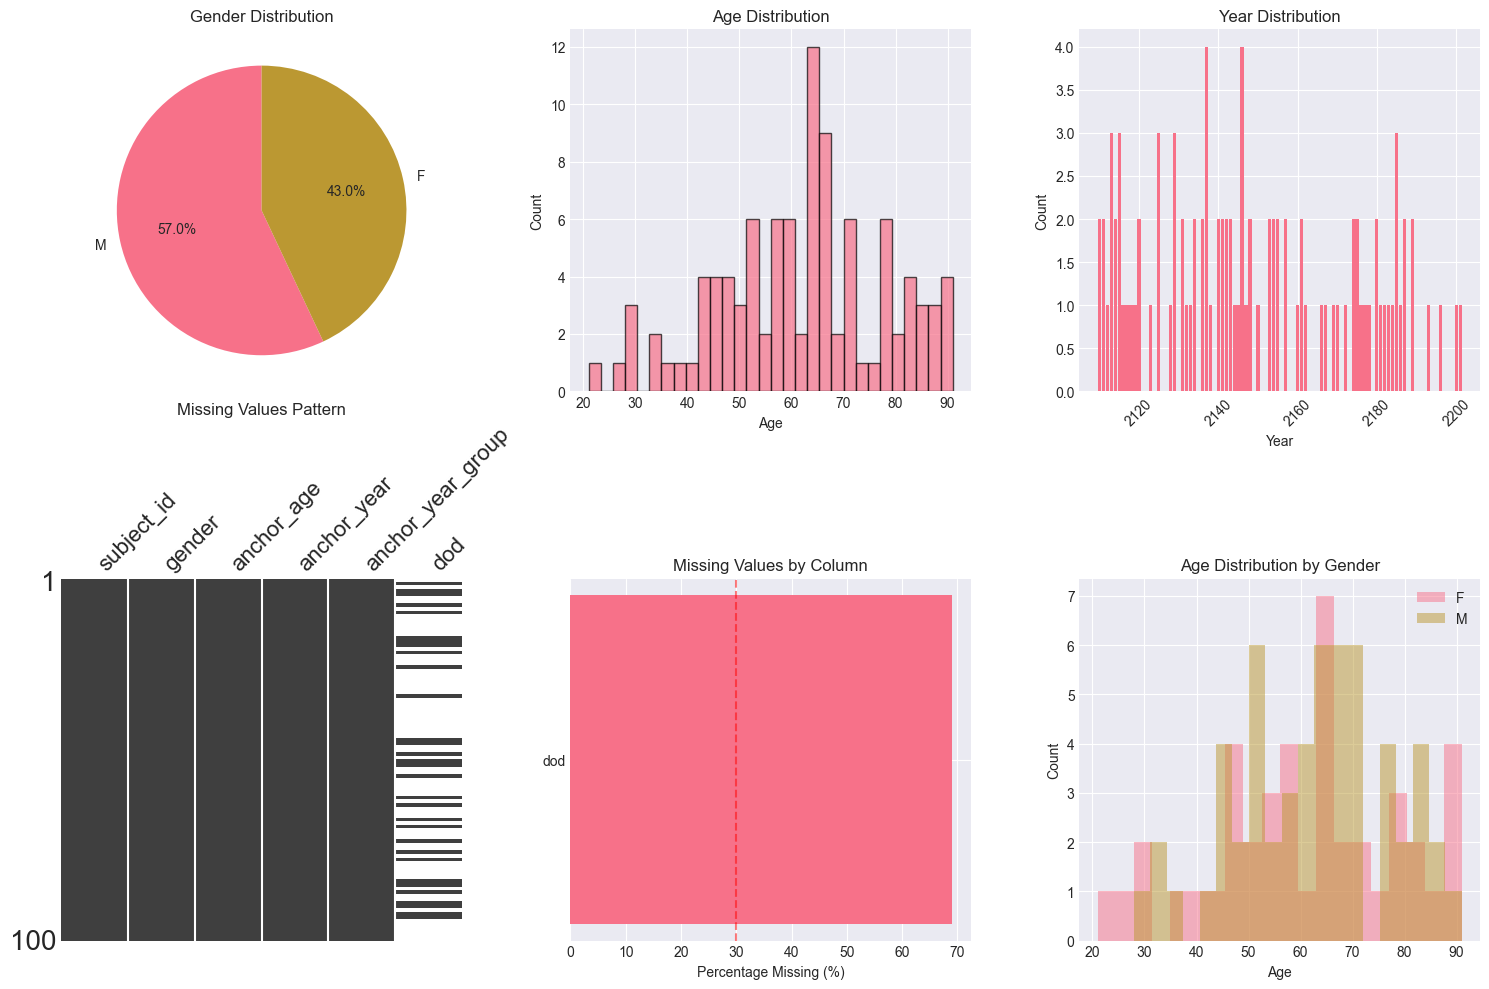

In [226]:
print("PATIENTS TABLE - VISUALIZATION")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# 1. Gender distribution
if 'gender' in patients.columns:
    gender_counts = patients['gender'].value_counts()
    axes[0, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0, 0].set_title('Gender Distribution')
    print(f"\nGender Distribution:")
    for gender, count in gender_counts.items():
        print(f"  {gender}: {count} ({count/len(patients)*100:.1f}%)")

# 2. Age distribution
if 'anchor_age' in patients.columns:
    axes[0, 1].hist(patients['anchor_age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Age Distribution')
    axes[0, 1].set_xlabel('Age')
    axes[0, 1].set_ylabel('Count')
    
    print(f"\nAge Statistics:")
    age_data = patients['anchor_age'].dropna()
    print(f"  Min: {age_data.min()}")
    print(f"  Max: {age_data.max()}")
    print(f"  Mean: {age_data.mean():.1f}")
    print(f"  Median: {age_data.median()}")

# 3. Year distribution
if 'anchor_year' in patients.columns:
    year_counts = patients['anchor_year'].value_counts().sort_index()
    axes[0, 2].bar(year_counts.index, year_counts.values)
    axes[0, 2].set_title('Year Distribution')
    axes[0, 2].set_xlabel('Year')
    axes[0, 2].set_ylabel('Count')
    axes[0, 2].tick_params(axis='x', rotation=45)
# The tick_params method is used to change the appearance of ticks, tick labels, and gridlines
# 4. Missing values matrix
axes[1, 0].set_title('Missing Values Pattern')
msno.matrix(patients, ax=axes[1, 0])

# 5. Missing values bar chart
missing_percent = (patients.isnull().sum() / len(patients) * 100).sort_values(ascending=False)
missing_percent = missing_percent[missing_percent > 0]
if len(missing_percent) > 0:
    axes[1, 1].barh(range(len(missing_percent)), missing_percent.values)
    axes[1, 1].set_yticks(range(len(missing_percent)))
    axes[1, 1].set_yticklabels(missing_percent.index)
    axes[1, 1].set_xlabel('Percentage Missing (%)')
    axes[1, 1].set_title('Missing Values by Column')
    axes[1, 1].axvline(x=30, color='red', linestyle='--', alpha=0.5)
else:
    axes[1, 1].text(0.5, 0.5, 'No Missing Values!', ha='center', va='center', fontsize=12)
    axes[1, 1].set_title('Missing Values by Column')

# 6. Age vs Gender
if all(col in patients.columns for col in ['anchor_age', 'gender']):
    gender_age_data = []
    for gender in patients['gender'].unique():
        gender_data = patients[patients['gender'] == gender]['anchor_age'].dropna()
        axes[1, 2].hist(gender_data, bins=20, alpha=0.5, label=gender)
    axes[1, 2].set_title('Age Distribution by Gender')
    axes[1, 2].set_xlabel('Age')
    axes[1, 2].set_ylabel('Count')
    axes[1, 2].legend()

plt.tight_layout()
plt.show()

In [227]:
patients.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subject_id         100 non-null    int64 
 1   gender             100 non-null    object
 2   anchor_age         100 non-null    int64 
 3   anchor_year        100 non-null    int64 
 4   anchor_year_group  100 non-null    object
 5   dod                31 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [228]:
patients.isnull().sum()

subject_id            0
gender                0
anchor_age            0
anchor_year           0
anchor_year_group     0
dod                  69
dtype: int64

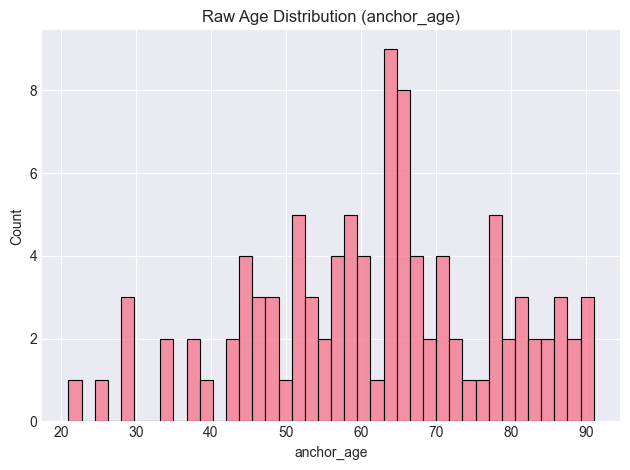

In [229]:
# plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(patients['anchor_age'], bins=40)
plt.title("Raw Age Distribution (anchor_age)")
plt.tight_layout()
plt.show()

In [230]:
patients = patients.drop(columns=[
    'anchor_year',
    'anchor_year_group'
], errors='ignore')


In [231]:
patients['age'] = patients['anchor_age']
patients = patients.drop(columns=['anchor_age'])


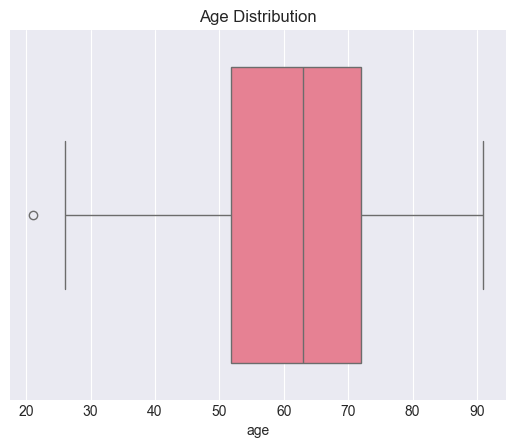

In [232]:
sns.boxplot(x=patients['age'])
plt.title("Age Distribution")
plt.show()


In [233]:
patients['age'] = patients['age'].clip(lower=18, upper=90)


In [234]:
def age_group(age):
    if age < 18:
        return 'child'
    elif age < 40:
        return 'adult'
    elif age < 60:
        return 'middle_aged'
    else:
        return 'elderly'

patients['age_group'] = patients['age'].apply(age_group)


In [235]:
patients['gender_encoded'] = patients['gender'].map({
    'M': 1,
    'F': 0
})


In [236]:
patients['gender_encoded'].isna().sum()


np.int64(0)

In [237]:
patients['is_dead'] = patients['dod'].notna().astype(int)
# dod          is_dead
# --------------------
# 2015-04-10     1
# NaN            0
# NaN            0
# 2012-09-21     1

In [238]:
patients = patients.drop(columns=['dod'])


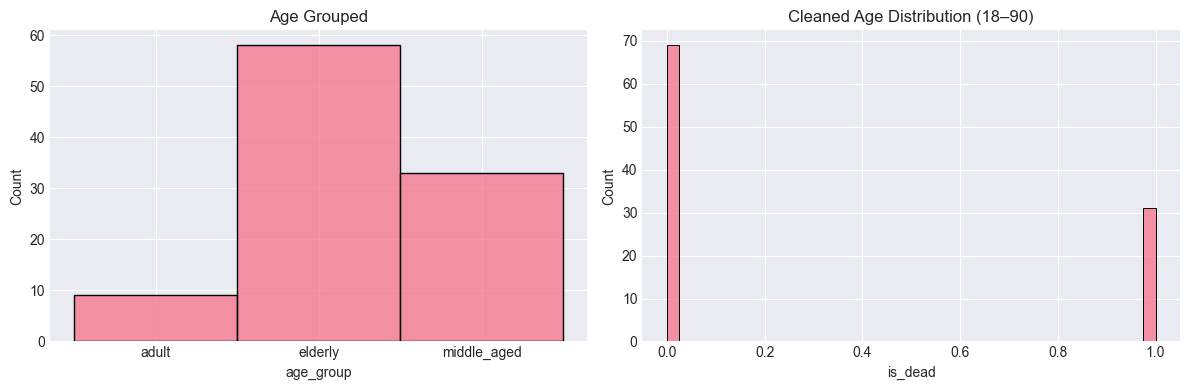

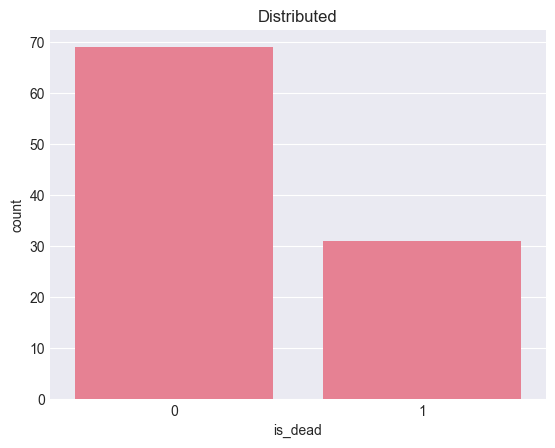

In [239]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(patients['age_group'], bins=40, ax=axes[0])
axes[0].set_title("Age Grouped")

sns.histplot(patients['is_dead'], bins=40, ax=axes[1])
axes[1].set_title("Cleaned Age Distribution (18–90)")

plt.tight_layout()
plt.show()
sns.countplot(data=patients,x="is_dead")
plt.title("Distributed");
plt.show()

In [240]:
patients_final = patients[[
    'subject_id',
    'age',
    'age_group',
    'gender_encoded',
    'is_dead'
]]
# Done with patients 

In [241]:
admissions= pd.read_csv('E:/AI_NutriCare/Data/Raw/admissions.csv')

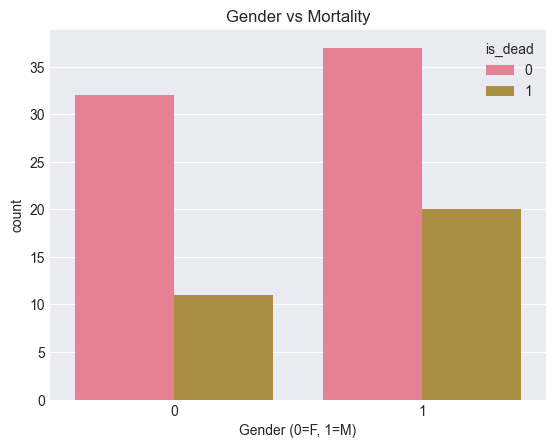

In [242]:

sns.countplot(
    data=patients_final,
    x='gender_encoded',
    hue='is_dead'
)
plt.title("Gender vs Mortality")
plt.xlabel("Gender (0=F, 1=M)")
plt.show()


In [243]:
patients_final.info()
patients_final.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   subject_id      100 non-null    int64 
 1   age             100 non-null    int64 
 2   age_group       100 non-null    object
 3   gender_encoded  100 non-null    int64 
 4   is_dead         100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


subject_id  age    age_group  gender_encoded  is_dead
0    10014729   21        adult               0        0
1    10003400   72      elderly               0        1
2    10002428   80      elderly               0        0
3    10032725   38        adult               0        1
4    10027445   48  middle_aged               0        1

In [244]:
patients_final.to_csv('patients_Final.csv', index=False)

Go for the Admission


In [245]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject_id            275 non-null    int64 
 1   hadm_id               275 non-null    int64 
 2   admittime             275 non-null    object
 3   dischtime             275 non-null    object
 4   deathtime             15 non-null     object
 5   admission_type        275 non-null    object
 6   admit_provider_id     275 non-null    object
 7   admission_location    275 non-null    object
 8   discharge_location    233 non-null    object
 9   insurance             275 non-null    object
 10  language              275 non-null    object
 11  marital_status        263 non-null    object
 12  race                  275 non-null    object
 13  edregtime             182 non-null    object
 14  edouttime             182 non-null    object
 15  hospital_expire_flag  275 non-null    in

In [246]:
admissions.isnull().sum()

subject_id                0
hadm_id                   0
admittime                 0
dischtime                 0
deathtime               260
admission_type            0
admit_provider_id         0
admission_location        0
discharge_location       42
insurance                 0
language                  0
marital_status           12
race                      0
edregtime                93
edouttime                93
hospital_expire_flag      0
dtype: int64

In [247]:
cat_fill = [
    'discharge_location',
    'marital_status'
]

for col in cat_fill:
    admissions[col] = admissions[col].fillna("UNKNOWN")
# filling with unknown 

In [248]:
admissions['edregtime'] = pd.to_datetime(admissions['edregtime'])
admissions['edouttime'] = pd.to_datetime(admissions['edouttime'])


In [249]:
admissions = admissions.drop(columns=[
    'admit_provider_id',
    'language'
])
# Including language can introduce socio-demographic bias into medical predictions.

In [250]:
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])


In [251]:
admissions['hospital_los'] = (
    admissions['dischtime'] - admissions['admittime']
).dt.total_seconds() / (24 * 3600)
# This feature captures hospitalization duration and serves as an important indicator of patient severity and healthcare resource utilization.

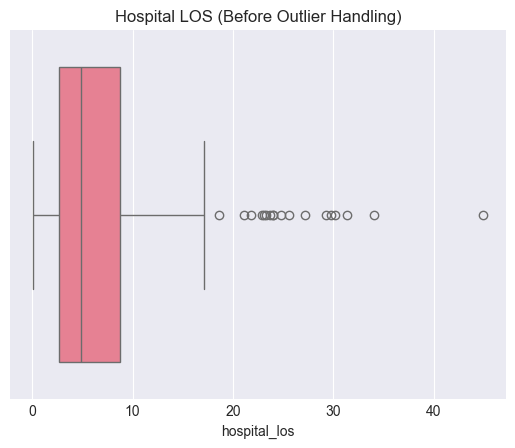

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=admissions['hospital_los'])
plt.title("Hospital LOS (Before Outlier Handling)")
plt.show()


In [253]:
admissions_before = admissions.copy()


In [254]:
admissions_after = admissions_before[
    (admissions_before['hospital_los'] >= 0.5) &
    (admissions_before['hospital_los'] <= 60)
]


In [255]:
admissions_before.shape
admissions_after.shape


(263, 15)

In [256]:
admissions_before['hospital_los'].min(), admissions_before['hospital_los'].max()


(np.float64(0.04652777777777778), np.float64(44.92777777777778))

In [257]:
admissions['is_emergency'] = admissions['admission_type'].isin([
    'URGENT', 'EW EMER.', 'DIRECT EMER.'
]).astype(int)
# admission_type   is_emergency
# URGENT               1
# ELECTIVE             0
# (Emergency Ward)EW EMER.             1
# DIRECT EMER.         1
# NEWBORN              0

In [258]:
admissions['ed_los'] = (
    admissions['edouttime'] - admissions['edregtime']
).dt.total_seconds() / 3600
# This line is calculating ED Length of Stay (ED-LOS) — 
# how long a patient spent in the Emergency Department, measured in hours.
# for hospital_los
# Total time spent in the hospital
# From admission to discharge



In [259]:
admissions['hospital_expire_flag'].value_counts()


hospital_expire_flag
0    260
1     15
Name: count, dtype: int64

In [260]:
admissions['ed_los'] = admissions['ed_los'].fillna(0)


In [261]:
admissions_final = admissions[[
    'subject_id',
    'hadm_id',
    'admission_type',
    'is_emergency',
    'admission_location',
    'discharge_location',
    'insurance',
    'marital_status',
    'race',
    'hospital_los',
    'ed_los',
    'hospital_expire_flag'
]]
# final addmission ready 

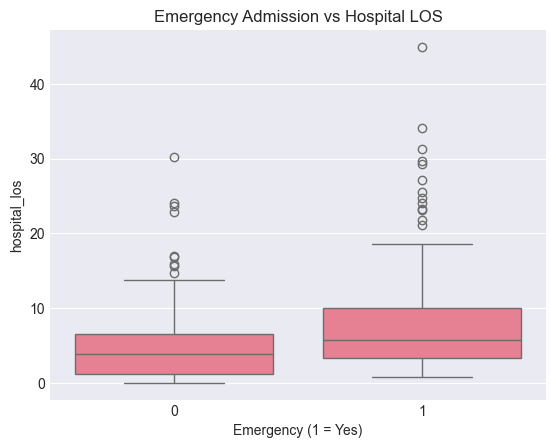

In [262]:
sns.boxplot(
    data=admissions_final,
    x='is_emergency',
    y='hospital_los'
)
plt.title("Emergency Admission vs Hospital LOS")
plt.xlabel("Emergency (1 = Yes)")
plt.show()


In [263]:
admissions_final.describe()

subject_id       hadm_id  is_emergency  hospital_los      ed_los  \
count  2.750000e+02  2.750000e+02    275.000000    275.000000  275.000000   
mean   1.001890e+07  2.513055e+07      0.570909      6.875530    6.016182   
std    1.212777e+04  2.907533e+06      0.495849      6.733832    8.794184   
min    1.000003e+07  2.004459e+07      0.000000      0.046528    0.000000   
25%    1.000787e+07  2.258313e+07      0.000000      2.692014    0.000000   
50%    1.001808e+07  2.517230e+07      1.000000      4.852778    4.783333   
75%    1.002626e+07  2.767155e+07      1.000000      8.768403    7.600000   
max    1.004002e+07  2.997458e+07      1.000000     44.927778   74.333333   

       hospital_expire_flag  
count            275.000000  
mean               0.054545  
std                0.227505  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.000000

In [264]:
admissions_final.isnull().sum()
# race represent self_reported person white asian 

subject_id              0
hadm_id                 0
admission_type          0
is_emergency            0
admission_location      0
discharge_location      0
insurance               0
marital_status          0
race                    0
hospital_los            0
ed_los                  0
hospital_expire_flag    0
dtype: int64

In [265]:
admissions_final.to_csv('admissions_final.csv', index=False)

In [266]:
chartevents=pd.read_csv('E:/AI_NutriCare/Data/Raw/chartevents.csv')
chartevents.info()
# which contains time-series bedside measurements recorded in ICU.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668862 entries, 0 to 668861
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   subject_id    668862 non-null  int64  
 1   hadm_id       668862 non-null  int64  
 2   stay_id       668862 non-null  int64  
 3   caregiver_id  644622 non-null  float64
 4   charttime     668862 non-null  object 
 5   storetime     667703 non-null  object 
 6   itemid        668862 non-null  int64  
 7   value         648132 non-null  object 
 8   valuenum      257474 non-null  float64
 9   valueuom      162571 non-null  object 
 10  warning       667703 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 56.1+ MB


In [267]:
chartevents = chartevents[
    ['subject_id', 'hadm_id', 'stay_id', 'charttime', 'itemid', 'valuenum']
]
# Why we drop others
#  value → text, inconsistent
#  valueuom → unit handling is complex
#  caregiver_id → irrelevant
#  warning, storetime → not predictive

In [268]:
chartevents = chartevents[
    ['subject_id', 'hadm_id', 'stay_id', 'charttime', 'itemid', 'valuenum']
]
# Column	Purpose
# subject_id	Patient identifier
# hadm_id	Hospital admission
# stay_id	ICU stay
# charttime	Time of measurement
# itemid	Measurement type (e.g., heart rate)
# valuenum	Numeric value

In [269]:
vital_keywords = {
    'heart_rate': ['heart rate'],
    'sbp': ['systolic'],
    'dbp': ['diastolic'],
    'map': ['mean arterial', 'map'],
    'resp_rate': ['respiratory rate'],
    'temperature': ['temperature'],
    'spo2': ['spo2', 'o2 saturation'],
    'gcs': ['gcs']
}
# itemid	vital
# 220045	heart_rate
# 220179	sbp
# 220181	dbp

In [270]:
vital_map = []

for vital, keywords in vital_keywords.items():
    mask = d_items['label'].str.contains('|'.join(keywords), case=False, na=False)
    temp = d_items[mask][['itemid']].copy()
    temp['vital'] = vital
    vital_map.append(temp)

vital_map = pd.concat(vital_map)
# Clinical reason
# ICU data has hundreds of item IDs
# We only care about core vital signs



In [271]:
vital_map

itemid       vital
2054  220047  heart_rate
2063  220046  heart_rate
2577  220045  heart_rate
2167  229669         sbp
2177  229899         sbp
...      ...         ...
1574  227011         gcs
1576  227012         gcs
1577  227014         gcs
2553  226755         gcs
2609  227013         gcs

[69 rows x 2 columns]

In [272]:
vitals = chartevents.merge(vital_map, on='itemid', how='inner')
pd.DataFrame(vitals)
# Joins the two tables using itemid
# Matches rows where itemid exists in both tables

subject_id   hadm_id   stay_id            charttime  itemid  valuenum  \
0        10005817  20626031  32604416  2132-12-16 00:00:00  223769     100.0   
1        10005817  20626031  32604416  2132-12-16 00:00:00  220047      55.0   
2        10005817  20626031  32604416  2132-12-16 00:00:00  220060      12.0   
3        10005817  20626031  32604416  2132-12-16 00:00:00  220046     120.0   
4        10005817  20626031  32604416  2132-12-16 00:00:00  220210      19.0   
...           ...       ...       ...                  ...     ...       ...   
99733    10019003  29279905  34107647  2153-03-28 02:57:00  223761      97.8   
99734    10019003  29279905  34107647  2153-03-28 02:57:00  220277      92.0   
99735    10019003  29279905  34107647  2153-03-28 02:57:00  220180      62.0   
99736    10019003  29279905  34107647  2153-03-28 02:57:00  220179     118.0   
99737    10019003  29279905  34107647  2153-03-30 17:57:00  224027       NaN   

             vital  
0             spo2  
1       heart_rate  
2              dbp  
3       heart_rate  
4        resp_rate  
...            ...  
99733  temperature  
99734         spo2  
99735          dbp  
99736          sbp  
99737  temperature  

[99738 rows x 7 columns]

In [273]:
vitals

subject_id   hadm_id   stay_id            charttime  itemid  valuenum  \
0        10005817  20626031  32604416  2132-12-16 00:00:00  223769     100.0   
1        10005817  20626031  32604416  2132-12-16 00:00:00  220047      55.0   
2        10005817  20626031  32604416  2132-12-16 00:00:00  220060      12.0   
3        10005817  20626031  32604416  2132-12-16 00:00:00  220046     120.0   
4        10005817  20626031  32604416  2132-12-16 00:00:00  220210      19.0   
...           ...       ...       ...                  ...     ...       ...   
99733    10019003  29279905  34107647  2153-03-28 02:57:00  223761      97.8   
99734    10019003  29279905  34107647  2153-03-28 02:57:00  220277      92.0   
99735    10019003  29279905  34107647  2153-03-28 02:57:00  220180      62.0   
99736    10019003  29279905  34107647  2153-03-28 02:57:00  220179     118.0   
99737    10019003  29279905  34107647  2153-03-30 17:57:00  224027       NaN   

             vital  
0             spo2  
1       heart_rate  
2              dbp  
3       heart_rate  
4        resp_rate  
...            ...  
99733  temperature  
99734         spo2  
99735          dbp  
99736          sbp  
99737  temperature  

[99738 rows x 7 columns]

In [274]:
icu = pd.read_csv("E:/AI_NUTRICARE/Data/Raw/icustays.csv")
icu['intime'] = pd.to_datetime(icu['intime'])
icu['outtime'] = pd.to_datetime(icu['outtime'])
vitals['charttime'] = pd.to_datetime(vitals['charttime'])
vitals = vitals.merge(
    icu[['stay_id', 'intime', 'outtime']],
    on='stay_id',
    how='inner'
)

vitals = vitals[
    (vitals['charttime'] >= vitals['intime']) &
    (vitals['charttime'] <= vitals['outtime'])
    # Keeps only the vitals that were measured while the patient was physically in the ICU
]
#  Using only hadm_id mixes multiple ICU stays
# Using stay_id keeps things clean

In [275]:
vital_bounds = {
    'heart_rate': (30, 220),
    'sbp': (60, 250),
    'dbp': (30, 150),
    'map': (40, 200),
    'resp_rate': (5, 60),
    'temperature': (30, 43),   # Celsius
    'spo2': (50, 100),
    'gcs': (3, 15)
}
# clean out impossible or erroneous measurements before analysis or modeling.
# dealing with the outliers 

In [276]:
for vital, (low, high) in vital_bounds.items():
    vitals.loc[vitals['vital'] == vital, 'valuenum'] = (
        vitals.loc[vitals['vital'] == vital, 'valuenum']
        .clip(lower=low, upper=high)
     )
# “We handled outliers in vital signs by clipping values to 
# clinically plausible ranges rather than removing observations. 
# This approach preserves temporal continuity of ICU measurements 
# while preventing extreme values from distorting the learning process.”

In [277]:
vitals = vitals.sort_values(['stay_id', 'charttime'])
vitals = vitals.set_index('charttime')#Pandas can only group by time windows if time is the index

hourly_vitals = (
    vitals
    .groupby(['stay_id', 'vital'])#on’t mix different patients
                                  #Don’t mix heart rate with BP
    .resample('1h')['valuenum']# .resample() works only on a DatetimeIndex
# 10:00–11:00
# 11:00–12:00
# 12:00–13:00
    .mean() # take the average in each hour 
    .reset_index()#Returns data to a normal tabular format agin:
)
# Heart rate, BP, etc. are recorded many times (every few minutes)
# Times are irregular      converted to this 
# 10:02 → HR = 80
# 10:07 → HR = 82------>10:00–11:00 → HR = average = 82.3
# 10:45 → HR = 85       11:00–12:00 → HR = average = 90
# 11:10 → HR = 90
# after doing this conversion then we will get 
# stay_id	vital	hour	avg_value
# 101	heart_rate	10:00	82.3
# 101	heart_rate	11:00	90.0


In [278]:
hourly_vitals = hourly_vitals.pivot_table(
    index=['stay_id', 'charttime'],
    columns='vital',
    values='valuenum'
).reset_index()

# Pivot = rows → columns
# What problem are we solving here?
# After hourly aggregation, our data looks like this (LONG format):
# stay_id | charttime | vital        | valuenum
# ------------------------------------------------
# 101     | 10:00     | heart_rate   | 82.3
# 101     | 10:00     | sbp          | 118.6
# 101     | 10:00     | spo2         | 97.0
# 101     | 11:00     | heart_rate   | 90.0
# 101     | 11:00     | sbp          | 121.2
# to this
# Each vital becomes its own column
# stay_id | charttime | heart_rate | sbp | spo2
# ------------------------------------------------
# 101     | 10:00     | 82         | 120 | 98


In [279]:
hourly_vitals = hourly_vitals.sort_values(['stay_id', 'charttime'])
# Ensures:
# Correct time order within each ICU stay
# Required for forward-fill to work properly
hourly_vitals = (
    hourly_vitals
    .groupby('stay_id')
    .apply(lambda x: x.ffill().bfill())#Copies the last known value forward
    #Copies the next known value backward
    .reset_index(drop=True)
)
# why both required ?
# ffill() handles gaps after first measurement
# bfill() handles gaps before first measurement
hourly_vitals = hourly_vitals.fillna(hourly_vitals.mean())
# This handles rare cases like:
# Entire vital missing for a stay
# First and last values missing
# Not every vital is measured every hour.
# so we do ffill and bfill
# The patient didn’t lose a heart rate at 11:00 —
# it just wasn’t recorded.

# Why not mean-fill directly?
# Mean filling:
# Ignores time
# Destroys trends
# Clinically unrealistic

In [280]:
valid_stays = (
    hourly_vitals
    .groupby('stay_id')
    .size()
    .loc[lambda x: x >= 12]   # at least 12 hours
    .index
)
hourly_vitals = hourly_vitals[hourly_vitals['stay_id'].isin(valid_stays)]


In [281]:
hourly_vitals

vital   stay_id           charttime         dbp  gcs  heart_rate  resp_rate  \
0      30057454 2171-11-14 10:00:00   66.000000  5.0  104.166667       18.0   
1      30057454 2171-11-14 11:00:00   63.666667  5.0  102.333333       20.0   
2      30057454 2171-11-14 12:00:00   56.000000  5.0  103.000000       21.0   
3      30057454 2171-11-14 13:00:00   64.000000  5.0  108.000000       23.0   
4      30057454 2171-11-14 14:00:00   67.000000  5.0  105.000000       18.0   
...         ...                 ...         ...  ...         ...        ...   
12085  39880770 2148-01-08 13:00:00   71.000000  5.0   78.000000       20.0   
12086  39880770 2148-01-08 14:00:00   65.000000  5.0   98.000000       11.0   
12087  39880770 2148-01-08 15:00:00   94.000000  5.0  105.000000       13.0   
12088  39880770 2148-01-08 16:00:00  102.000000  5.0   89.000000       12.0   
12089  39880770 2148-01-08 17:00:00   50.000000  5.0  101.000000       13.0   

vital    sbp        spo2  temperature  
0       99.0   94.166667         43.0  
1       94.0   94.666667         43.0  
2       86.0   92.000000         43.0  
3       99.0   95.000000         43.0  
4      102.0   94.000000         43.0  
...      ...         ...          ...  
12085  140.0  100.000000         43.0  
12086  140.0   98.000000         43.0  
12087  138.0   98.000000         43.0  
12088  151.0   94.000000         43.0  
12089  120.0   96.000000         43.0  

[12069 rows x 9 columns]

Patient demographics	✅
Admission context	✅
ICU structure	✅
ICU vitals (time-series)	✅

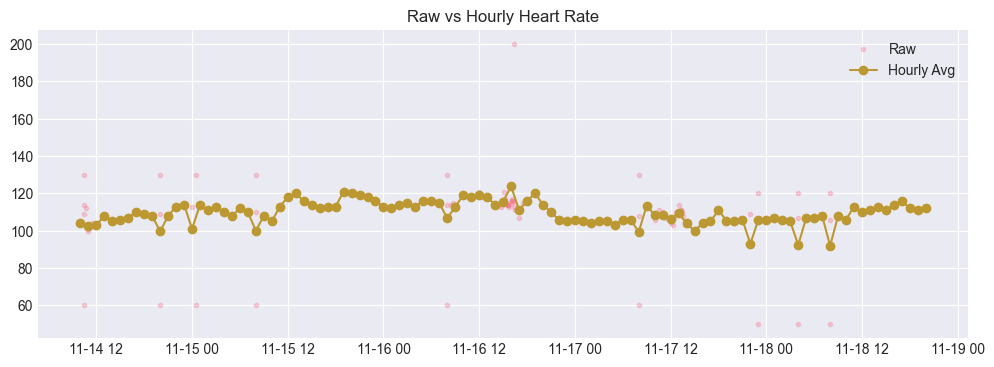

In [282]:
sample_stay = vitals['stay_id'].iloc[0]

raw_hr = vitals[
    (vitals['stay_id'] == sample_stay) &
    (vitals['vital'] == 'heart_rate')
]

hourly_hr = hourly_vitals[
    hourly_vitals['stay_id'] == sample_stay
]

plt.figure(figsize=(12,4))
plt.plot(raw_hr.index, raw_hr['valuenum'], '.', alpha=0.3, label='Raw')
plt.plot(hourly_hr['charttime'], hourly_hr['heart_rate'], '-o', label='Hourly Avg')
plt.legend()
plt.title("Raw vs Hourly Heart Rate")
plt.show()


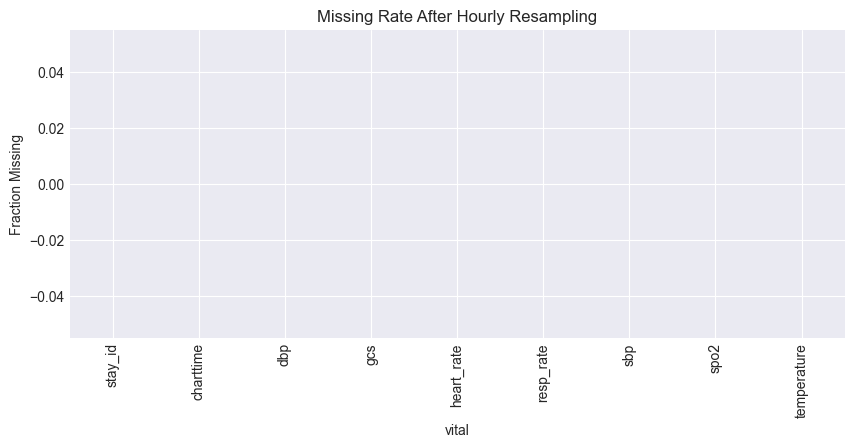

In [283]:
hourly_vitals.isna().mean().plot(kind='bar', figsize=(10,4))
plt.title("Missing Rate After Hourly Resampling")
plt.ylabel("Fraction Missing")
plt.show()


In [284]:

pd.DataFrame(labevents)
labevents = labevents[
    ['subject_id', 'hadm_id', 'itemid', 'charttime', 'valuenum']
]

labevents = labevents[labevents['valuenum'].notna()]
# Extract important lab tests and keep only those done during ICU stay
# itemid → which lab test
# charttime → when test was taken
# valuenum → numeric lab value (ML-ready)

# Keep only rows where the lab value (valuenum) is present

In [285]:

labevents = labevents.merge(
    d_labitems[['itemid', 'label']],
    on='itemid',
    how='left'
)


In [286]:
important_labs = {
    'glucose': ['glucose'],
    'creatinine': ['creatinine'],
    'bun': ['bun', 'urea'],
    'sodium': ['sodium'],
    'potassium': ['potassium'],
    'hemoglobin': ['hemoglobin'],
    'wbc': ['wbc', 'white blood'],
    'platelets': ['platelet'],

    # 🔽 NEW (mentor suggested)
    'lactate': ['lactate'],
    'ph': ['ph'],
    'cholesterol_total': ['cholesterol'],
    'hdl': ['hdl'],
    'ldl': ['ldl']
}

In [287]:
lab_map = []

for lab, keywords in important_labs.items():
    mask = labevents['label'].str.contains('|'.join(keywords), case=False, na=False)
    temp = labevents[mask].copy()
    temp['lab'] = lab
    lab_map.append(temp)

labs = pd.concat(lab_map)


In [288]:
icu['intime'] = pd.to_datetime(icu['intime'])
icu['outtime'] = pd.to_datetime(icu['outtime'])

labs['charttime'] = pd.to_datetime(labs['charttime'])

labs = labs.merge(
    icu[['stay_id', 'hadm_id', 'intime', 'outtime']],
    on='hadm_id',
    how='inner'
)

labs = labs[
    (labs['charttime'] >= labs['intime']) &
    (labs['charttime'] <= labs['outtime'])
]


In [289]:
lab_bounds = {
    'glucose': (40, 600),
    'creatinine': (0.2, 15),
    'bun': (1, 200),
    'sodium': (110, 180),
    'potassium': (2, 8),
    'hemoglobin': (3, 20),
    'wbc': (0.5, 50),
    'platelets': (5, 1000),

    # 🔽 NEW
    'lactate': (0.5, 20),
    'ph': (6.8, 7.8),
    'cholesterol_total': (50, 500),
    'hdl': (5, 150),
    'ldl': (5, 300)
}


In [290]:
for lab, (low, high) in lab_bounds.items():
    labs.loc[labs['lab'] == lab, 'valuenum'] = (
        labs.loc[labs['lab'] == lab, 'valuenum']
        .clip(lower=low, upper=high)
    )


In [291]:
lab_features = (
    labs
    .groupby(['stay_id', 'lab'])['valuenum']
    .agg(['mean', 'max', 'min'])
    .reset_index()
)
# using group by we will You get separate results for each group
# agg computes summary statistics (mean, max, min, etc.) for each group created by groupby.

In [292]:
lab_features = lab_features.pivot_table(
    index='stay_id',
    columns='lab',
    values=['mean', 'max', 'min']
)

lab_features.columns = [
    f"{stat}_{lab}" for stat, lab in lab_features.columns
]

lab_features = lab_features.reset_index()


In [293]:
lab_features.isna().mean()


stay_id                   0.000000
max_bun                   0.014388
max_cholesterol_total     0.942446
max_creatinine            0.014388
max_glucose               0.007194
max_hdl                   0.964029
max_hemoglobin            0.035971
max_lactate               0.244604
max_ldl                   0.956835
max_ph                    0.000000
max_platelets             0.050360
max_potassium             0.000000
max_sodium                0.007194
max_wbc                   0.043165
mean_bun                  0.014388
mean_cholesterol_total    0.942446
mean_creatinine           0.014388
mean_glucose              0.007194
mean_hdl                  0.964029
mean_hemoglobin           0.035971
mean_lactate              0.244604
mean_ldl                  0.956835
mean_ph                   0.000000
mean_platelets            0.050360
mean_potassium            0.000000
mean_sodium               0.007194
mean_wbc                  0.043165
min_bun                   0.014388
min_cholesterol_tota

In [294]:
lab_features = lab_features.fillna(lab_features.median())


In [295]:
lab_features

stay_id  max_bun  max_cholesterol_total  max_creatinine  max_glucose  \
0    30057454     58.0                  107.5             2.0        144.0   
1    30101877     26.0                  107.5             1.1        216.0   
2    30425410     20.0                  107.5             0.5        178.0   
3    30458995     11.0                  107.5             0.7        136.0   
4    30585761     37.0                  107.5             1.3         78.0   
..        ...      ...                    ...             ...          ...   
134  39635619     44.0                  123.0             3.8        125.0   
135  39711498     24.0                  107.5             0.9        140.0   
136  39804682     20.0                  107.5             1.3        419.0   
137  39864867    200.0                  107.5            15.0        190.0   
138  39880770     11.0                  107.5             0.7        162.0   

     max_hdl  max_hemoglobin  max_lactate  max_ldl  max_ph  ...  min_glucose  \
0       26.0            14.4          1.4     58.0    7.80  ...        106.0   
1       26.0            10.4         20.0     58.0    7.80  ...        153.0   
2       26.0            10.0          1.5     58.0    7.45  ...         81.0   
3       26.0            12.3          1.6     58.0    7.80  ...         95.0   
4       26.0            11.0          3.5     58.0    6.80  ...         78.0   
..       ...             ...          ...      ...     ...  ...          ...   
134     15.0            10.9         20.0     46.0    7.80  ...         73.0   
135     26.0             9.8         20.0     58.0    7.80  ...         64.0   
136     26.0            11.0          2.0     58.0    7.43  ...        257.0   
137     26.0             8.4          1.3     58.0    7.80  ...        150.0   
138     26.0            10.1          0.9     58.0    7.80  ...         98.0   

     min_hdl  min_hemoglobin  min_lactate  min_ldl  min_ph  min_platelets  \
0        5.0            13.1          0.6     58.0     6.8          185.0   
1        5.0             9.9         20.0     58.0     6.8          438.0   
2        5.0             8.5          0.8     58.0     6.8          330.0   
3        5.0            11.1          1.1     58.0     6.8          214.0   
4        5.0            11.0          1.3     58.0     6.8          172.0   
..       ...             ...          ...      ...     ...            ...   
134      8.2             5.1          0.7     46.0     6.8          173.0   
135      5.0             7.4          0.9     58.0     6.8          261.0   
136      5.0             8.9          2.0     58.0     6.8          158.0   
137      5.0             8.4          1.3     58.0     6.8          154.0   
138      5.0             7.6          0.7     58.0     6.8          168.0   

     min_potassium  min_sodium  min_wbc  
0              2.3       130.0     11.0  
1              4.5       135.0     19.8  
2              3.6       137.0      6.8  
3              3.5       134.0     12.7  
4              3.8       139.0     10.5  
..             ...         ...      ...  
134            3.3       142.0      5.9  
135            3.6       136.0      4.0  
136            3.9       134.0      7.6  
137            4.8       126.0     13.5  
138            3.6       136.0      7.2  

[139 rows x 40 columns]

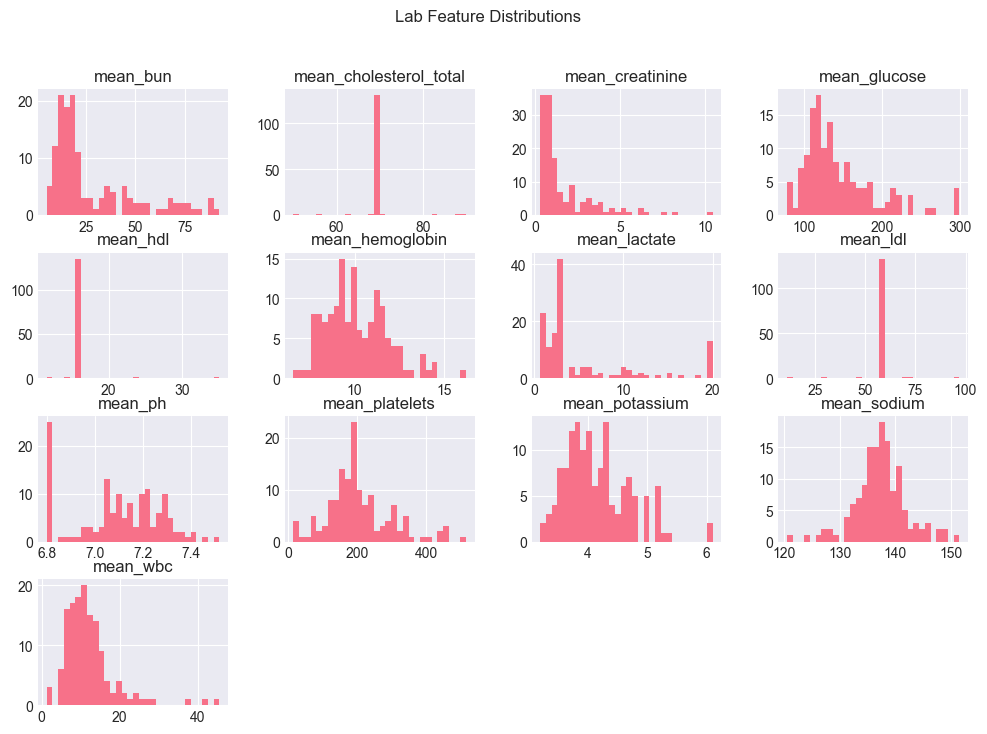

In [296]:
lab_cols = [c for c in lab_features.columns if 'mean' in c]

lab_features[lab_cols].hist(
    figsize=(12,8),
    bins=30
)
plt.suptitle("Lab Feature Distributions")
plt.show()


In [297]:
inputevent = inputevent[
    [
        'subject_id', 'hadm_id', 'stay_id',
        'itemid', 'amount', 'amountuom',
        'starttime', 'endtime'
    ]
]

inputevents = inputevent[inputevent['amount'].notna()]
# Keep only rows where amount is known
# Why we DON’T ffill/bfill input amounts
# Inputs are events, not continuous signals
# Carrying forward a drug dose would be clinically wrong

In [298]:
inputevents = inputevents.merge(
    d_items[['itemid', 'label']],
    on='itemid',
    how='left'
)

In [299]:
treatment_map = {
    'fluids': ['saline', 'ringer', 'plasmalyte', 'dextrose'],
    'vasopressor': ['norepinephrine', 'epinephrine', 'dopamine', 'vasopressin'],
    'insulin': ['insulin'],
    'antibiotic': ['vancomycin', 'cef', 'piperacillin', 'meropenem'],
    'sedative': ['propofol', 'midazolam', 'fentanyl']
}


In [300]:
treatments = []

for group, keywords in treatment_map.items():
    mask = inputevents['label'].str.contains('|'.join(keywords), case=False, na=False)
    temp = inputevents[mask].copy()
    temp['treatment'] = group
    treatments.append(temp)

treatments = pd.concat(treatments)
# Here:
# group → standardized treatment name
# (e.g., "iv_fluids", "insulin", "antibiotics")

# keywords → list of words that identify that treatment

# Example:

# treatment_map = {
#     'iv_fluids': ['saline', 'ringer'],
#     'insulin': ['insulin'],
#     'antibiotics': ['cef', 'penicillin']
# }
# What the final data looks like
# stay_id	label	amount	treatment
# 101	Normal Saline	500	iv_fluids
# 101	Insulin Lispro	10	insulin
# 102	Ceftriaxone	1	antibiotics

In [301]:
treatment_flags = (
    treatments
    .groupby(['stay_id', 'treatment'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

for col in treatment_flags.columns:
    if col != 'stay_id':
        treatment_flags[col] = (treatment_flags[col] > 0).astype(int)
# stay_id | iv_fluids | insulin | antibiotics
# -------------------------------------------
# 101     |     2     |    1    |      0
# 102     |     0     |    0    |      2

In [302]:
treatment_amounts = (
    treatments
    .groupby(['stay_id', 'treatment'])['amount']
    .sum()
    .unstack()#Convert rows into columns
    .add_prefix('total_')
    .reset_index()
)
# Earlier, we created binary flags:
# Did the patient receive insulin? → Yes / No
# Now we are answering:
# How much insulin / fluids / drugs did the patient receive?

# stay_id | total_iv_fluids | total_insulin | total_antibiotics
# ----------------------------------------------------------------
# 101     |      1500       |      12       |        0
# 102     |        0        |       0       |        6


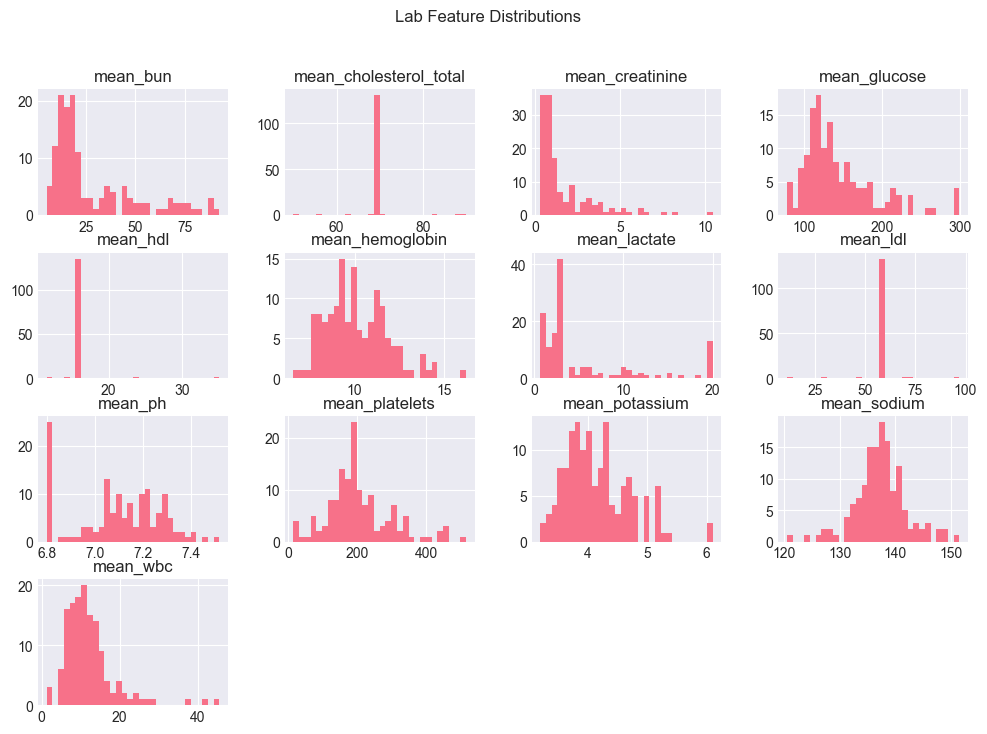

In [303]:
lab_cols = [c for c in lab_features.columns if 'mean' in c]

lab_features[lab_cols].hist(
    figsize=(12,8),
    bins=30
)
plt.suptitle("Lab Feature Distributions")
plt.show()


In [304]:
input_features = treatment_flags.merge(
    treatment_amounts,
    on='stay_id',
    how='left'
)

input_features = input_features.fillna(0)


In [305]:
input_features.head()
input_features.isna().sum()


treatment
stay_id              0
antibiotic           0
fluids               0
insulin              0
sedative             0
vasopressor          0
total_antibiotic     0
total_fluids         0
total_insulin        0
total_sedative       0
total_vasopressor    0
dtype: int64

patients	✅
admissions	✅
icustays	✅
chartevents (hourly vitals)	✅
labevents	✅
inputevents	✅

In [306]:
omr.info()
# Observation & Measurement Record

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964 entries, 0 to 2963
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subject_id    2964 non-null   int64 
 1   chartdate     2964 non-null   object
 2   seq_num       2964 non-null   int64 
 3   result_name   2964 non-null   object
 4   result_value  2964 non-null   object
dtypes: int64(2), object(3)
memory usage: 115.9+ KB


In [307]:
useful_omr = omr[
    omr['result_name'].str.contains(
        'weight|height|bmi|smoking|alcohol',
        case=False,
        na=False
    )
].copy()
# Keeps only rows where result_name mentions weight, height, BMI, smoking, or alcohol.
# na=False
# If result_name is missing → treat as not matching

In [308]:
useful_omr['result_name'] = useful_omr['result_name'].str.lower()


In [309]:
def map_omr(name):
    if 'weight' in name:
        return 'weight'
    elif 'height' in name:
        return 'height'
    elif 'bmi' in name:
        return 'bmi'
    elif 'smok' in name:
        return 'smoker'
    elif 'alcohol' in name:
        return 'alcohol'
    else:
        return None

useful_omr['feature'] = useful_omr['result_name'].apply(map_omr)
useful_omr = useful_omr.dropna(subset=['feature'])#remove ambigous record
# result_name            feature
# -------------------------------
# weight                 weight
# height (cm)            height
# bmi                    bmi
# smoking status          smoker
# alcohol use             alcohol


In [310]:
useful_omr['result_value'] = pd.to_numeric(
    useful_omr['result_value'],
    errors='coerce'
)
# errors coerce
# If conversion fails → replace with NaN
# "70"->70
# "170"->170
# "Yes"->NaN

In [311]:
useful_omr.loc[useful_omr['feature'] == 'smoker', 'result_value'] = (
    useful_omr['result_value'] > 0
).astype(int)

useful_omr.loc[useful_omr['feature'] == 'alcohol', 'result_value'] = (
    useful_omr['result_value'] > 0
).astype(int)
# feature   result_value
# ----------------------
# smoker    2
# smoker    0
# alcohol   1
# alcohol   0

# feature   result_value
# ----------------------
# smoker    1
# smoker    0
# alcohol   1
# alcohol   0
# But ML models work best with clear binary flags.




In [312]:
omr_features = (
    useful_omr
    .groupby(['subject_id', 'feature'])['result_value']
    .median()
    .unstack()
    .reset_index()
)


In [313]:
omr_features.isna().mean()


feature
subject_id    0.000000
bmi           0.114286
height        0.128571
weight        0.014286
dtype: float64

In [314]:
omr_features = omr_features.fillna({
    'weight': omr_features['weight'].median(),
    'height': omr_features['height'].median(),
    'bmi': omr_features['bmi'].median(),
    'smoker': 0,
    'alcohol': 0
})
# Done with outpatient medical report 
# why we not use bfill or ffill
# There is no time order
# ffill and bfill require a meaningful timeline
# Mean	Sensitive to outliers
# Median	 Robust & safe

In [315]:
outputevent = outputevent[
    ['subject_id', 'hadm_id', 'stay_id', 'itemid', 'charttime', 'value']
]

In [316]:
outputevent.isnull().sum()

subject_id    0
hadm_id       0
stay_id       0
itemid        0
charttime     0
value         0
dtype: int64

In [317]:
outputevent = outputevent.merge(
    d_items[['itemid', 'label']],
    on='itemid',
    how='left'
)
# What are outputevents (context)
# outputevents represent what comes OUT of the patient, such as:
# Urine output
# Drain output
# Stool output
# Why this merge is needed
# Before merge
# itemid | amount
# ------
# 40055  | 300

# itemid | label           | amount
# --------------------------------
# 40055  | Urine Output    | 300


In [318]:
urine = outputevent[
    outputevent['label'].str.contains(
        'urine',
        case=False,
        na=False
    )
].copy()


In [319]:
# Converts urine output values to numbers and removes invalid or missing entries.
urine['value'] = pd.to_numeric(urine['value'], errors='coerce')
urine = urine[urine['value'].notna()]
# Keeps only rows where urine volume is present
# Drops:
# Non-numeric
# Missing
# Invalid entries

In [320]:
icu['intime'] = pd.to_datetime(icu['intime'])
icu['outtime'] = pd.to_datetime(icu['outtime'])

urine['charttime'] = pd.to_datetime(urine['charttime'])

urine = urine.merge(
    icu[['stay_id', 'intime', 'outtime']],
    on='stay_id',
    how='inner'
)
urine = urine[
    (urine['charttime'] >= urine['intime']) &
    (urine['charttime'] <= urine['outtime'])
]
# Keeps:
# Urine outputs after ICU admission
# Urine outputs before ICU discharge
# Remove
# Pre-ICU urine measurements
# Post-ICU measurements

In [321]:
urine = urine.sort_values(['stay_id', 'charttime'])
urine = urine.set_index('charttime')

hourly_urine = (
    urine
    .groupby('stay_id')
    .resample('1h')['value']
    .sum()
    .reset_index()
)


In [322]:
urine_features = (
    hourly_urine
    .groupby('stay_id')['value']
    .agg(
        total_urine='sum',
        mean_hourly_urine='mean',
        min_hourly_urine='min'
    )
    .reset_index()
)


In [323]:
urine_features['low_urine_flag'] = (
    urine_features['mean_hourly_urine'] < 30
).astype(int)


In [324]:
urine_features

stay_id  total_urine  mean_hourly_urine  min_hourly_urine  low_urine_flag
0   30057454          100         100.000000               100               0
1   30458995         1700        1700.000000              1700               0
2   30665396          800         800.000000               800               0
3   31494479          675         675.000000               675               0
4   31959184          300         300.000000               300               0
5   32128372           75          75.000000                75               0
6   32155744          300         300.000000               300               0
7   32283063          700         700.000000               700               0
8   32359580           25          25.000000                25               1
9   32391858         1440          14.257426                 0               1
10  32453351         3030        3030.000000              3030               0
11  32554129          500         500.000000               500               0
12  32587226          150         150.000000               150               0
13  32604416          400         400.000000               400               0
14  33177122          225         225.000000               225               0
15  33348260         6370        6370.000000              6370               0
16  33558396          415         415.000000               415               0
17  34531557         2870        2870.000000              2870               0
18  34629895          410         410.000000               410               0
19  35258379          720         720.000000               720               0
20  35436337          390         390.000000               390               0
21  35514836          150         150.000000               150               0
22  35679826         1300        1300.000000              1300               0
23  36091287         1100        1100.000000              1100               0
24  36107367           60          60.000000                60               0
25  36427705          600         600.000000               600               0
26  36558922          650         650.000000               650               0
27  36753294        17275        1016.176471                 0               0
28  36893762         3000        3000.000000              3000               0
29  37293400          120         120.000000               120               0
30  37509585          200         200.000000               200               0
31  37648963          570         570.000000               570               0
32  38197705          195          12.187500                 0               1
33  38275267         1495        1495.000000              1495               0
34  38329661          900         900.000000               900               0
35  38383343        64410         175.027174                 0               0
36  38507547          720         720.000000               720               0
37  39084876          800         800.000000               800               0
38  39142259          880         880.000000               880               0
39  39497668          340         340.000000               340               0
40  39544395          700         700.000000               700               0
41  39880770         1000        1000.000000              1000               0

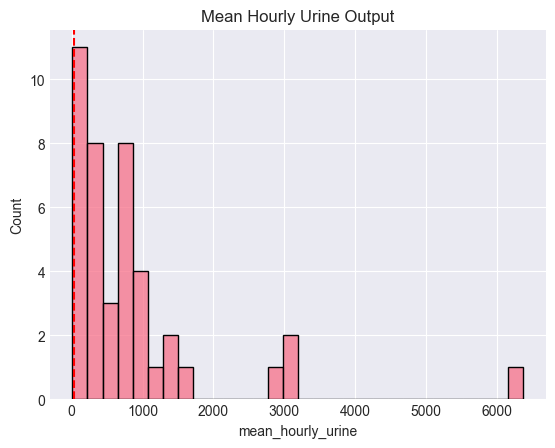

In [325]:
sns.histplot(urine_features['mean_hourly_urine'], bins=30)
plt.axvline(30, color='red', linestyle='--')
plt.title("Mean Hourly Urine Output")
plt.show()


“Urine output was extracted from output events, aligned to ICU stay intervals, resampled hourly, and summarized to capture renal function and fluid balance during critical care.”

In [326]:
prescriptions.isnull().sum()

subject_id               0
hadm_id                  0
pharmacy_id              0
poe_id                 118
poe_seq                118
order_provider_id       94
starttime                0
stoptime                14
drug_type                0
drug                     0
formulary_drug_cd       12
gsn                   2519
ndc                     21
prod_strength            9
form_rx              18075
dose_val_rx              9
dose_unit_rx             9
form_val_disp            9
form_unit_disp           9
doses_per_24_hrs      7383
route                    6
dtype: int64

Prescriptions = medication orders during hospital admission

In [327]:
prescriptions = prescriptions[
    [
        'subject_id',
        'hadm_id',
        'drug',
        'starttime',
        'stoptime'
    ]
]

prescriptions = prescriptions.dropna(subset=['drug'])
# Keeps only essential prescription columns and removes records where the drug name is missing.

In [328]:
prescriptions['drug'] = prescriptions['drug'].str.lower()


In [329]:
drug_groups = {
    'antibiotic': [
        'cef', 'vancomycin', 'piperacillin', 'meropenem',
        'amoxicillin', 'azithromycin'
    ],
    'insulin': ['insulin'],
    'steroid': ['hydrocortisone', 'prednisone', 'dexamethasone'],
    'sedative': ['propofol', 'midazolam', 'fentanyl'],
    'vasopressor': ['norepinephrine', 'epinephrine', 'dopamine']
}


In [330]:
def map_drug_group(drug):
    for group, keywords in drug_groups.items():
        if any(k in drug for k in keywords):
            return group
    return None

prescriptions['drug_group'] = prescriptions['drug'].apply(map_drug_group)
prescriptions = prescriptions.dropna(subset=['drug_group'])
# Why we need drug_groups
# In prescriptions data:
# Same class has many drug names
# Models don’t work well with hundreds of unique drugs
# So we collapse them into groups.

In [331]:

prescriptions = prescriptions.merge(
    icu[['hadm_id', 'stay_id']],
    on='hadm_id',
    how='inner'
)


In [332]:
presc_flags = (
    prescriptions
    .groupby(['stay_id', 'drug_group'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

for col in presc_flags.columns:
    if col != 'stay_id':
        presc_flags[col] = (presc_flags[col] > 0).astype(int)#convert binary flag 
# before unstack 
# stay_id | drug_group   | count
# --------------------------------
# 101     | antibiotic   | 3
# 101     | insulin      | 1
# 102     | vasopressor  | 2
# after
# stay_id | antibiotic | insulin | vasopressor | steroid | sedative
# ------------------------------------------------------------------
# 101     |     3      |    1    |      0      |    0    |    0
# 102     |     0      |    0    |      2      |    1    |    0



In [333]:
drug_count = (
    prescriptions
    .groupby('stay_id')['drug']
    .nunique()
    .reset_index(name='num_unique_drugs')
)


In [334]:
prescription_features = presc_flags.merge(
    drug_count,
    on='stay_id',
    how='left'
)

prescription_features = prescription_features.fillna(0)


In [335]:
prescription_features 
    

stay_id  antibiotic  insulin  sedative  steroid  vasopressor  \
0    30057454           1        0         0        0            1   
1    30101877           0        1         1        1            0   
2    30425410           0        1         1        0            0   
3    30458995           1        0         1        0            0   
4    30585761           0        1         0        0            0   
..        ...         ...      ...       ...      ...          ...   
117  39635619           1        0         1        0            1   
118  39711498           1        1         1        0            0   
119  39804682           1        1         0        0            0   
120  39864867           0        1         0        1            0   
121  39880770           1        1         1        0            0   

     num_unique_drugs  
0                   3  
1                   3  
2                   3  
3                   2  
4                   1  
..                ...  
117                 5  
118                 7  
119                 3  
120                 2  
121                 7  

[122 rows x 7 columns]

Prescription records were grouped into clinically meaningful medication classes and summarized per ICU stay using binary exposure indicators and medication diversity metrics to capture treatment intent during hospitalization.”

<!-- Dataset	Status
patients	✅
admissions	✅
icustays	✅
chartevents	✅
labevents	✅
inputevents	✅
omr	✅
outputevents	✅
prescriptions	✅ -->

Marging the dataset 

In [336]:
globals().keys()


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__vsc_ipynb_file__', '_i', '_ii', '_iii', '_i1', 'pd', 'np', 'plt', 'sns', 'px', 'go', 'stats', 'msno', 'warnings', '_i2', '_i3', 'admissions', 'chartevents', 'd_icd_diagnoses', 'd_items', 'd_labitems', 'diagnoses_icd', 'icustays', 'inputevent', 'labevents', 'omr', 'outputevent', 'patients', 'prescriptions', '_i4', 'visualize_missing_values', 'diagnosis_icd', 'icusa', '_i5', 'missing_patients', 'numeric_cols', 'categorical_cols', 'col', 'unique_count', '_i6', 'fig', 'axes', 'gender_counts', 'gender', 'count', 'age_data', 'year_counts', 'missing_percent', 'gender_age_data', 'gender_data', '_i7', '_i8', '_8', '_i9', '_i10', '_i11', '_i12', '_i13', '_i14', 'age_group', '_i15', '_i16', '_16', '_i17', '_i18', '_i19', '_i20', 'patients_final', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27'

In [337]:
# Convert times
icustays['intime'] = pd.to_datetime(icustays['intime'])
icustays['outtime'] = pd.to_datetime(icustays['outtime'])

# Length of ICU stay (days)
icustays['los'] = (
    icustays['outtime'] - icustays['intime']
).dt.total_seconds() / (24 * 3600)

# Remove invalid LOS
icustays = icustays[
    (icustays['los'] > 0) &
    (icustays['los'] <= 30)
]
# 30 days is a common clinical cutoff for ICU modeling.
# Long stay label (for modeling / analysis)
icustays['long_stay'] = (icustays['los'] >= 5).astype(int)
# 1 → ICU stay ≥ 5 days (long stay)
# 0 → ICU stay < 5 days
# Why 5 days?
# Clinically meaningful threshold
# FINAL ICU TABLE
icustays_final = icustays[[
    'subject_id',
    'hadm_id',
    'stay_id',
    'first_careunit',
    'last_careunit',
    'los',
    'long_stay'
]].copy()



In [338]:
master_static = icustays_final.copy()
# icustays_final (BACKBONE)
# Because ICU stay (stay_id) is the central unit of analysis for all outcomes and features.

In [339]:
master_static = master_static.merge(
    admissions_final,
    on='hadm_id',
    how='left'
)
# Merge admissions (via hadm_id)

In [340]:
# Keep ICU subject_id
master_static = master_static.rename(columns={
    'subject_id_x': 'subject_id'
})

# Drop the duplicate
master_static = master_static.drop(columns=['subject_id_y'])


In [341]:
patients_final=pd.read_csv("patients_Final.csv")
master_static = master_static.merge(
    patients_final,
    on='subject_id',
    how='left'
)
# # Merge patients (via subject_id)
# print(master_static.columns)
# print(patients_final.columns)


In [342]:
master_static = master_static.merge(
    omr_features,
    on='subject_id',
    how='left'
)
# Merge OMR (baseline health)

In [343]:
master_static = master_static.fillna({
    'weight': omr_features['weight'].median(),
    'height': omr_features['height'].median(),
    'bmi': omr_features['bmi'].median(),
    'smoker': 0,
    'alcohol': 0
})


In [344]:
master_static = master_static.merge(
    lab_features,
    on='stay_id',
    how='left'
)
# STEP 5: Merge LAB features (ICU severity)

In [345]:
lab_cols = lab_features.columns.drop('stay_id')
master_static[lab_cols] = master_static[lab_cols].fillna(
    master_static[lab_cols].median()
)
# fills lab safely

In [346]:
lab_cols = lab_features.columns.drop('stay_id')
master_static[lab_cols] = master_static[lab_cols].fillna(
    master_static[lab_cols].median()
)


In [347]:
# Merge input events

master_static = master_static.merge(
    input_features,
    on='stay_id',
    how='left'
).fillna(0)



In [348]:
master_static = master_static.merge(
    urine_features,
    on='stay_id',
    how='left'
).fillna(0)
# STEP 7: Merge OUTPUT EVENTS (urine output)

In [349]:
master_static = master_static.merge(
    prescription_features,
    on='stay_id',
    how='left'
).fillna(0)
# STEP 8: Merge PRESCRIPTIONS

In [350]:
master_static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 83 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   subject_id              140 non-null    int64  
 1   hadm_id                 140 non-null    int64  
 2   stay_id                 140 non-null    int64  
 3   first_careunit          140 non-null    object 
 4   last_careunit           140 non-null    object 
 5   los                     140 non-null    float64
 6   long_stay               140 non-null    int64  
 7   admission_type          140 non-null    object 
 8   is_emergency            140 non-null    int64  
 9   admission_location      140 non-null    object 
 10  discharge_location      140 non-null    object 
 11  insurance               140 non-null    object 
 12  marital_status          140 non-null    object 
 13  race                    140 non-null    object 
 14  hospital_los            140 non-null    fl

In [351]:
master_static.isnull().sum().sum()
# master_static = one row per ICU stay (summary)

np.int64(0)

In [352]:
master_static.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit',
       'los', 'long_stay', 'admission_type', 'is_emergency',
       'admission_location', 'discharge_location', 'insurance',
       'marital_status', 'race', 'hospital_los', 'ed_los',
       'hospital_expire_flag', 'age', 'age_group', 'gender_encoded', 'is_dead',
       'bmi', 'height', 'weight', 'max_bun', 'max_cholesterol_total',
       'max_creatinine', 'max_glucose', 'max_hdl', 'max_hemoglobin',
       'max_lactate', 'max_ldl', 'max_ph', 'max_platelets', 'max_potassium',
       'max_sodium', 'max_wbc', 'mean_bun', 'mean_cholesterol_total',
       'mean_creatinine', 'mean_glucose', 'mean_hdl', 'mean_hemoglobin',
       'mean_lactate', 'mean_ldl', 'mean_ph', 'mean_platelets',
       'mean_potassium', 'mean_sodium', 'mean_wbc', 'min_bun',
       'min_cholesterol_total', 'min_creatinine', 'min_glucose', 'min_hdl',
       'min_hemoglobin', 'min_lactate', 'min_ldl', 'min_ph', 'min_platelets',
       'min_potass

In [396]:
import os
os.makedirs("Processed", exist_ok=True)

# Save static ICU-level data
master_static.to_csv(
    "Data/Processed/master_static.csv",
    index=False
)

In [397]:
master_static=pd.read_csv("Data/Processed/master_static.csv")

What is master_static?

Think of master_static as a patient summary sheet.
(140 rows × ~80 columns)
Each row = one ICU stay
Contains things that don’t change hourly
stay_id = 101
age = 65
bmi = 24
smoker = 1
total_urine = 5200
mean_glucose = 140
antibiotic = 1
vasopressor = 0
los = 6.2
long_stay = 1


In [398]:
master_static.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit',
       'los', 'long_stay', 'admission_type', 'is_emergency',
       'admission_location', 'discharge_location', 'insurance',
       'marital_status', 'race', 'hospital_los', 'ed_los',
       'hospital_expire_flag', 'age', 'age_group', 'gender_encoded', 'is_dead',
       'bmi', 'height', 'weight', 'max_bun', 'max_cholesterol_total',
       'max_creatinine', 'max_glucose', 'max_hdl', 'max_hemoglobin',
       'max_lactate', 'max_ldl', 'max_ph', 'max_platelets', 'max_potassium',
       'max_sodium', 'max_wbc', 'mean_bun', 'mean_cholesterol_total',
       'mean_creatinine', 'mean_glucose', 'mean_hdl', 'mean_hemoglobin',
       'mean_lactate', 'mean_ldl', 'mean_ph', 'mean_platelets',
       'mean_potassium', 'mean_sodium', 'mean_wbc', 'min_bun',
       'min_cholesterol_total', 'min_creatinine', 'min_glucose', 'min_hdl',
       'min_hemoglobin', 'min_lactate', 'min_ldl', 'min_ph', 'min_platelets',
       'min_potass

In [399]:
final_lstm_data = hourly_vitals.merge(
    master_static,
    on='stay_id',
    how='inner'
)
# We DO NOT flatten vitals.
# We attach static features to each time step.

In [400]:
final_lstm_data.columns

Index(['stay_id', 'charttime', 'dbp', 'gcs', 'heart_rate', 'resp_rate', 'sbp',
       'spo2', 'temperature', 'subject_id', 'hadm_id', 'first_careunit',
       'last_careunit', 'los', 'long_stay', 'admission_type', 'is_emergency',
       'admission_location', 'discharge_location', 'insurance',
       'marital_status', 'race', 'hospital_los', 'ed_los',
       'hospital_expire_flag', 'age', 'age_group', 'gender_encoded', 'is_dead',
       'bmi', 'height', 'weight', 'max_bun', 'max_cholesterol_total',
       'max_creatinine', 'max_glucose', 'max_hdl', 'max_hemoglobin',
       'max_lactate', 'max_ldl', 'max_ph', 'max_platelets', 'max_potassium',
       'max_sodium', 'max_wbc', 'mean_bun', 'mean_cholesterol_total',
       'mean_creatinine', 'mean_glucose', 'mean_hdl', 'mean_hemoglobin',
       'mean_lactate', 'mean_ldl', 'mean_ph', 'mean_platelets',
       'mean_potassium', 'mean_sodium', 'mean_wbc', 'min_bun',
       'min_cholesterol_total', 'min_creatinine', 'min_glucose', 'min_hdl',
     

In [401]:
# What is final_lstm_data?

# Think of final_lstm_data as a movie of the ICU stay, frame by frame.

# Shape example
# (12069 rows × 88 columns)
# Meaning

# Each row = one hour in ICU

# For the SAME stay, we have many rows
# stay_id | hour | HR | SBP | SpO2 | age | bmi | long_stay
# --------------------------------------------------------
# 101     | 10   | 82 | 120 | 98   | 65  | 24  | 1
# 101     | 11   | 85 | 118 | 97   | 65  | 24  | 1
# 101     | 12   | 90 | 115 | 95   | 65  | 24  | 1
# Notice:

# age, bmi, long_stay repeat

# Vitals change every hour


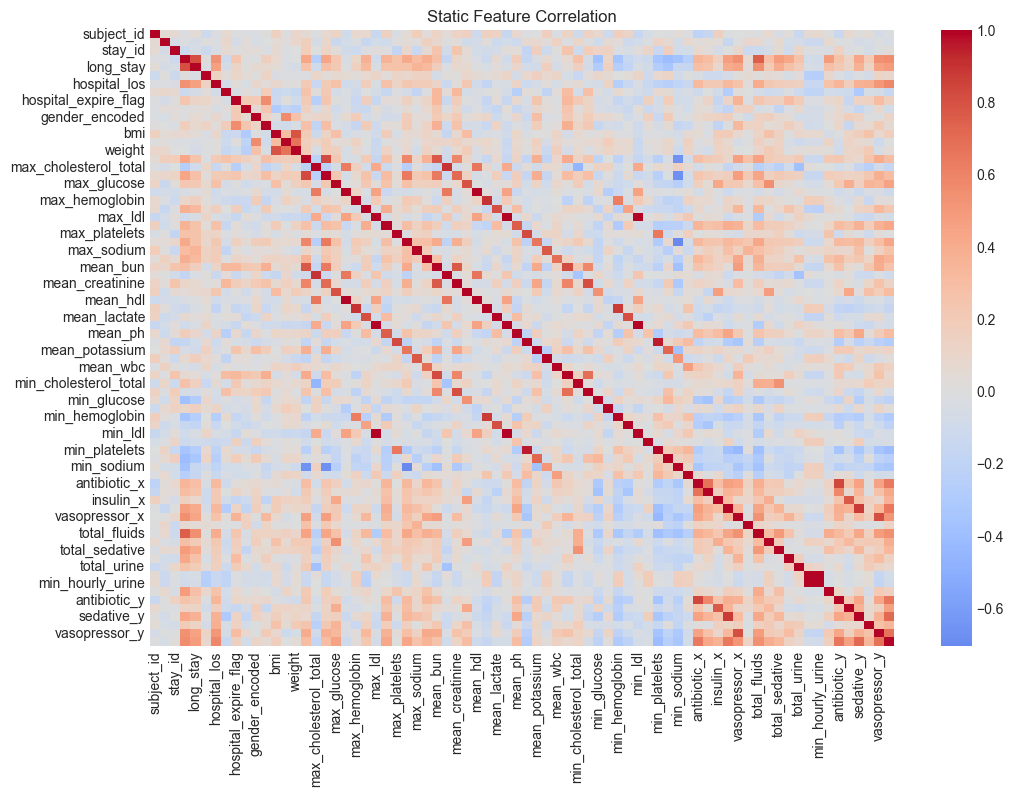

In [402]:
numeric_df = master_static.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(
    numeric_df.corr(),
    cmap='coolwarm',
    center=0
)
plt.title("Static Feature Correlation")
plt.show()



In [403]:
final_lstm_data.isna().sum().sum()


np.int64(0)

In [404]:
final_lstm_data.columns

Index(['stay_id', 'charttime', 'dbp', 'gcs', 'heart_rate', 'resp_rate', 'sbp',
       'spo2', 'temperature', 'subject_id', 'hadm_id', 'first_careunit',
       'last_careunit', 'los', 'long_stay', 'admission_type', 'is_emergency',
       'admission_location', 'discharge_location', 'insurance',
       'marital_status', 'race', 'hospital_los', 'ed_los',
       'hospital_expire_flag', 'age', 'age_group', 'gender_encoded', 'is_dead',
       'bmi', 'height', 'weight', 'max_bun', 'max_cholesterol_total',
       'max_creatinine', 'max_glucose', 'max_hdl', 'max_hemoglobin',
       'max_lactate', 'max_ldl', 'max_ph', 'max_platelets', 'max_potassium',
       'max_sodium', 'max_wbc', 'mean_bun', 'mean_cholesterol_total',
       'mean_creatinine', 'mean_glucose', 'mean_hdl', 'mean_hemoglobin',
       'mean_lactate', 'mean_ldl', 'mean_ph', 'mean_platelets',
       'mean_potassium', 'mean_sodium', 'mean_wbc', 'min_bun',
       'min_cholesterol_total', 'min_creatinine', 'min_glucose', 'min_hdl',
     

In [405]:
final_lstm_data.shape

# The final LSTM dataset contains 12,069 rows representing 
# hourly ICU time steps and 88 features per time step. Static patient features are repeated across time to provide context 
# for sequential modeling.”

(12069, 91)

In [406]:
final_lstm_data[['stay_id', 'charttime']].head()


stay_id           charttime
0  30057454 2171-11-14 10:00:00
1  30057454 2171-11-14 11:00:00
2  30057454 2171-11-14 12:00:00
3  30057454 2171-11-14 13:00:00
4  30057454 2171-11-14 14:00:00

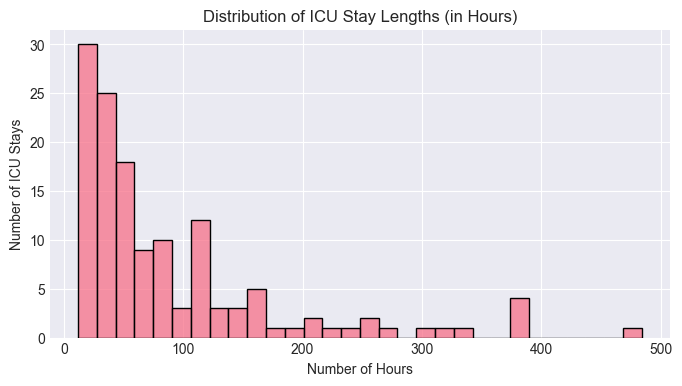

In [407]:
hours_per_stay = final_lstm_data.groupby('stay_id').size()

plt.figure(figsize=(8,4))
sns.histplot(hours_per_stay, bins=30)
plt.title("Distribution of ICU Stay Lengths (in Hours)")
plt.xlabel("Number of Hours")
plt.ylabel("Number of ICU Stays")
plt.show()


In [408]:
# Why do we need BOTH?
# Use case 1: Traditional ML

# Use master_static

# One row per ICU stay

# Simple features

# Easy to train


# Use case 2: LSTM / time-series model

# Use final_lstm_data

# Hourly vitals preserved

# Temporal patterns learned

# Static features added as context

In [409]:
# FINAL DATASETS
# 🔹 master_static

In [410]:
# FINAL DATASETS
# 🔹 master_static

In [379]:
# Create output directory if not exists
import os
os.makedirs("Data/Processed", exist_ok=True)

# Save static ICU-level data
master_static.to_csv(
    "Data/Processed/master_static.csv",
    index=False
)

# Save LSTM-ready hourly vitals
final_lstm_data.to_csv(
    "Data/Processed/final_lstm_data.csv",
    index=False
)

print("✅ Files saved successfully")


✅ Files saved successfully


In [380]:
final_lstm_data = pd.read_csv("Processed/final_lstm_data.csv")
final_lstm_data['charttime'] = pd.to_datetime(final_lstm_data['charttime'])


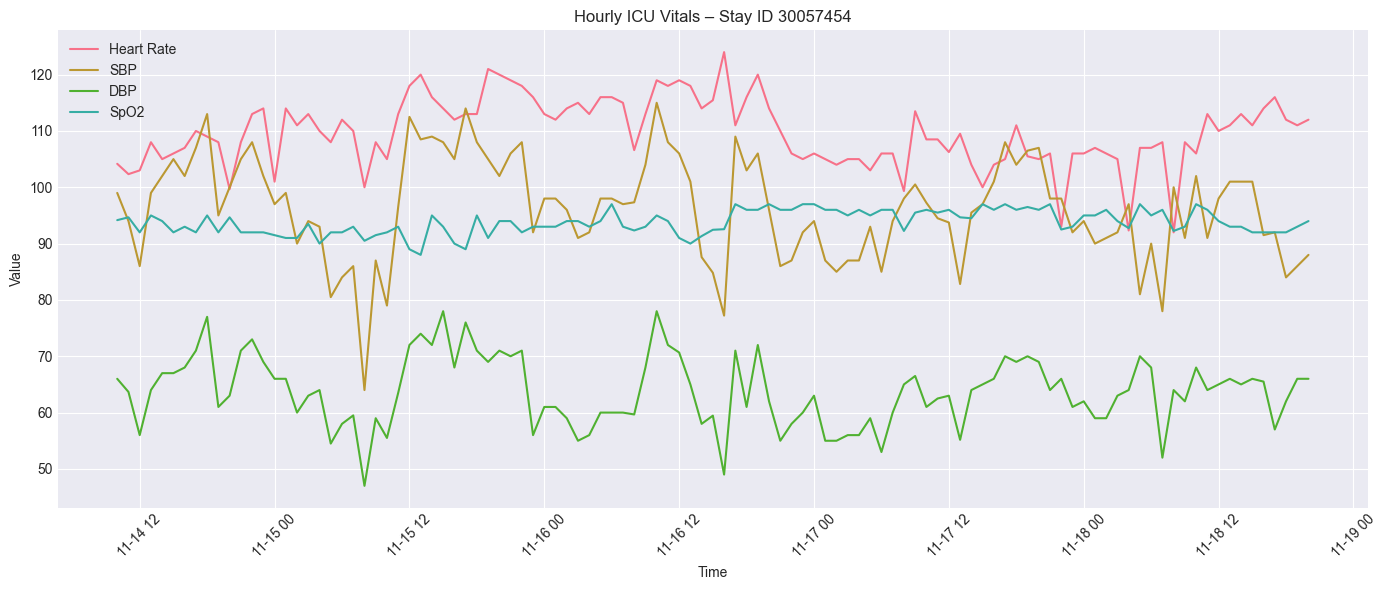

In [381]:
sample_stay = final_lstm_data['stay_id'].iloc[0]
ts = final_lstm_data[final_lstm_data['stay_id'] == sample_stay]

plt.figure(figsize=(14,6))

plt.plot(ts['charttime'], ts['heart_rate'], label='Heart Rate')
plt.plot(ts['charttime'], ts['sbp'], label='SBP')
plt.plot(ts['charttime'], ts['dbp'], label='DBP')
plt.plot(ts['charttime'], ts['spo2'], label='SpO2')

plt.title(f"Hourly ICU Vitals – Stay ID {sample_stay}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


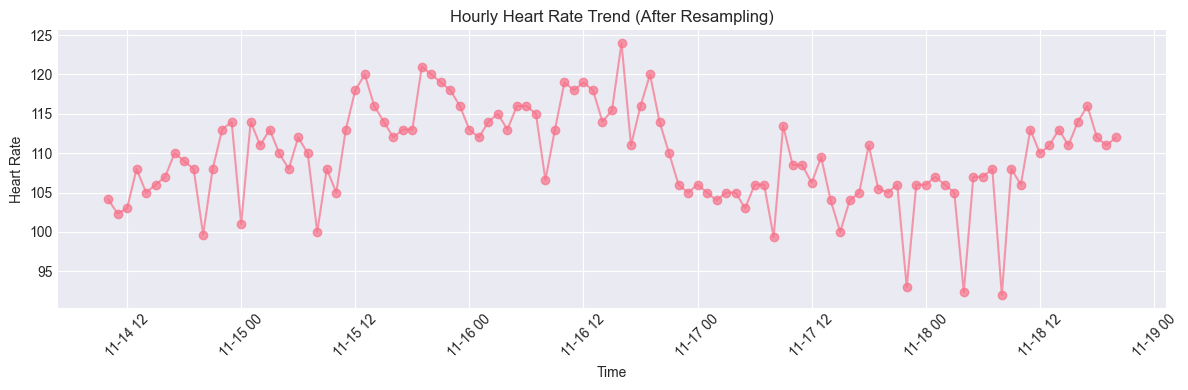

In [382]:
plt.figure(figsize=(12,4))

plt.plot(ts['charttime'], ts['heart_rate'], '-o', alpha=0.7)

plt.title("Hourly Heart Rate Trend (After Resampling)")
plt.xlabel("Time")
plt.ylabel("Heart Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


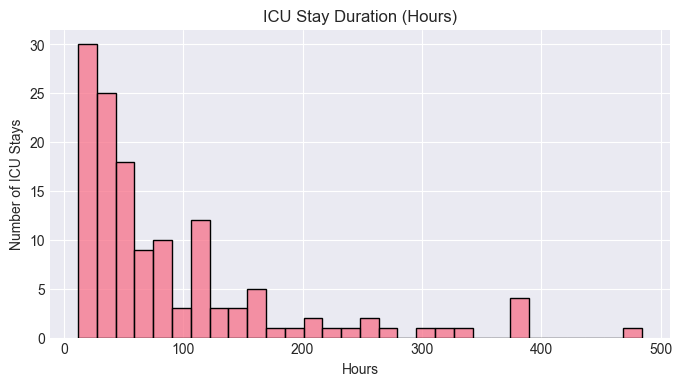

In [383]:
hours_per_stay = final_lstm_data.groupby('stay_id').size()

plt.figure(figsize=(8,4))
sns.histplot(hours_per_stay, bins=30)
plt.title("ICU Stay Duration (Hours)")
plt.xlabel("Hours")
plt.ylabel("Number of ICU Stays")
plt.show()


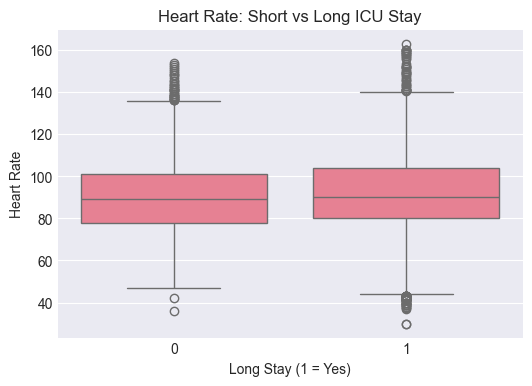

In [384]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=final_lstm_data,
    x='long_stay',
    y='heart_rate'
)
plt.title("Heart Rate: Short vs Long ICU Stay")
plt.xlabel("Long Stay (1 = Yes)")
plt.ylabel("Heart Rate")
plt.show()


In [385]:
from scipy.stats import mannwhitneyu

short_hr = final_lstm_data[final_lstm_data['long_stay'] == 0]['heart_rate']
long_hr = final_lstm_data[final_lstm_data['long_stay'] == 1]['heart_rate']

stat, p = mannwhitneyu(short_hr, long_hr)
print(f"P-value: {p:.4f}")


P-value: 0.0000


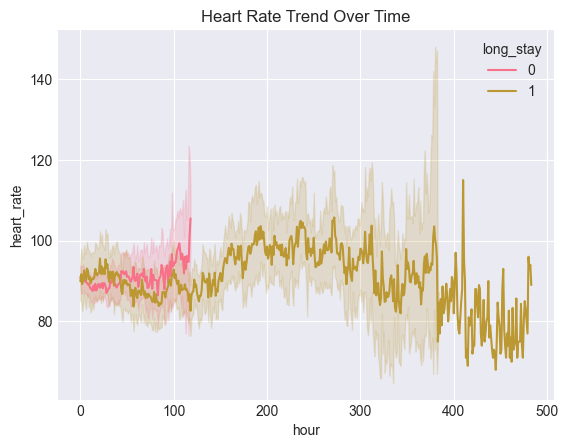

In [386]:
final_lstm_data['hour'] = final_lstm_data.groupby('stay_id').cumcount()

sns.lineplot(
    data=final_lstm_data,
    x='hour',
    y='heart_rate',
    hue='long_stay'
)
plt.title("Heart Rate Trend Over Time")
plt.show()


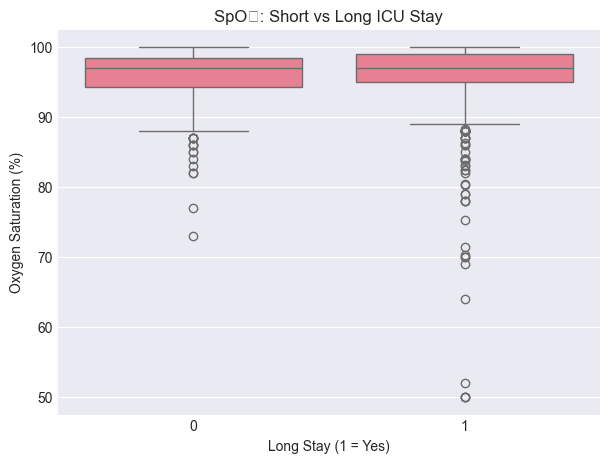

In [387]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=final_lstm_data,
    x='long_stay',
    y='spo2'
)
plt.title("SpO₂: Short vs Long ICU Stay")
plt.xlabel("Long Stay (1 = Yes)")
plt.ylabel("Oxygen Saturation (%)")
plt.show()


In [388]:
# Sort correctly
final_lstm_data = final_lstm_data.sort_values(['stay_id', 'charttime'])

# Create hour index since ICU admission
final_lstm_data['hour_since_icu'] = (
    final_lstm_data
    .groupby('stay_id')
    .cumcount()
)


In [389]:
def plot_time_series_compare(df, feature, ylabel, title, max_hours=72):
    temp = df[df['hour_since_icu'] <= max_hours]

    summary = (
        temp
        .groupby(['hour_since_icu', 'long_stay'])[feature]
        .mean()
        .reset_index()
    )

    plt.figure(figsize=(10,5))

    sns.lineplot(
        data=summary,
        x='hour_since_icu',
        y=feature,
        hue='long_stay',
        palette={0: 'green', 1: 'red'}
    )

    plt.xlabel("Hours Since ICU Admission")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Long ICU Stay", labels=["Short Stay", "Long Stay"])
    plt.grid(alpha=0.3)
    plt.show()


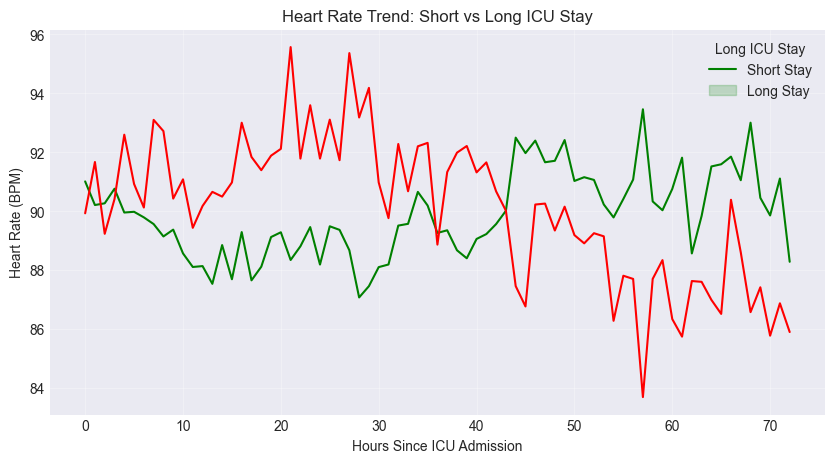

In [390]:
plot_time_series_compare(
    final_lstm_data,
    feature='heart_rate',
    ylabel='Heart Rate (BPM)',
    title='Heart Rate Trend: Short vs Long ICU Stay'
)


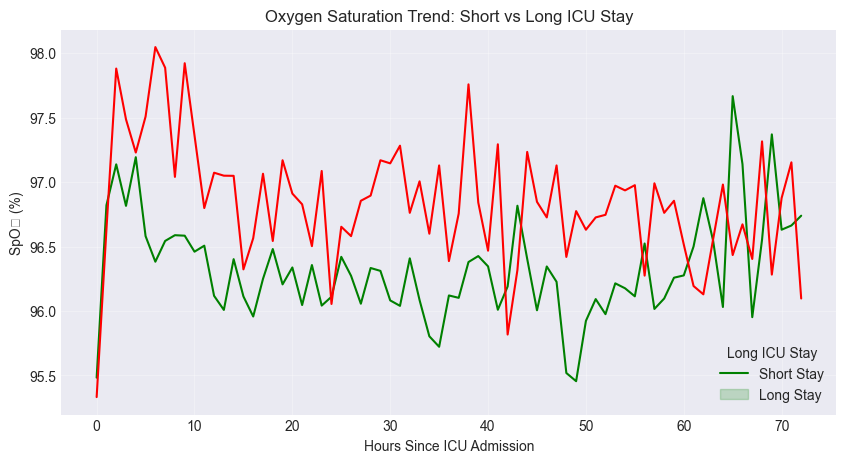

In [391]:
plot_time_series_compare(
    final_lstm_data,
    feature='spo2',
    ylabel='SpO₂ (%)',
    title='Oxygen Saturation Trend: Short vs Long ICU Stay'
)


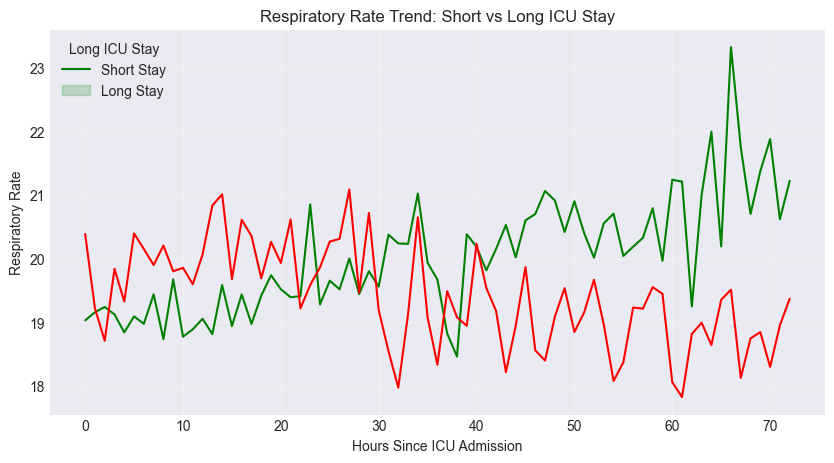

In [392]:
plot_time_series_compare(
    final_lstm_data,
    feature='resp_rate',
    ylabel='Respiratory Rate',
    title='Respiratory Rate Trend: Short vs Long ICU Stay'
)


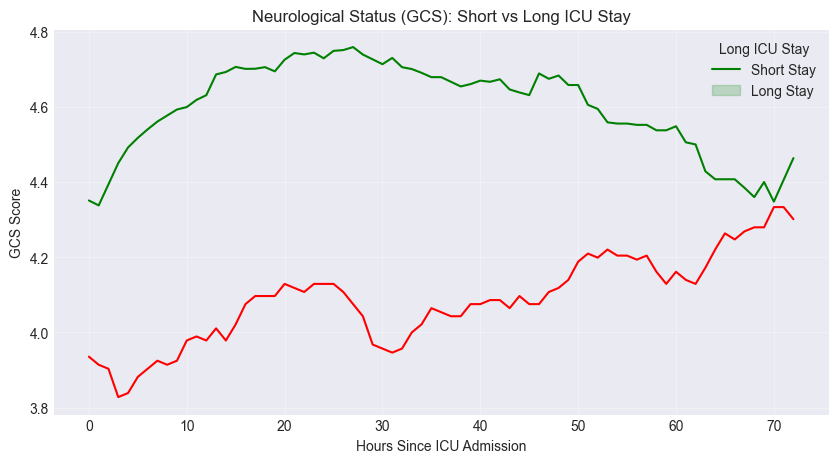

In [393]:
plot_time_series_compare(
    final_lstm_data,
    feature='gcs',
    ylabel='GCS Score',
    title='Neurological Status (GCS): Short vs Long ICU Stay'
)


In [394]:
final_lstm_data.columns

Index(['stay_id', 'charttime', 'dbp', 'gcs', 'heart_rate', 'resp_rate', 'sbp',
       'spo2', 'temperature', 'subject_id_x', 'hadm_id', 'first_careunit',
       'last_careunit', 'los', 'long_stay', 'subject_id_y', 'admission_type_x',
       'is_emergency_x', 'admission_location_x', 'discharge_location_x',
       'insurance_x', 'marital_status_x', 'race_x', 'hospital_los_x',
       'ed_los_x', 'hospital_expire_flag_x', 'subject_id', 'admission_type_y',
       'is_emergency_y', 'admission_location_y', 'discharge_location_y',
       'insurance_y', 'marital_status_y', 'race_y', 'hospital_los_y',
       'ed_los_y', 'hospital_expire_flag_y', 'age', 'age_group',
       'gender_encoded', 'is_dead', 'bmi', 'height', 'weight', 'max_bun',
       'max_creatinine', 'max_glucose', 'max_hemoglobin', 'max_platelets',
       'max_potassium', 'max_sodium', 'max_wbc', 'mean_bun', 'mean_creatinine',
       'mean_glucose', 'mean_hemoglobin', 'mean_platelets', 'mean_potassium',
       'mean_sodium', 'mean_w